In [1]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import scienceplots
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from tabulate import tabulate
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearnex import patch_sklearn
patch_sklearn()
plt.rcParams['figure.dpi'] = 400

plt.style.use('science')

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=42)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(8, 4))

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 1.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.set_ylabel('Importance')
        ax.legend()

        plt.tight_layout()
        plt.show()
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
        mean_rmse[model_name] = -np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values(),color = colors)
        plt.xlabel('Root Mean Squared Error')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:



# Assuming 'df' is your DataFrame and 'category_feature' is the categorical column you want to encode
data = pd.read_csv("insurance.csv")  # Load your dataset

# Mapping 'smoker' and 'sex' columns to numeric values
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'female': 1, 'male': 0})

# Separating features and target variable
features = data.drop('charges', axis=1)
targets = data['charges']
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=123)

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])
categorical_cols = ["region"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["age","sex","bmi","children","smoker",]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
linear_regression_model = make_pipeline(
    preprocessor,
    LinearRegression()
)
linear_regression_model.fit(x_train,y_train)
pred = linear_regression_model.predict(x_test)
print(r2_score(y_test,pred))
print('MSE lr:', metrics.mean_squared_error(y_test, pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error'))])
categorical_cols = ["region"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["age","sex","bmi","children","smoker",]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
random_forest_model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)
random_forest_model.fit(x_train,y_train)
pred = random_forest_model.predict(x_test)
print(r2_score(y_test,pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
xgb_model = make_pipeline(
    preprocessor,
    xgb.XGBRegressor()
)
xgb_model.fit(x_train,y_train)
pred = xgb_model.predict(x_test)
print(r2_score(y_test,pred))
print('RMSE xgb:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


dnn_model = make_pipeline(
    preprocessor,
    MLPRegressor(max_iter=5000,hidden_layer_sizes=200)
)
dnn_model.fit(x_train,y_train)
pred = dnn_model.predict(x_test)
print(r2_score(y_test,pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

svm_model = make_pipeline(
    preprocessor,
    SVR()
)
svm_model.fit(x_train,y_train)
pred = svm_model.predict(x_test)
print(r2_score(y_test,pred))
print('RMSE svm:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


0.8001744488359046
MSE lr: 30552437.416525483
RMSE rf: 5527.42593044226
0.8813873136456802
RMSE rf: 4258.562179693538
0.8556390114432169
RMSE xgb: 4698.100961880357
0.8743763388751913
RMSE dnn: 4382.613224690057
-0.11461524667225409
RMSE svm: 13054.49004893723


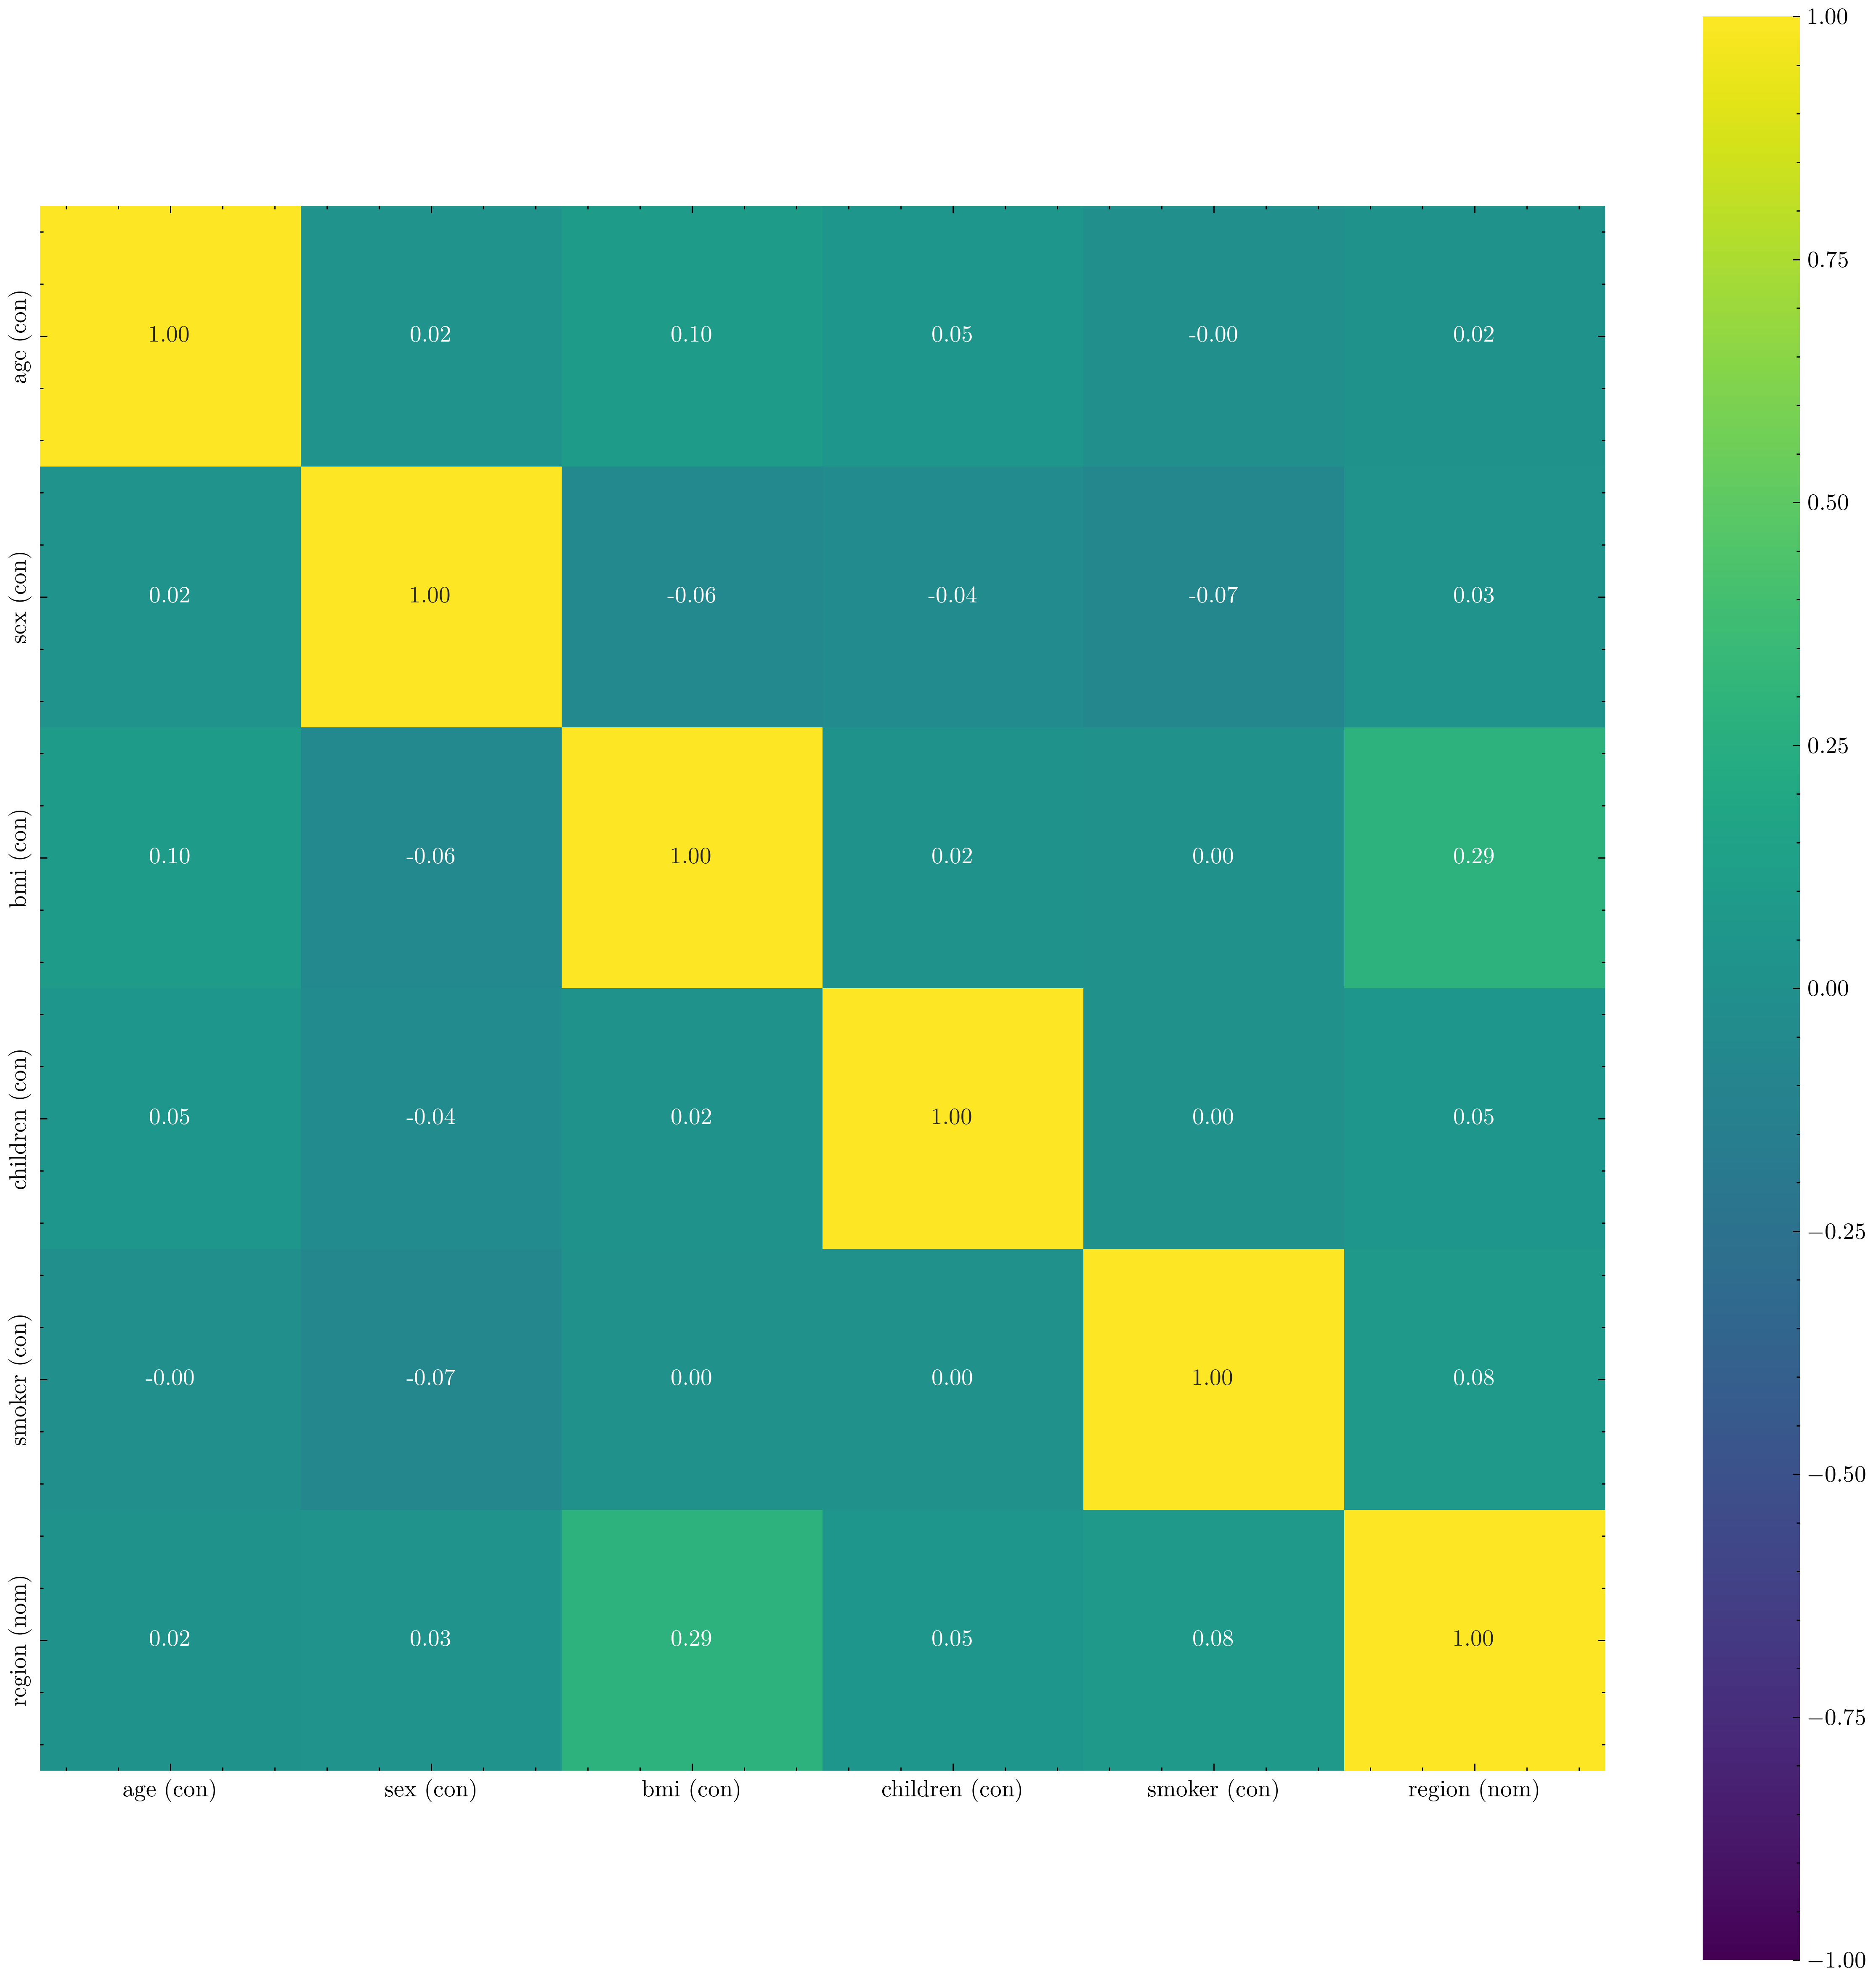

In [3]:
from dython.nominal import associations  # correlation calculation

correlation_matrix = associations(
    x_train, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True,cmap="viridis")

In [4]:
dnn_model = make_pipeline(
    preprocessor,
    MLPRegressor(max_iter=5000,hidden_layer_sizes=500)
)
dnn_model.fit(x_train,y_train)
pred = dnn_model.predict(x_test)
print(r2_score(y_test,pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.9018134928746474
RMSE dnn: 3874.568355865671


In [5]:

svm_model = make_pipeline(
    preprocessor,
    SVR(kernel='linear', C=290)
)

svm_model.fit(x_train, y_train)
transformed_data = svm_model[:-1].transform(x_train)
display(transformed_data[0])
pred = svm_model.predict(x_test)
print(r2_score(y_test, pred))
print('MSE svm:', metrics.mean_squared_error(y_test, pred))
print('RMSE svm:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

array([ 0.06207177, -0.98884723, -0.71961   , -0.06736631, -0.5       ,
        0.        ,  1.        ,  0.        ,  0.        ])

0.7786819047087734
MSE svm: 33838551.75746306
RMSE svm: 5817.091348557547


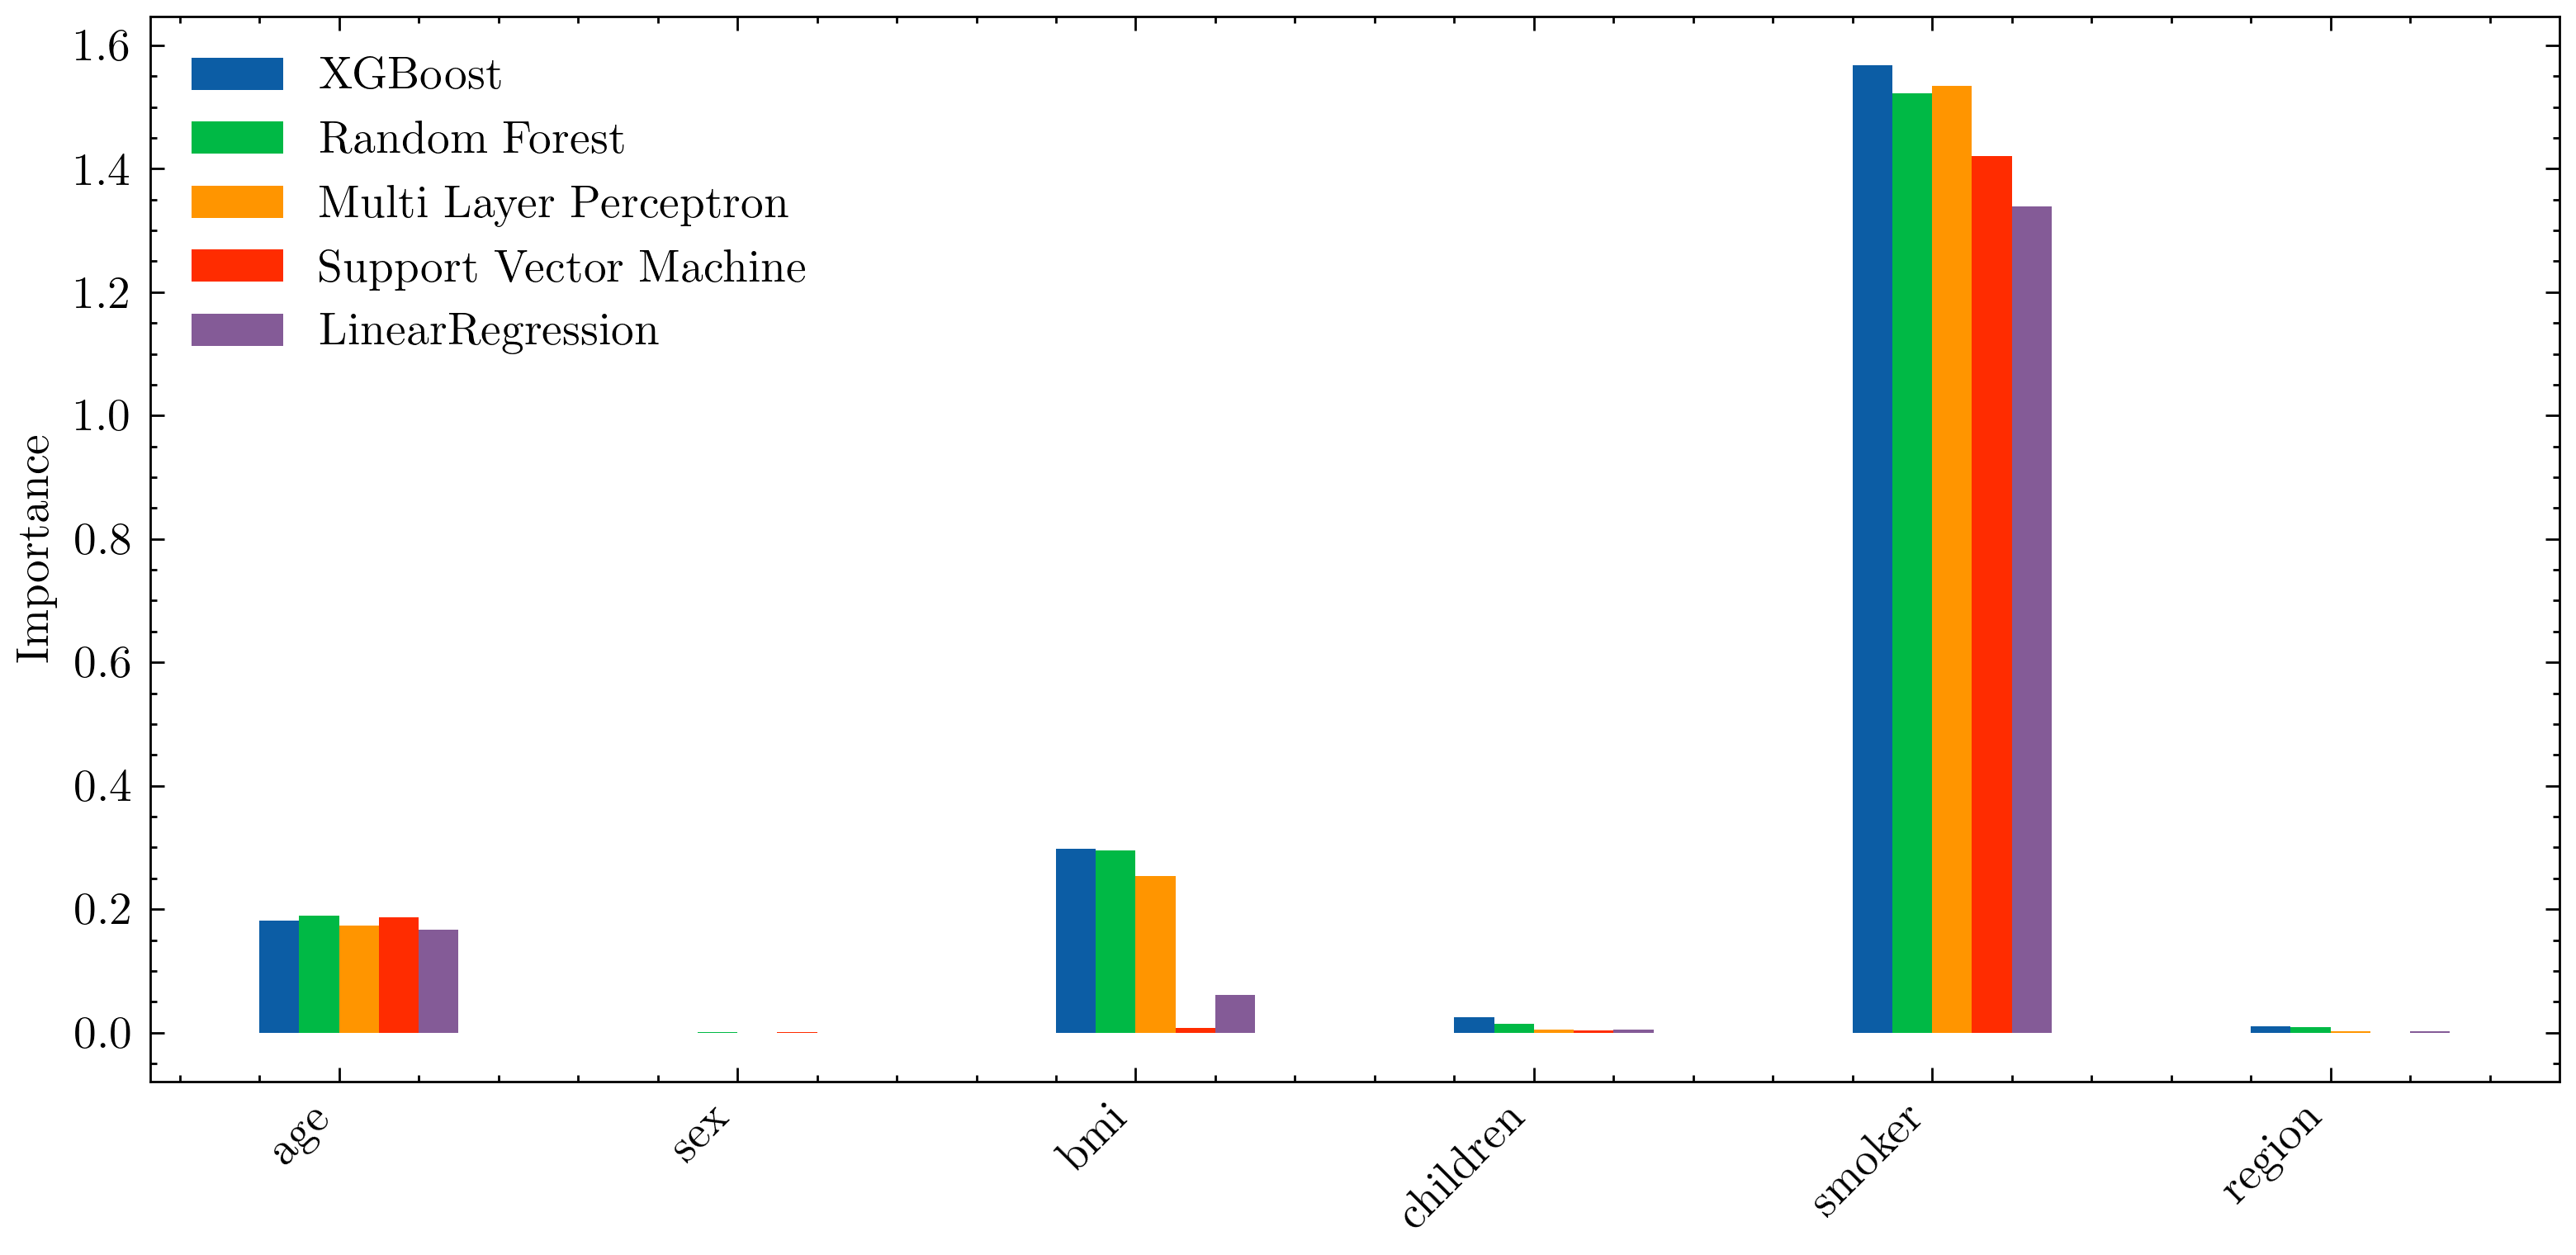

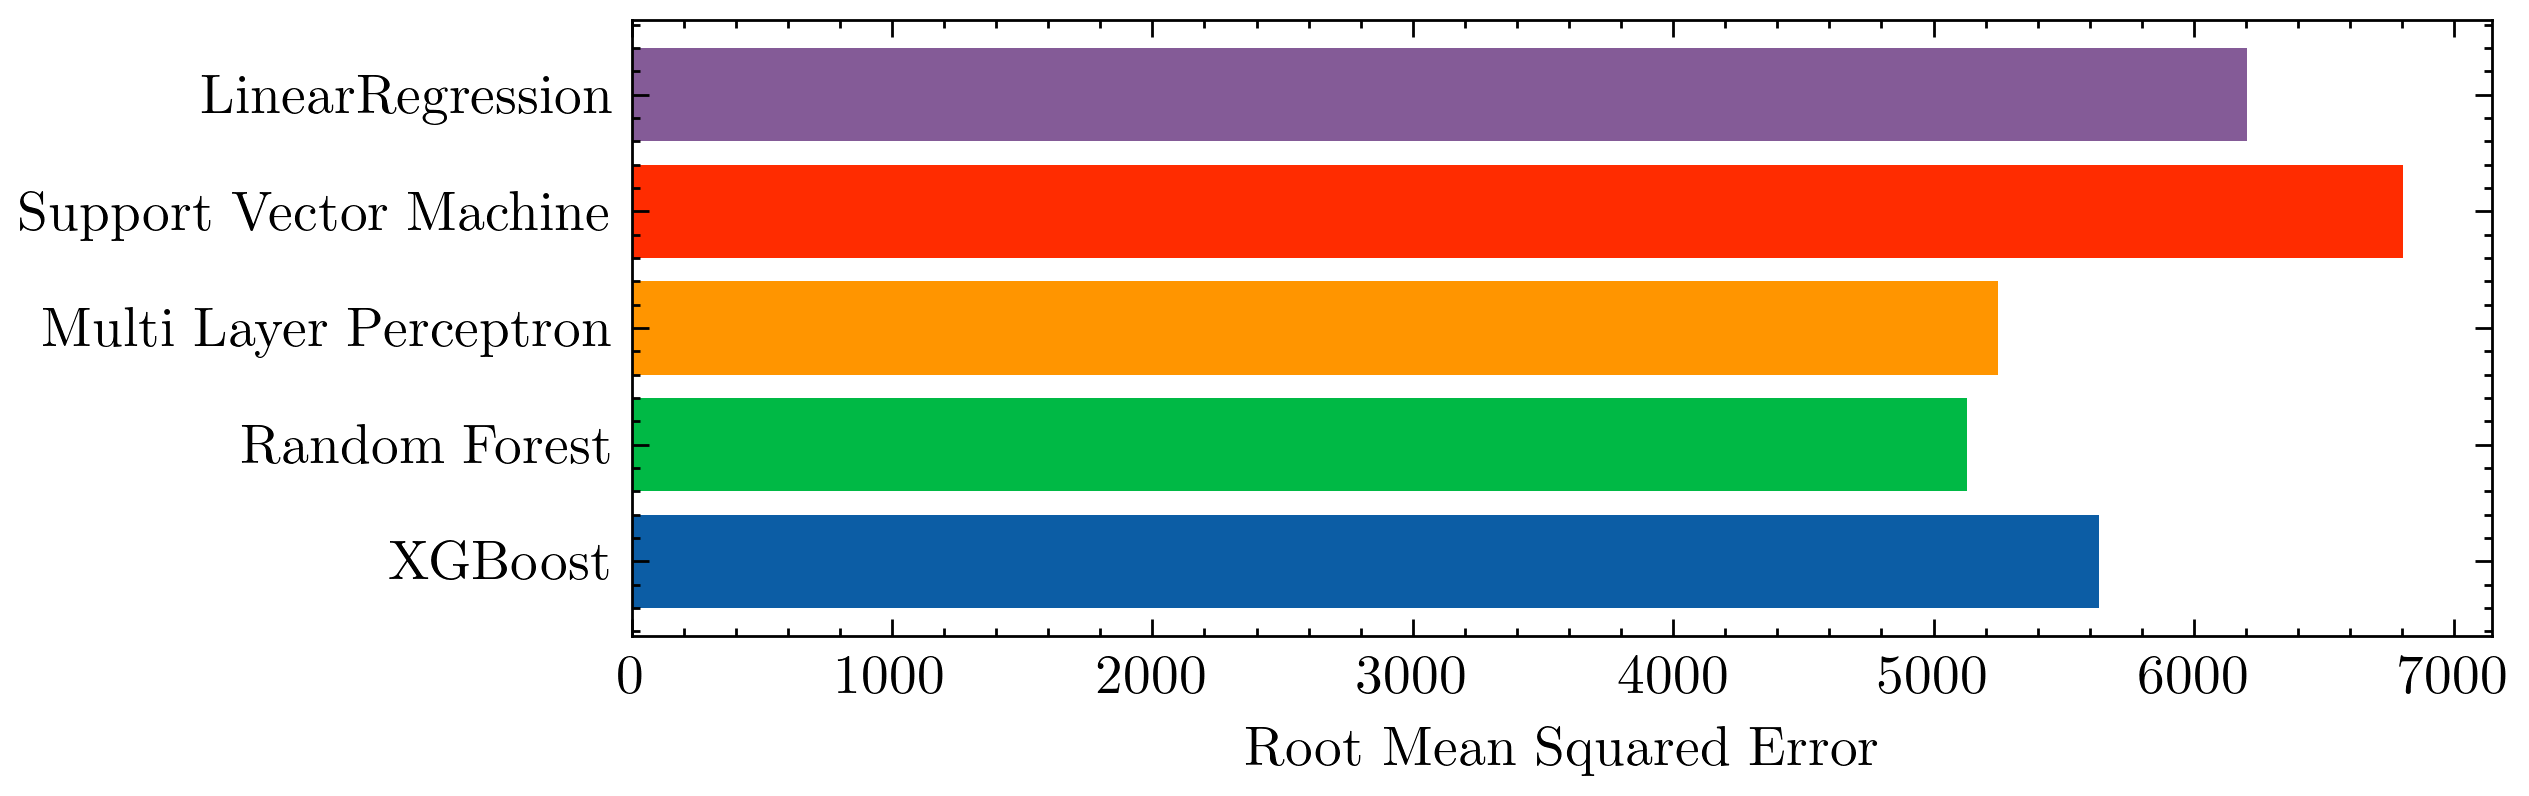

In [6]:
# Example usage with custom colors
models = {
    'XGBoost': xgb_model,
    'Random Forest': random_forest_model,
    'Multi Layer Perceptron': dnn_model,
    'Support Vector Machine': svm_model,
    "LinearRegression": linear_regression_model,
}

importances = random_forest_model.named_steps['randomforestregressor'].feature_importances_

# Specify custom colors for each model
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Extract 10 distinct colors from the color cycle
num_colors = 10
custom_colors = color_cycle[:num_colors]
plot_feature_importance_comparison(
    models, x_test, y_test, colors=custom_colors)
plot_feature_mean_squared_error(models, x_train, y_train, custom_colors)

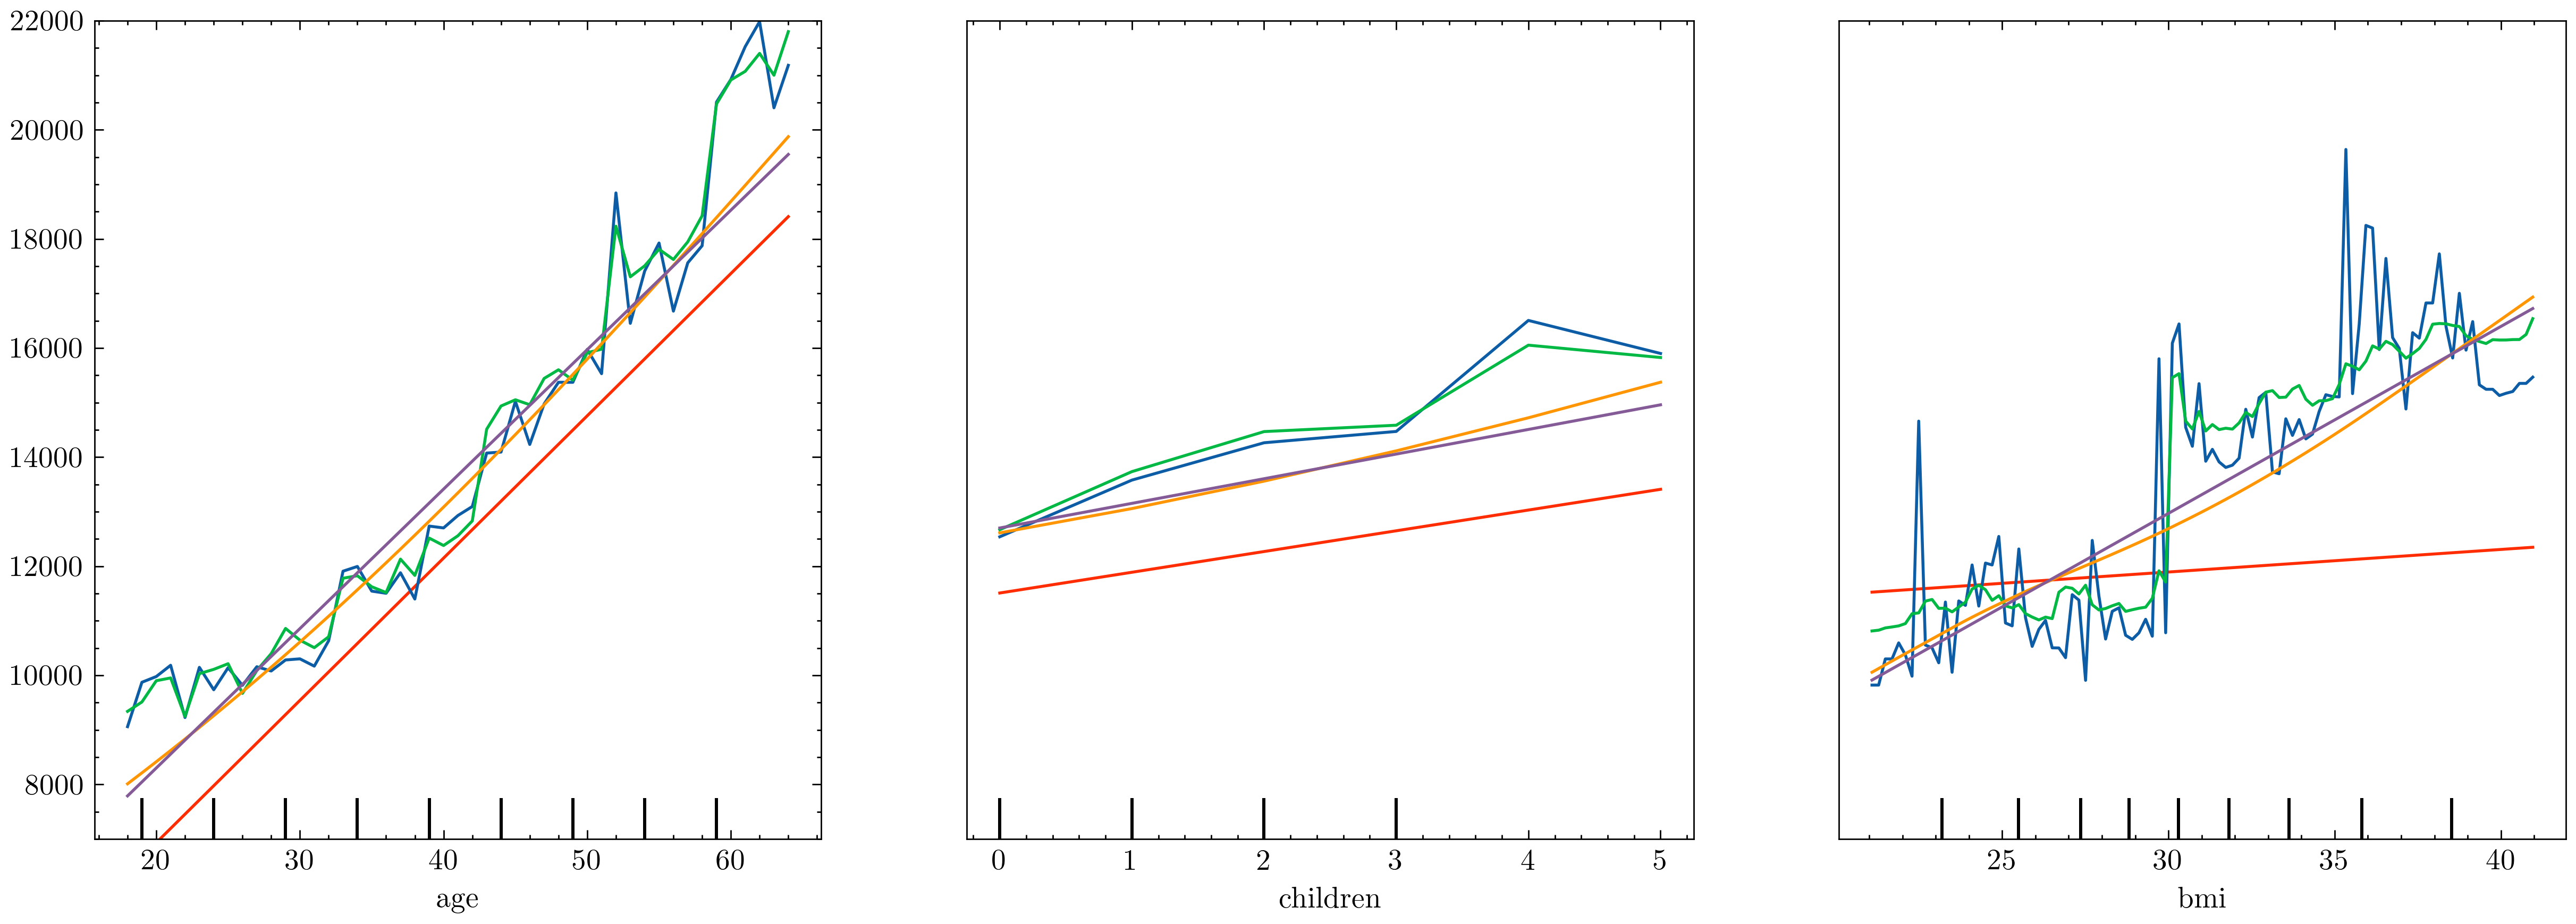

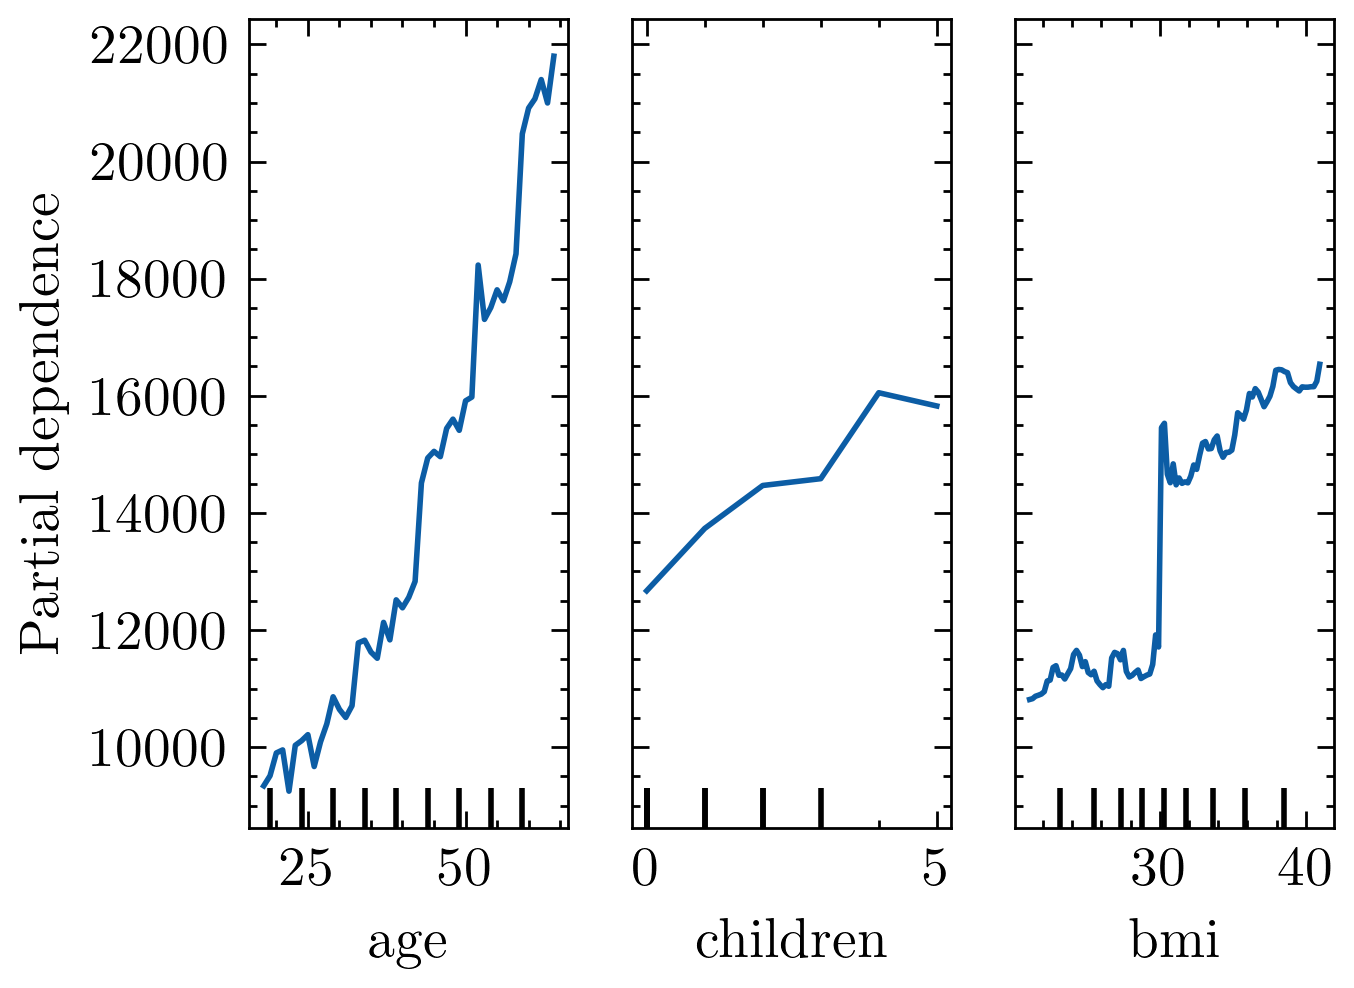

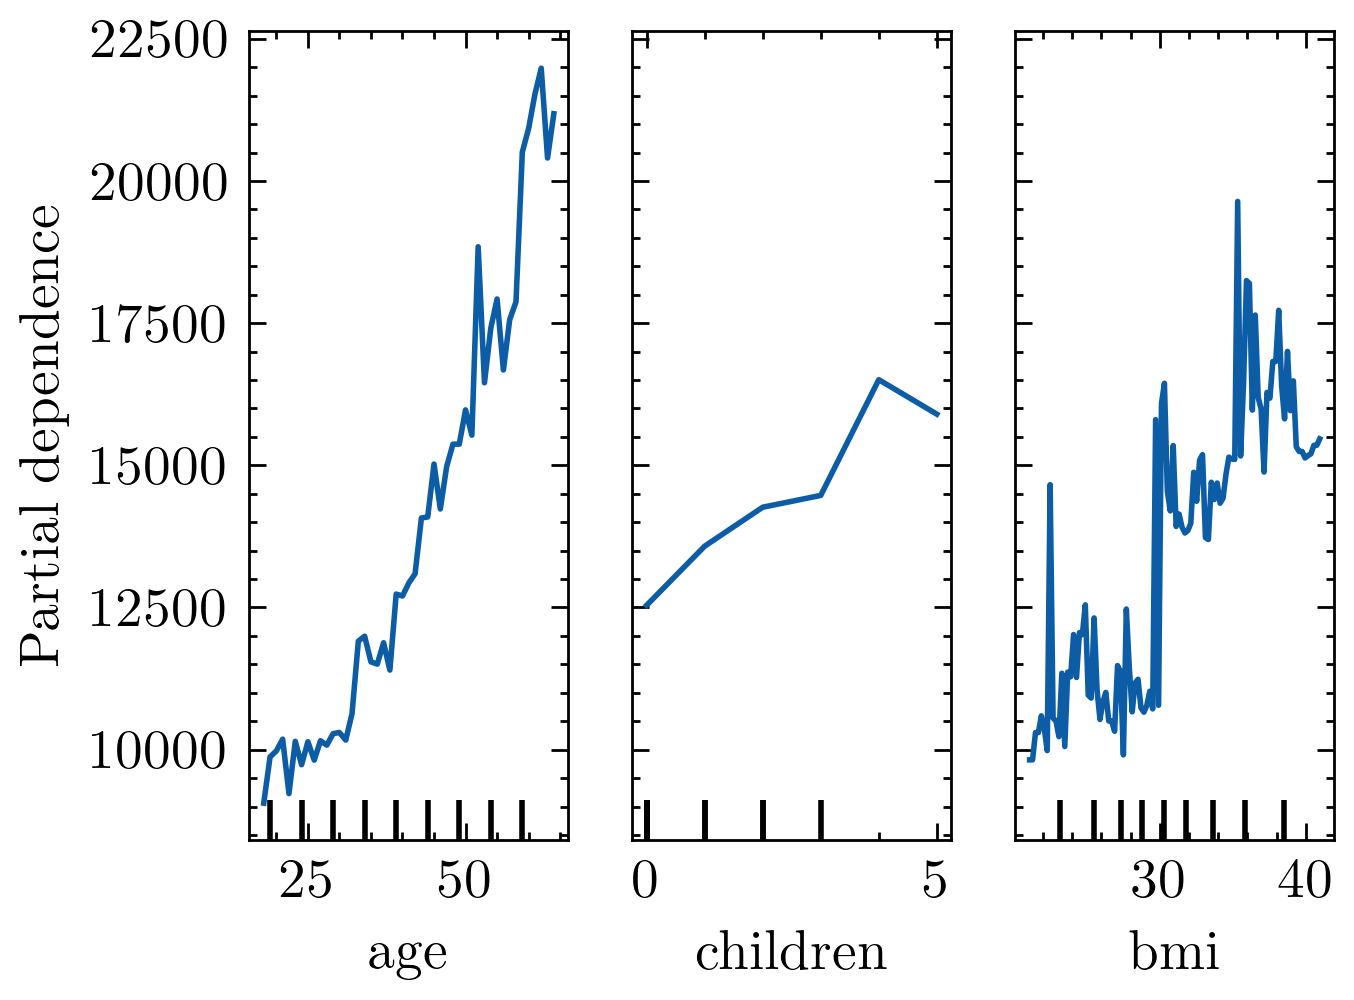

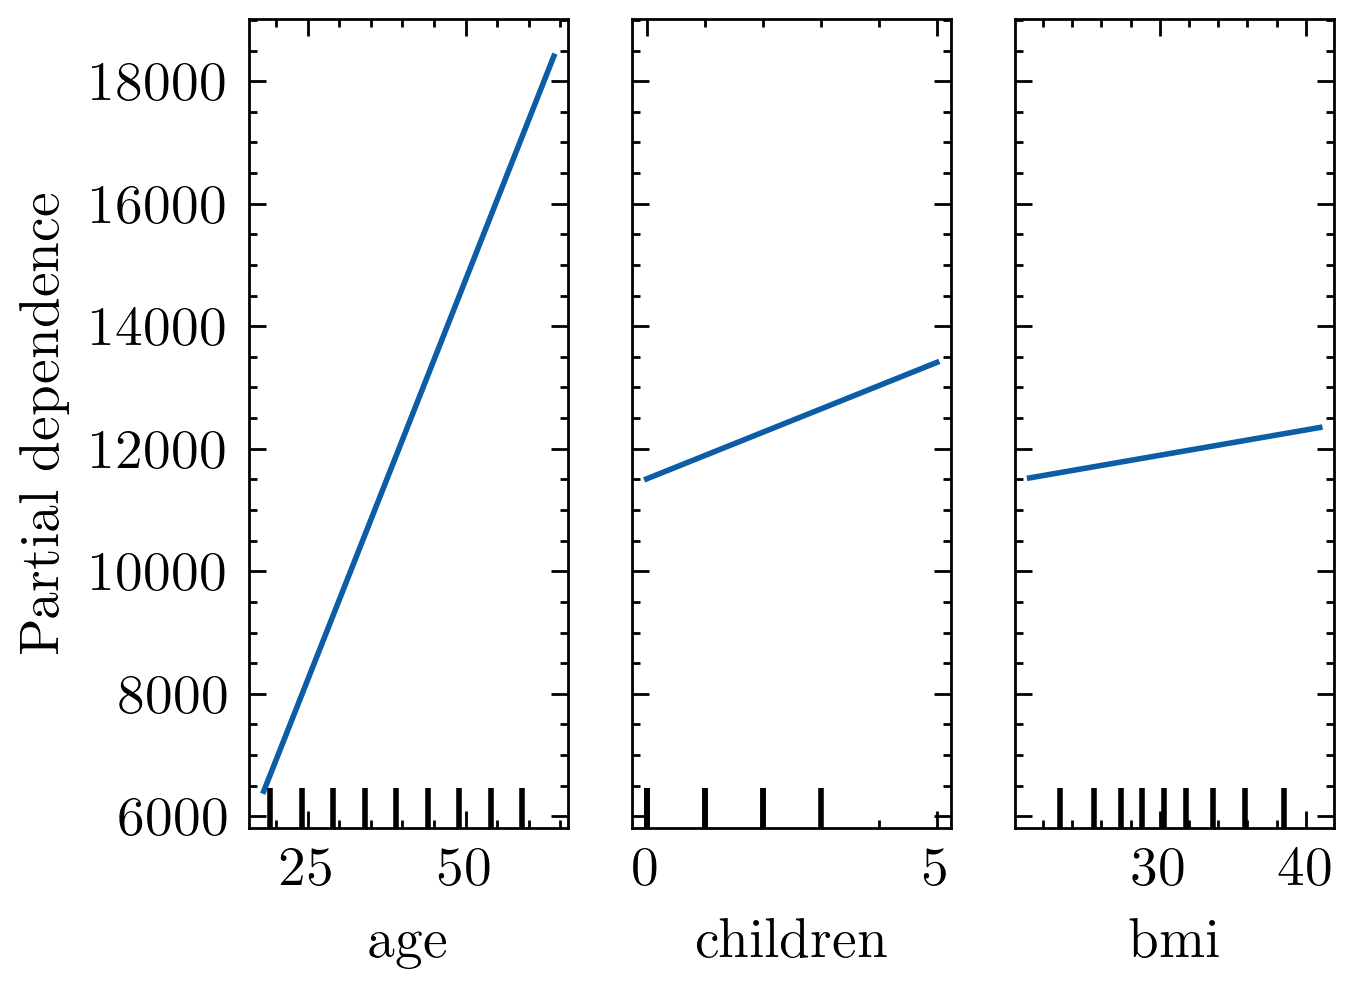

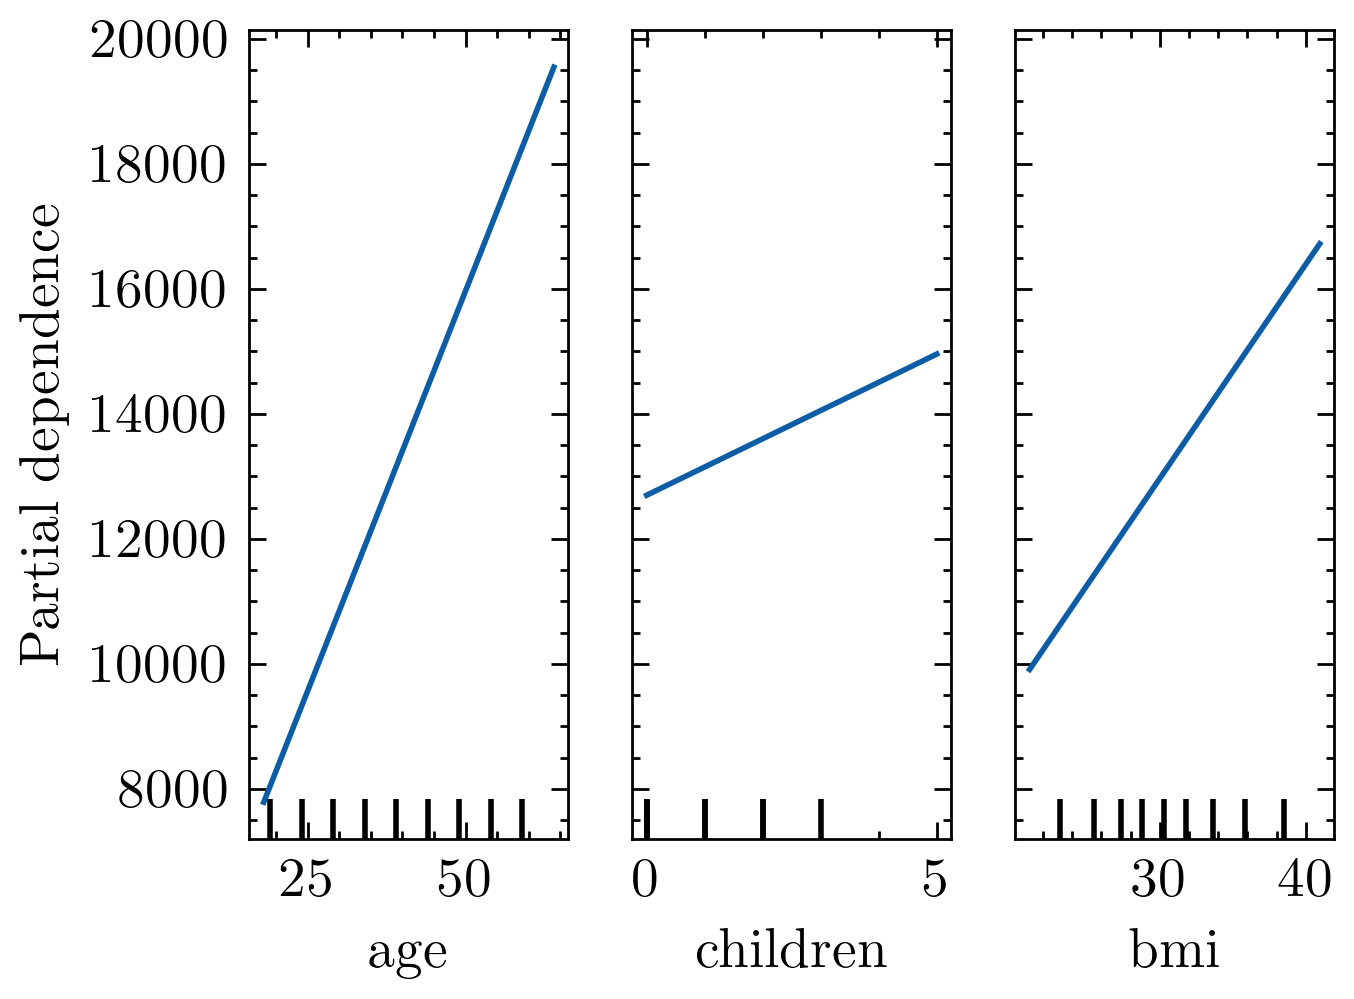

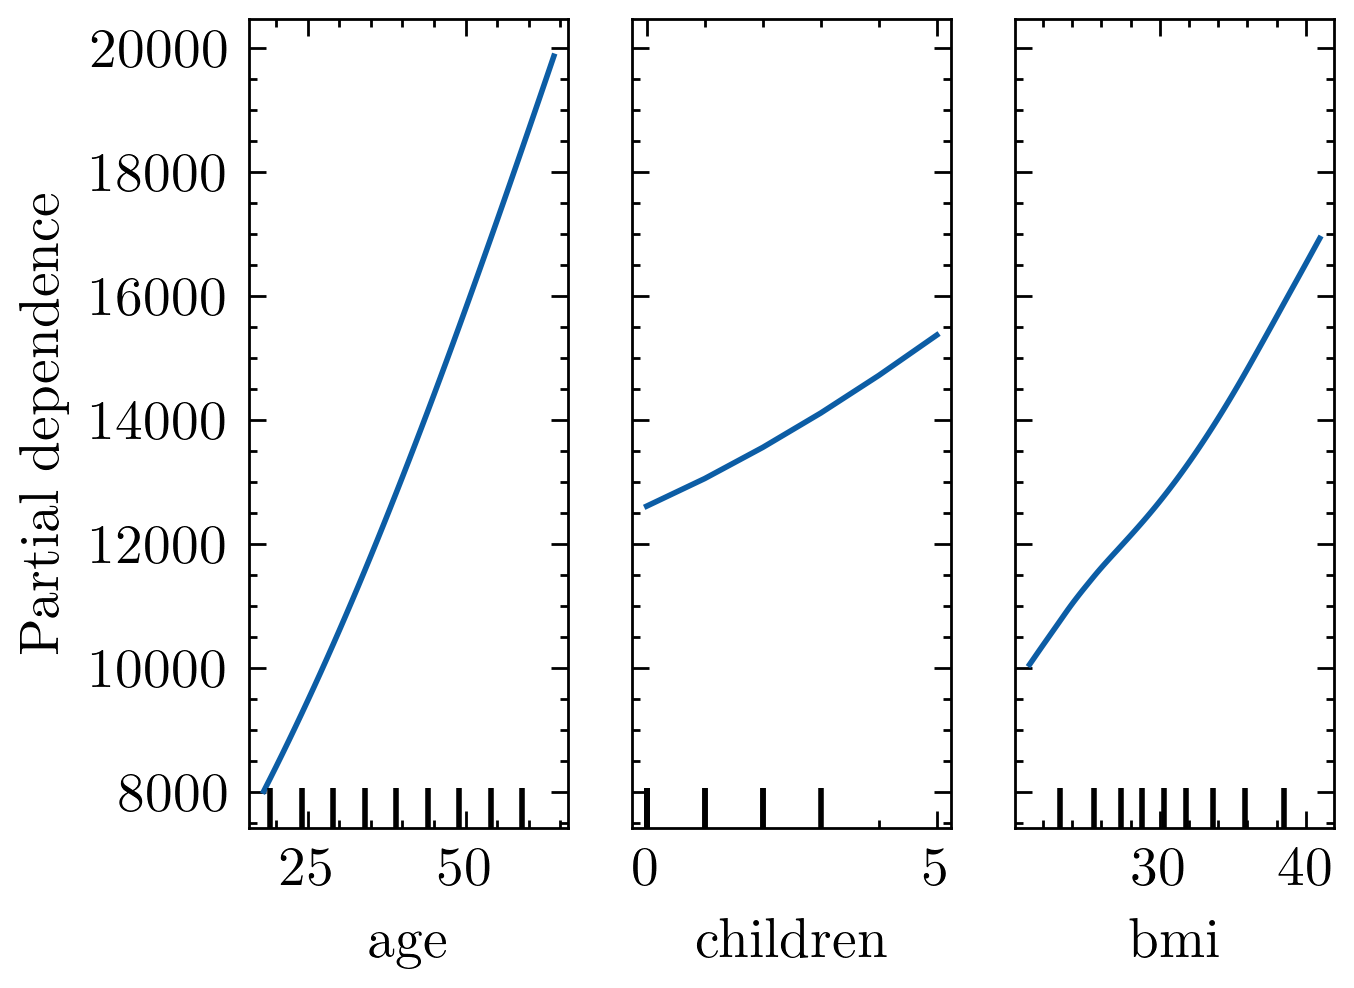

In [ ]:
from sklearn.inspection import PartialDependenceDisplay


def plot():
    with plt.style.context('science'):

        fig, ((ax1, ax2, ax3)) = plt.subplots(
            1, 3, figsize=(15, 5))  # (rows, columns, index)
        rf_disp = PartialDependenceDisplay.from_estimator(random_forest_model, x_train, features=[
                                                          "age", "children", "bmi"], feature_names=features.columns)

        xgb_disp = PartialDependenceDisplay.from_estimator(xgb_model, x_train, features=[
                                                           "age", "children", "bmi"], feature_names=features.columns)
        svm_disp = PartialDependenceDisplay.from_estimator(svm_model, x_train, features=[
                                                           "age", "children", "bmi"], feature_names=features.columns)
        lr_disp = PartialDependenceDisplay.from_estimator(linear_regression_model, x_train, features=[
                                                          "age", "children", "bmi"], feature_names=features.columns)
        mlrp_disp = PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[
                                                            "age", "children", "bmi"], feature_names=features.columns)
        svm_disp.plot(ax=[ax1, ax2, ax3], line_kw={
                      "label": "NN", "color": custom_colors[3]})
        xgb_disp.plot(ax=[ax1, ax2, ax3], line_kw={
                      "label": "xgboost", "color": custom_colors[0]})
        rf_disp.plot(ax=[ax1, ax2, ax3], line_kw={
                     "label": "random forest", "color": custom_colors[1]})
        mlrp_disp.plot(ax=[ax1, ax2, ax3], line_kw={
                       "label": "NN", "color": custom_colors[2]})
        lr_disp.plot(ax=[ax1, ax2, ax3], line_kw={
                     "label": "NN", "color": custom_colors[4]})
        ax1.get_legend().remove()
        ax2.get_legend().remove()
        ax3.get_legend().remove()
        for ax in [ax1, ax2, ax3]:
            ax.set_ylim(7000, 22000)
            ax.set_ylabel('')
        for ax in [ax2, ax3]:
            ax.set_yticks([])

        def legend_without_duplicate_labels(ax):
            handles, labels = ax.get_legend_handles_labels()
            unique = [(h, l) for i, (h, l) in enumerate(
                zip(handles, labels)) if l not in labels[:i]]
            return unique

        lines_labels = legend_without_duplicate_labels(ax1)
        lines, labels = zip(*lines_labels)
        lines = list(lines)
        labels = list(labels)

        # fig.legend(lines, labels, fontsize='small')

        plt.show()


plot()

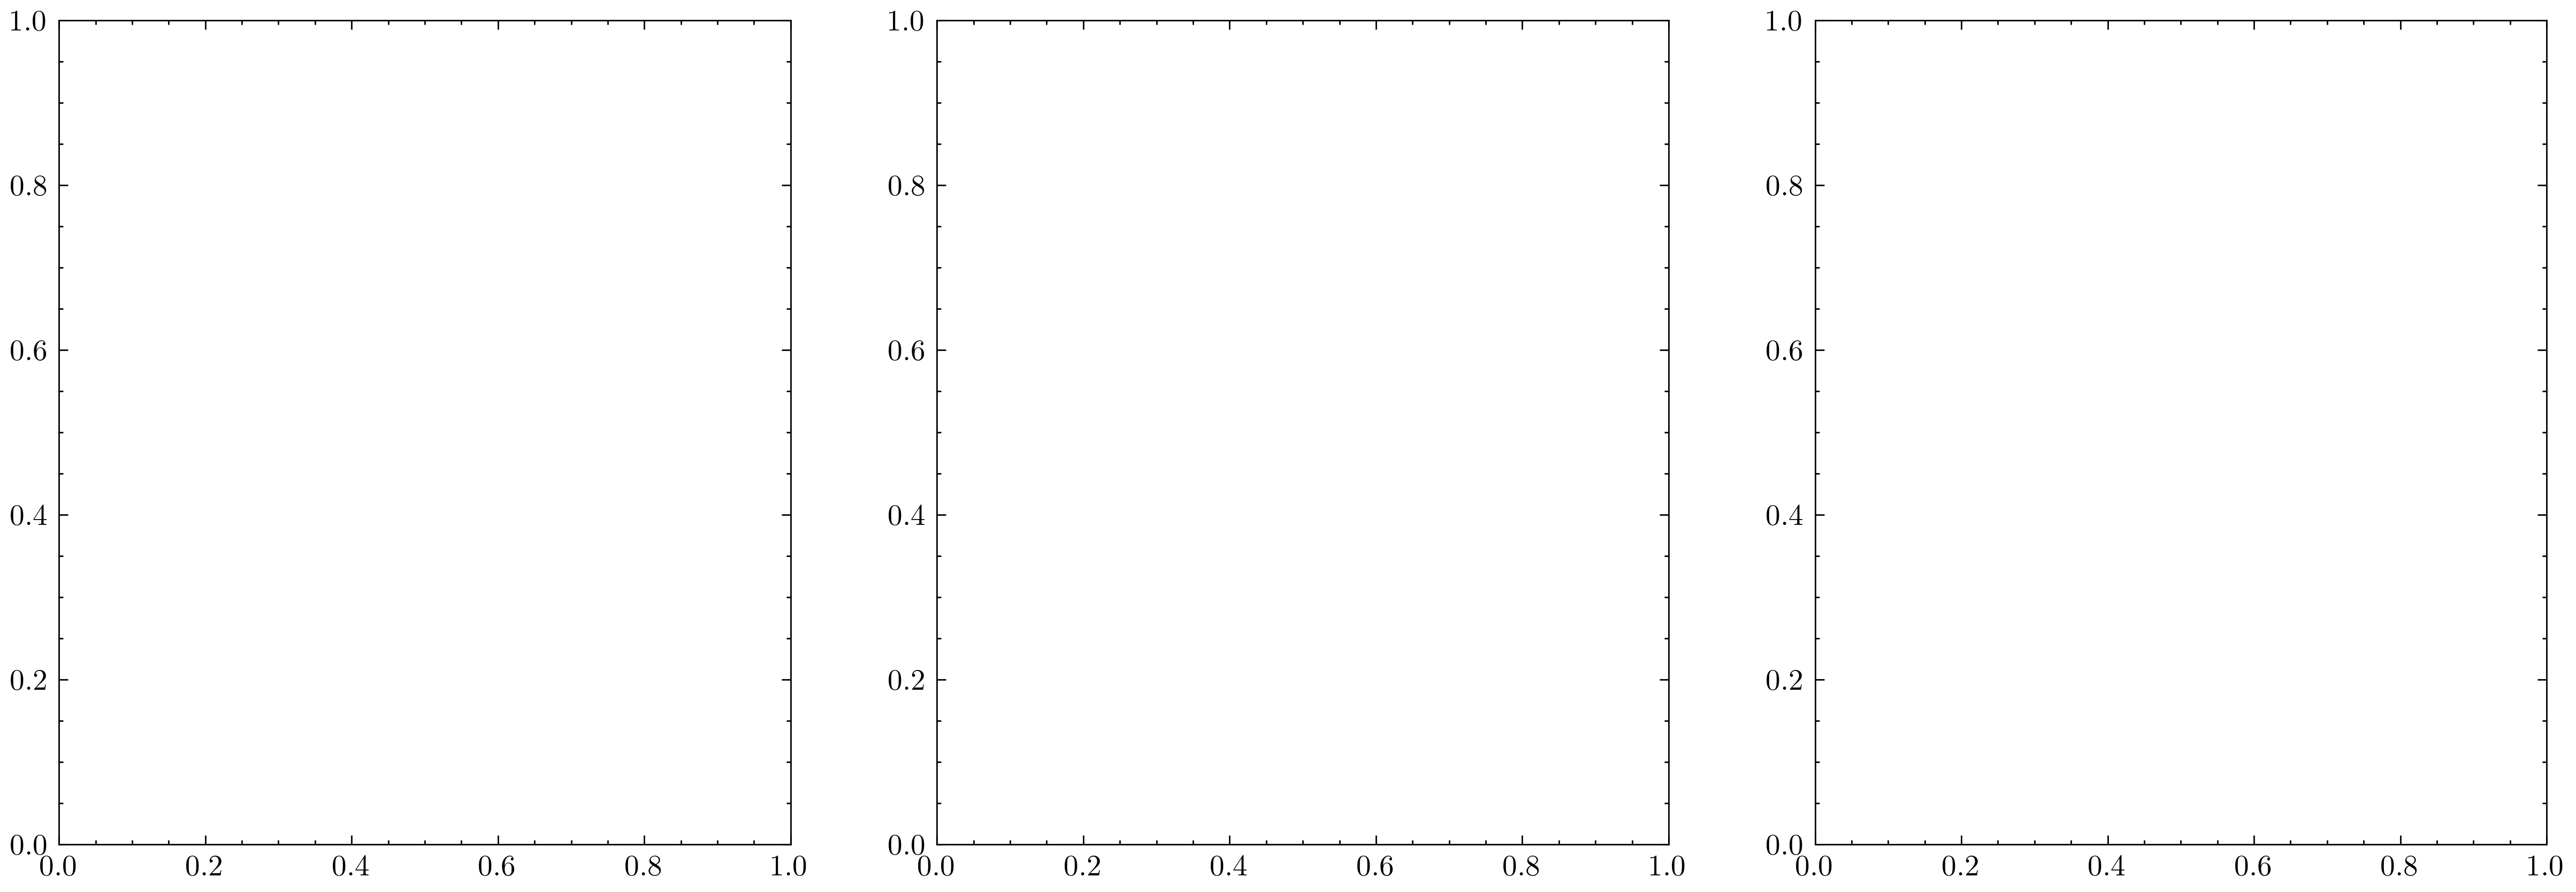

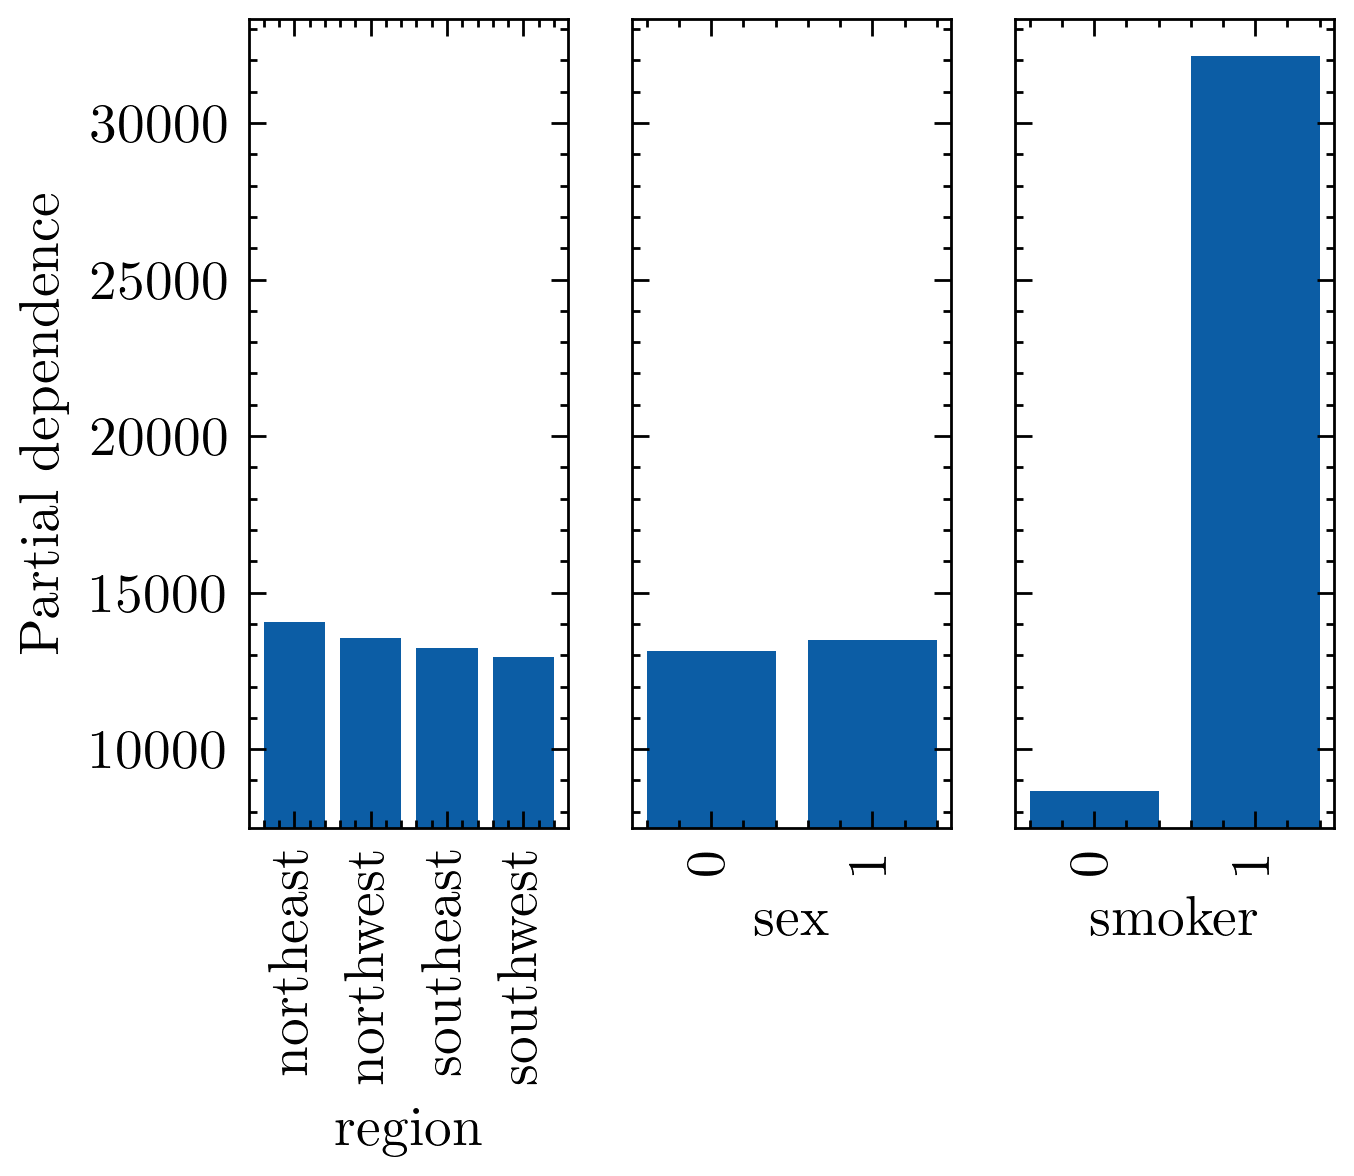

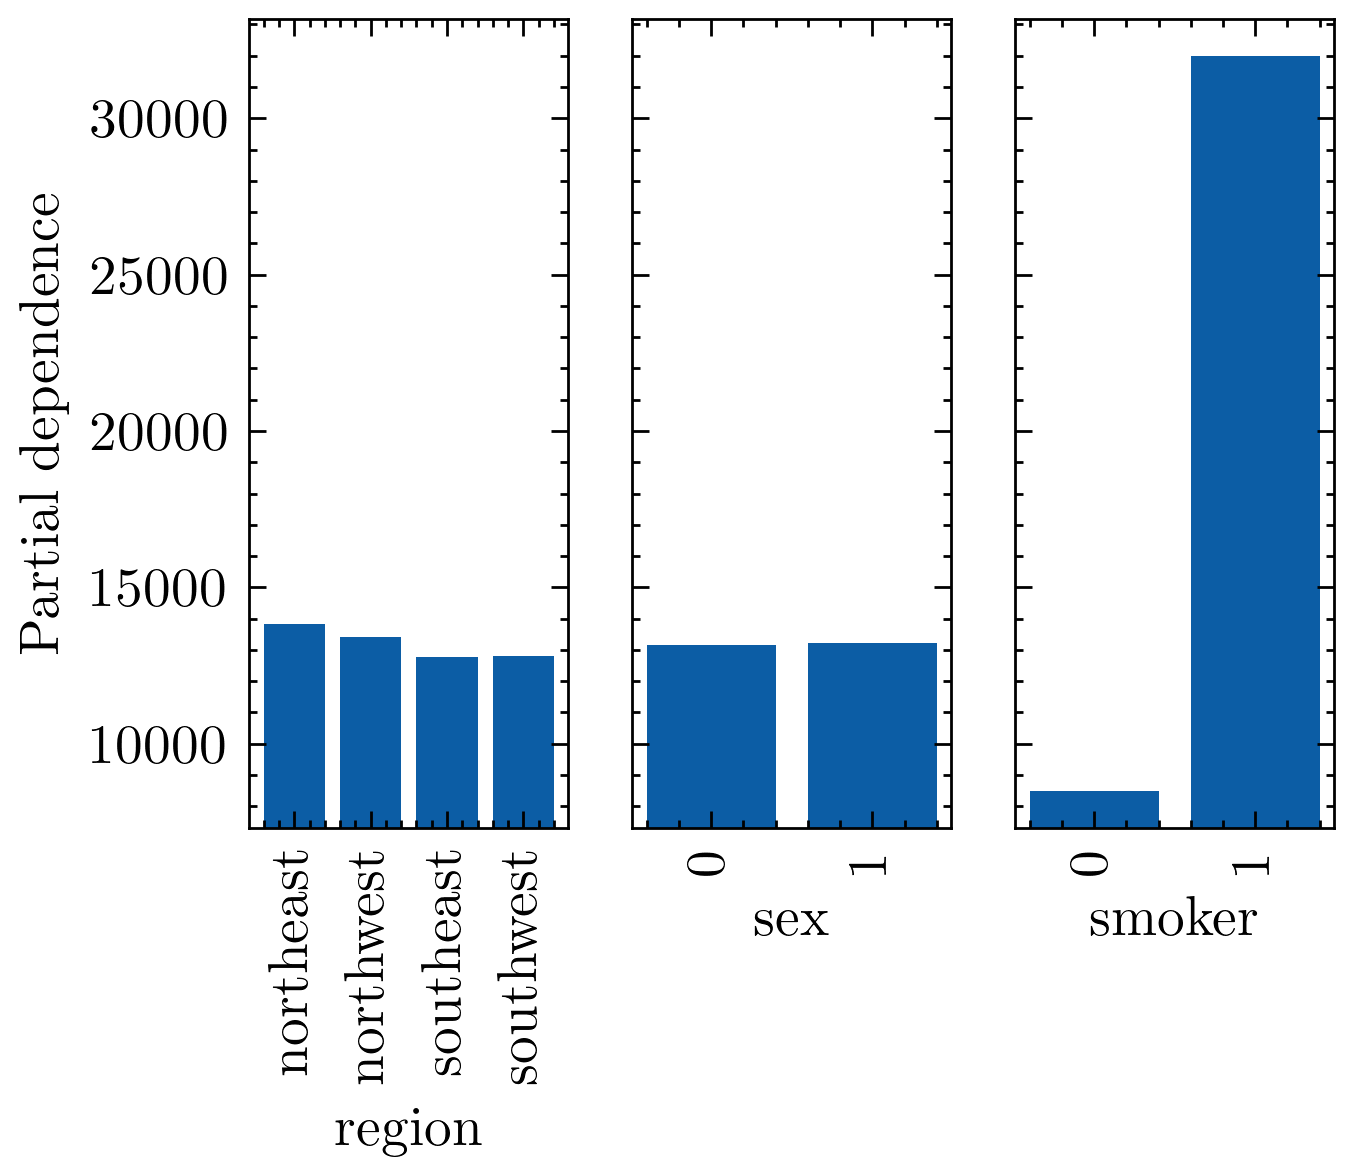

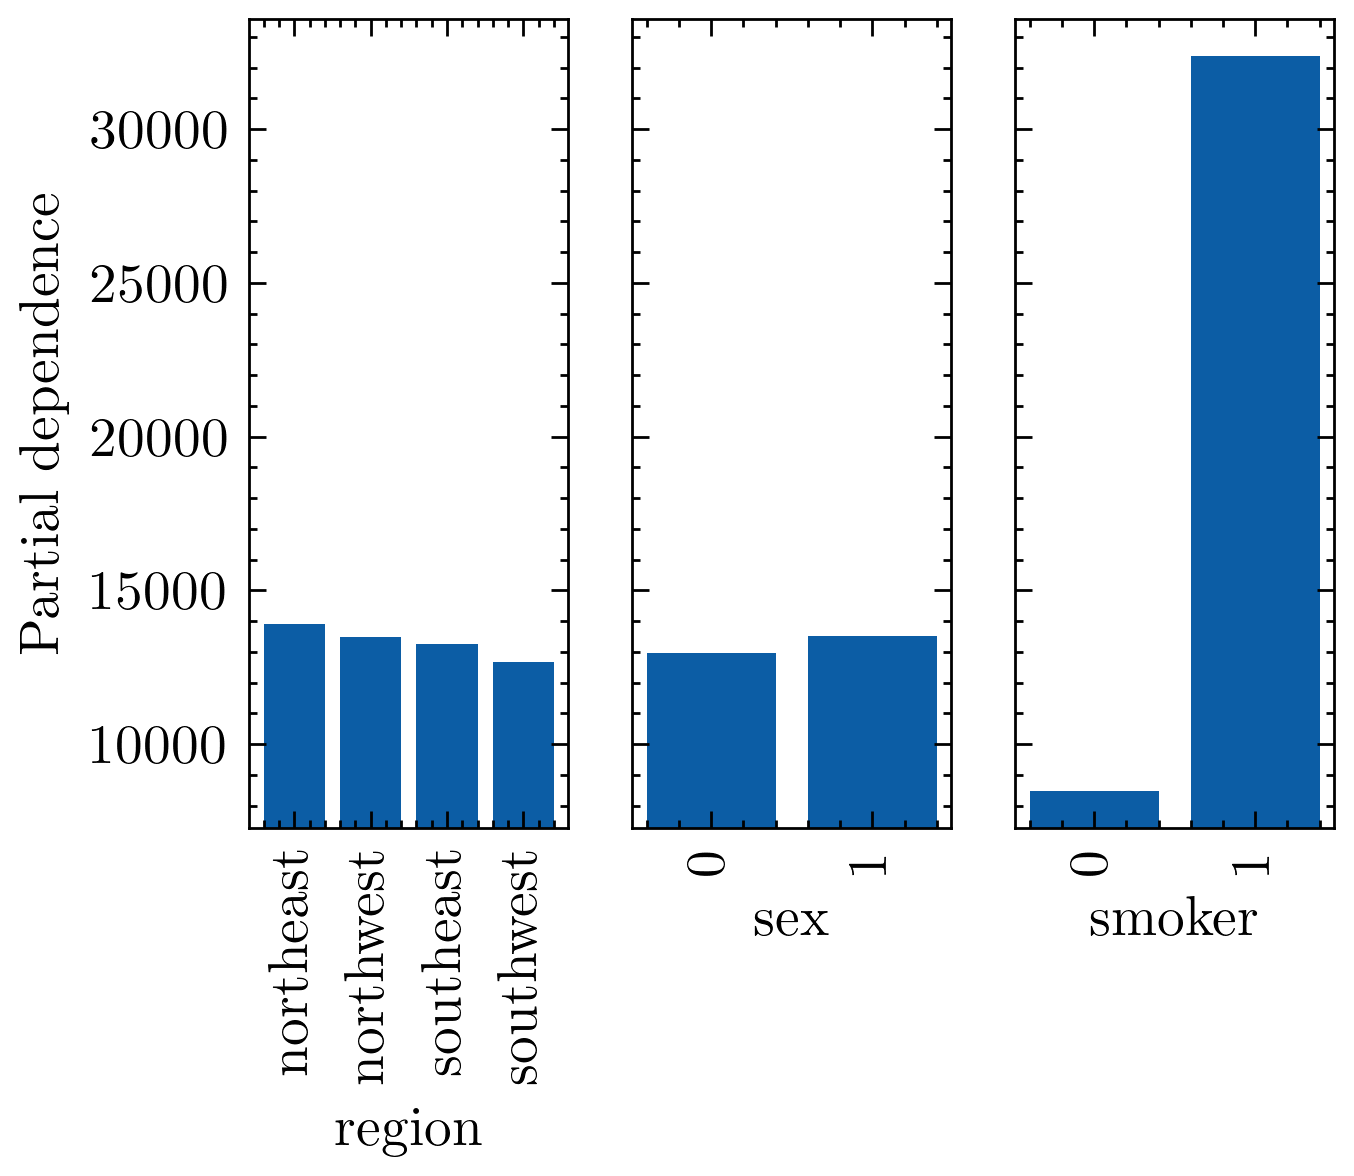

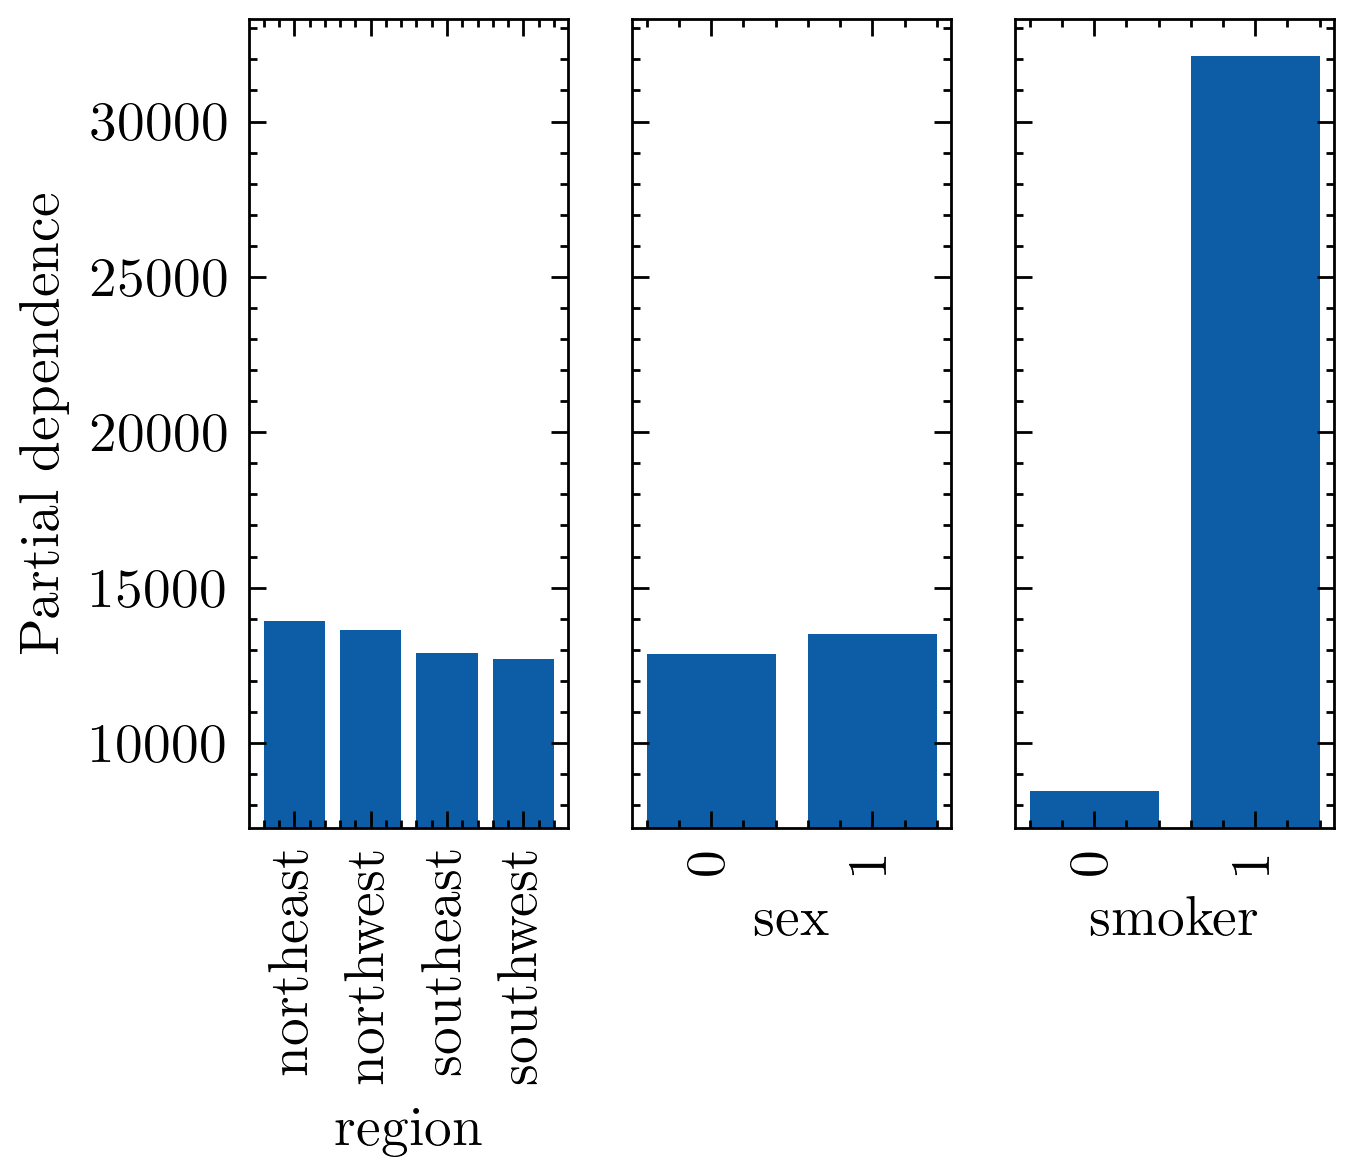

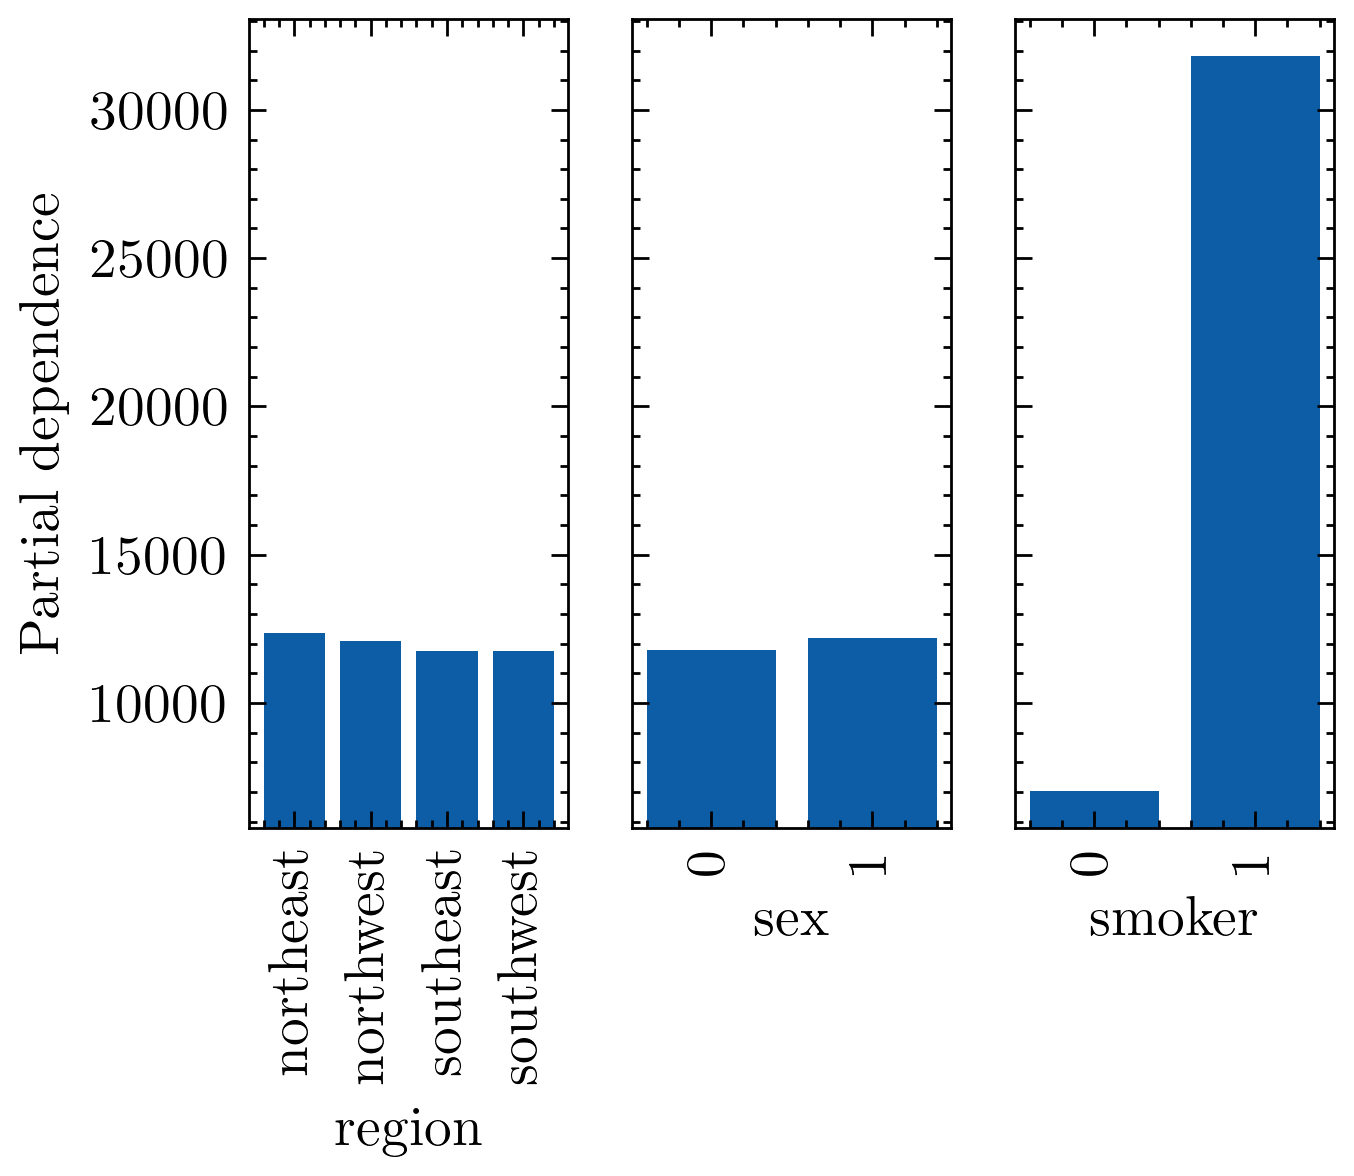

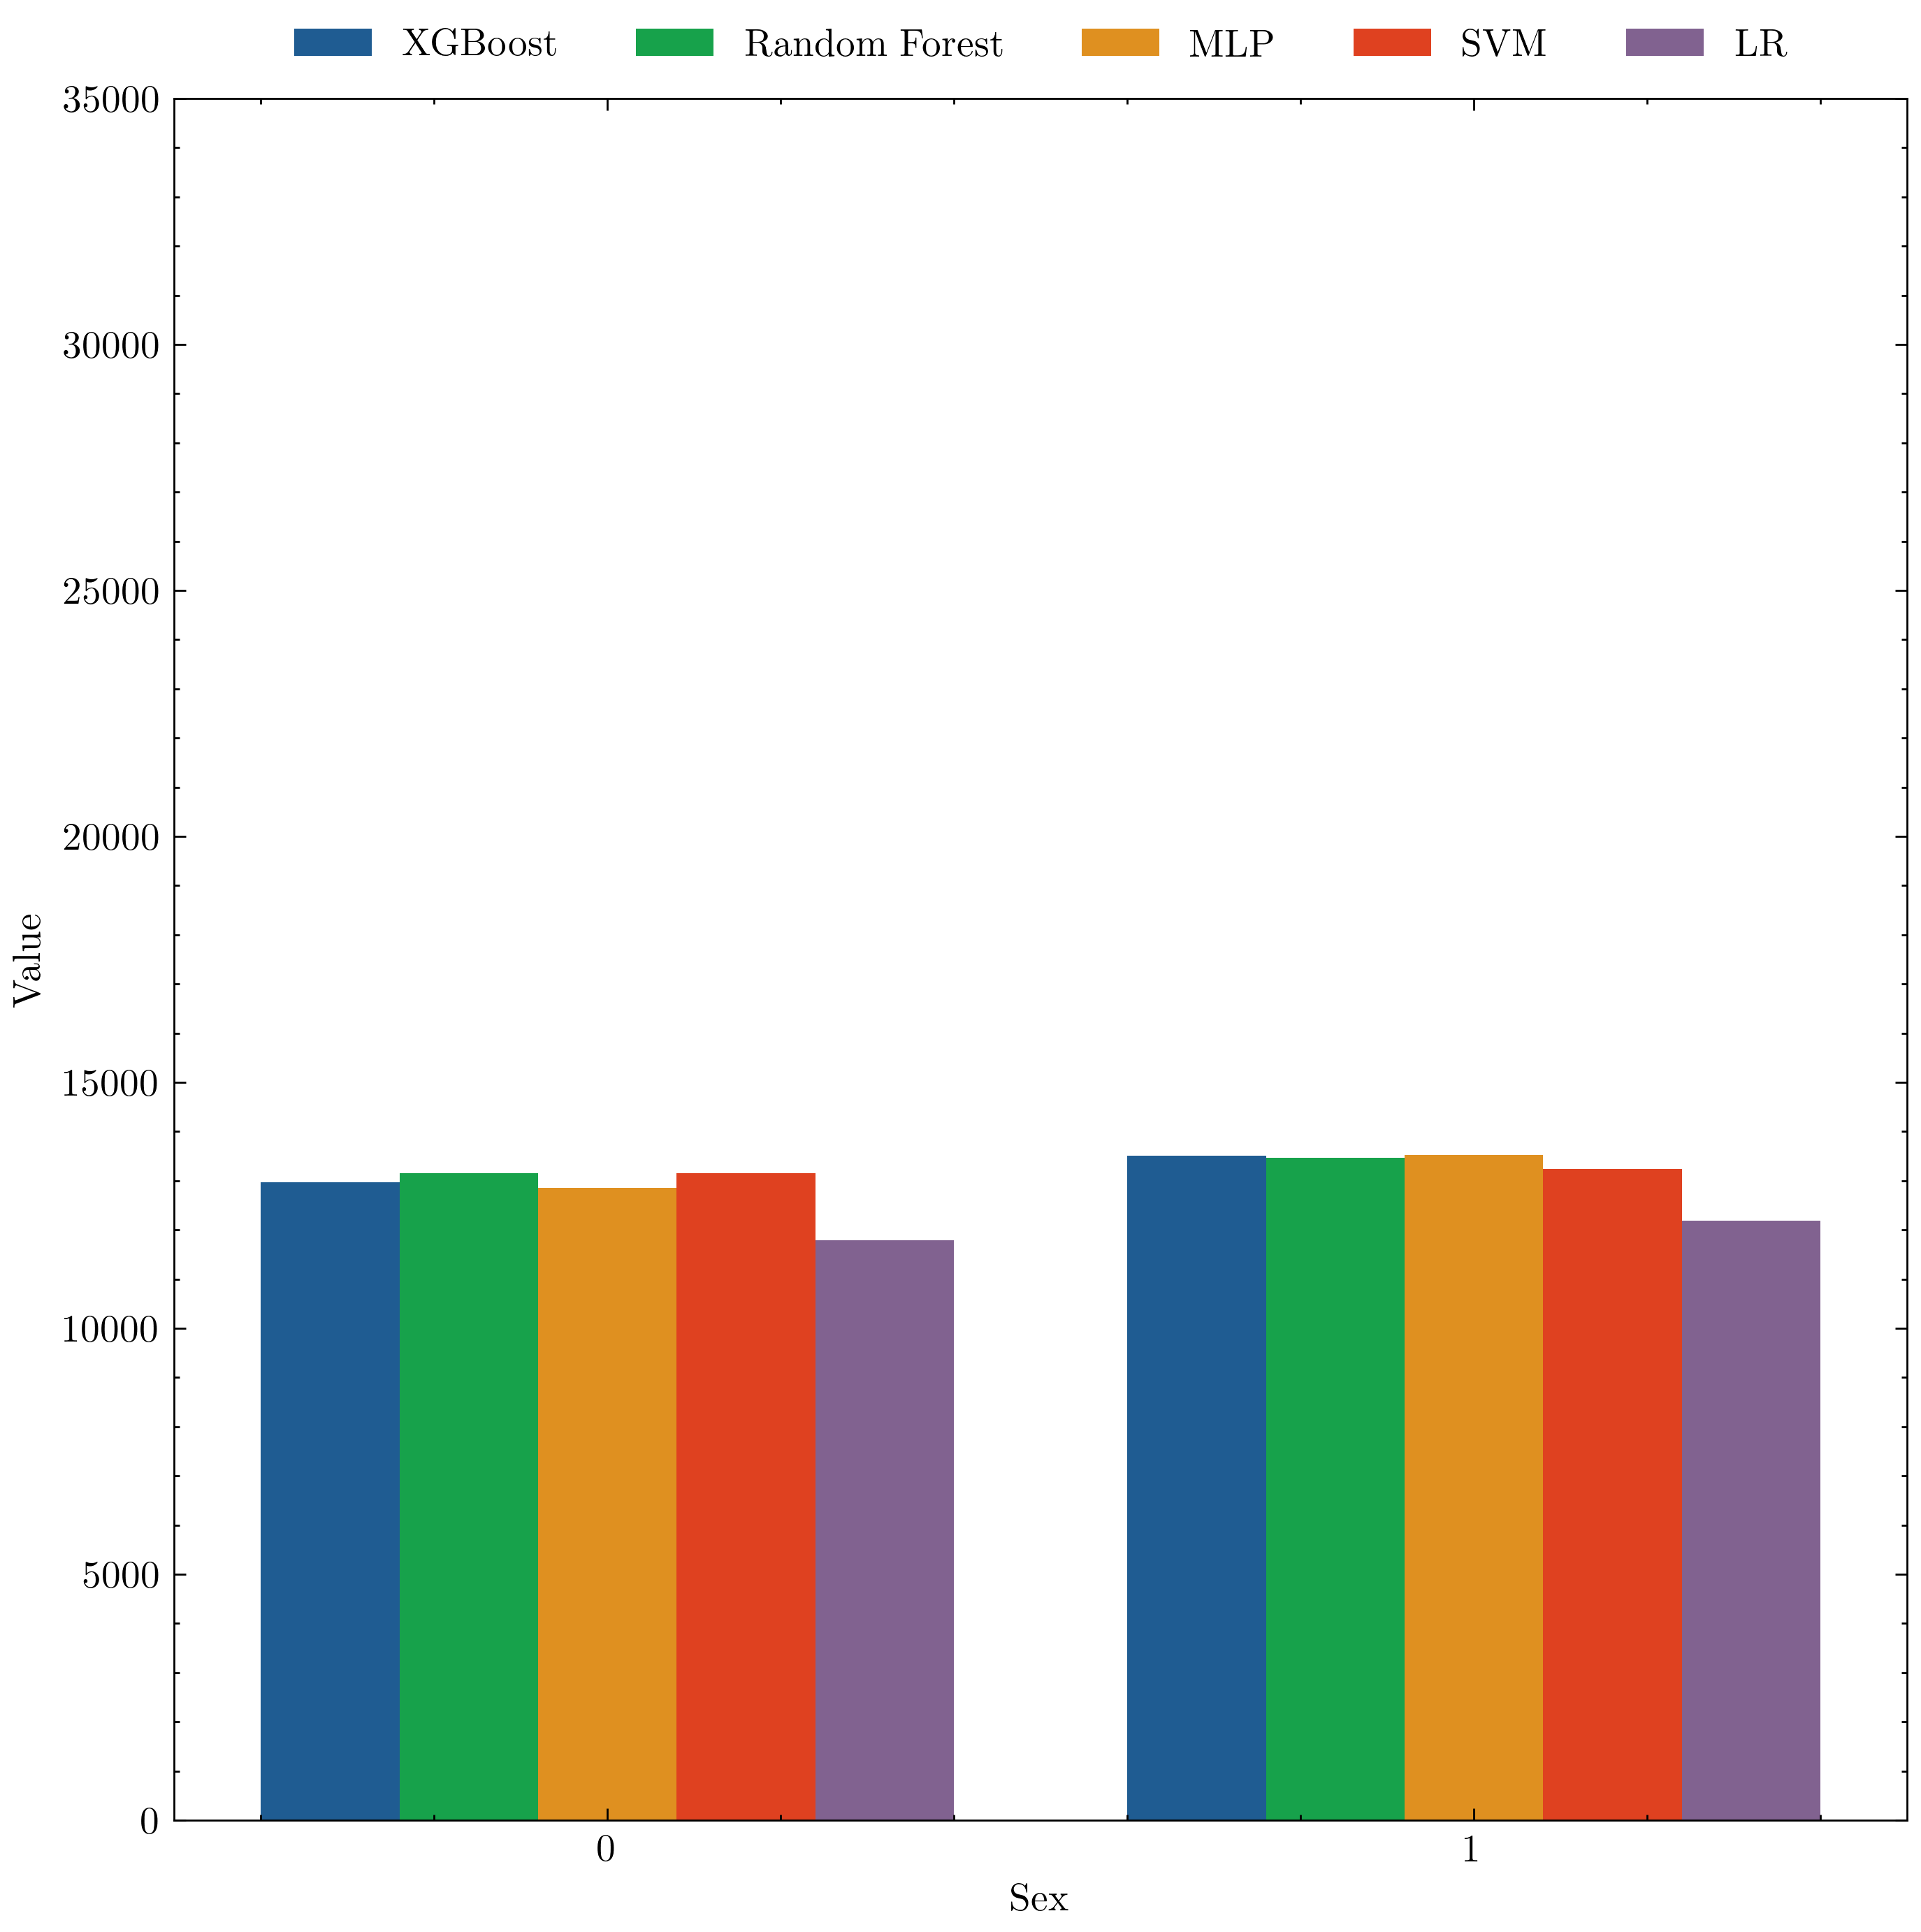

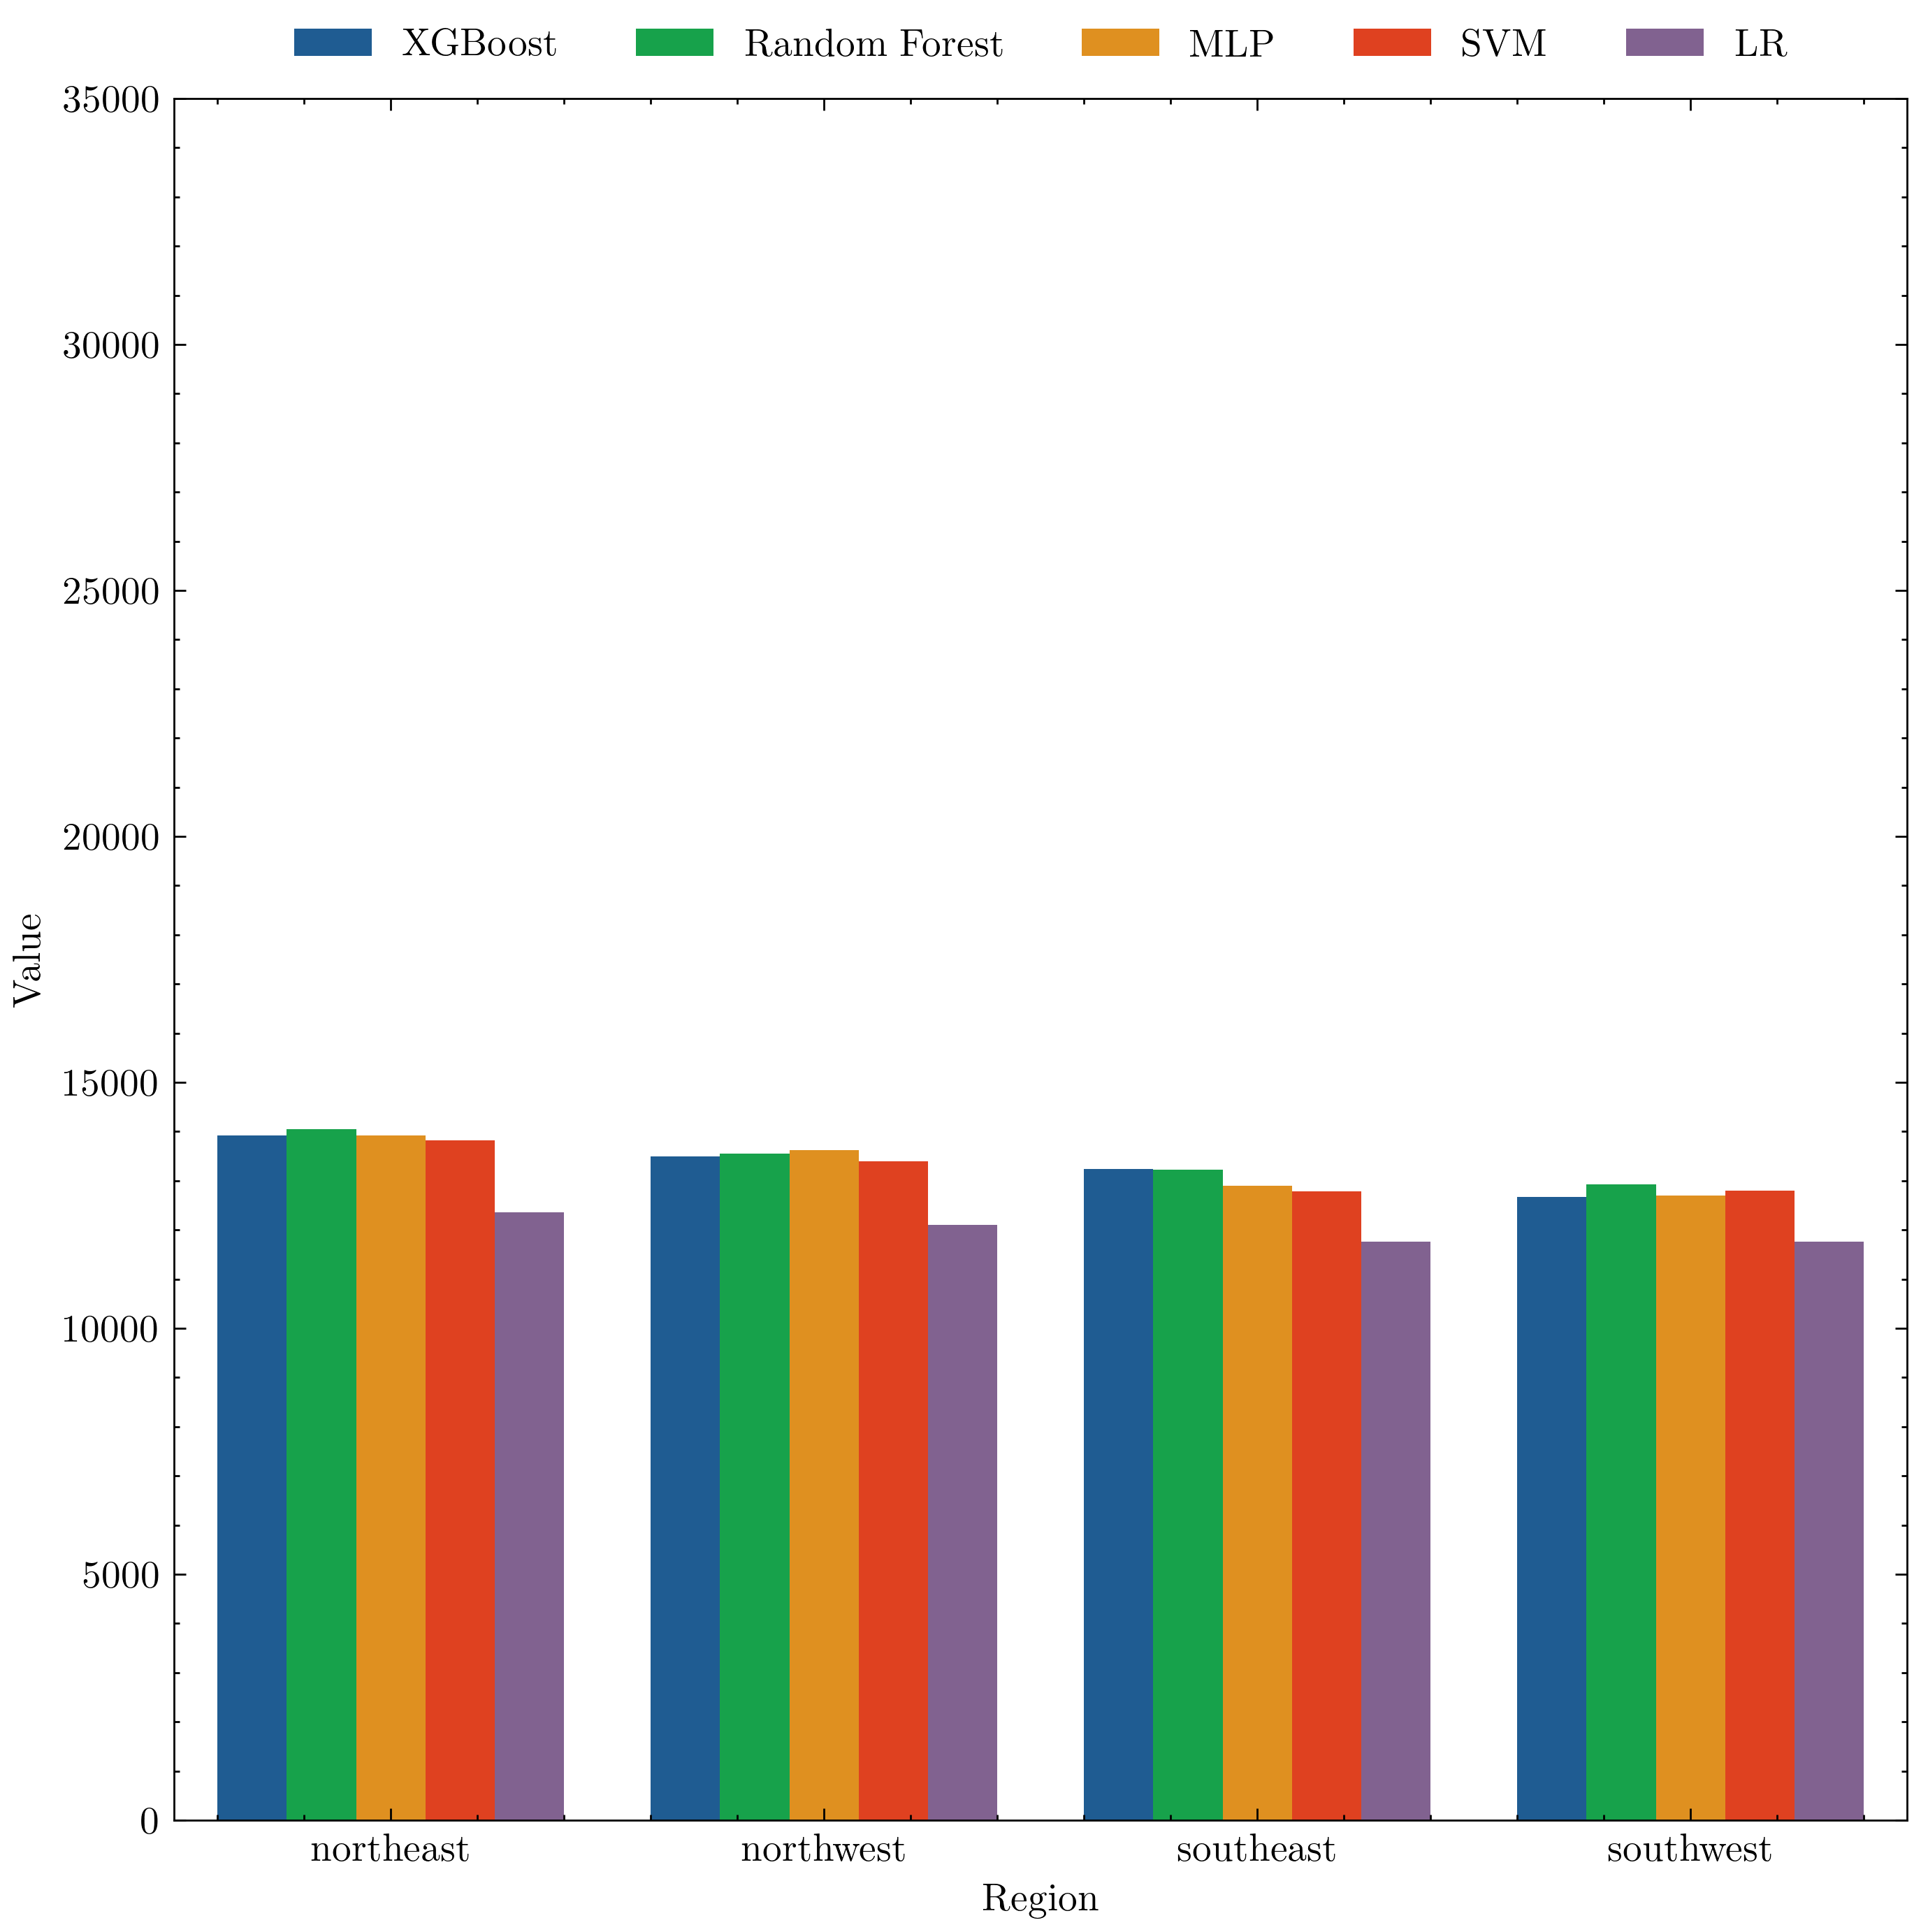

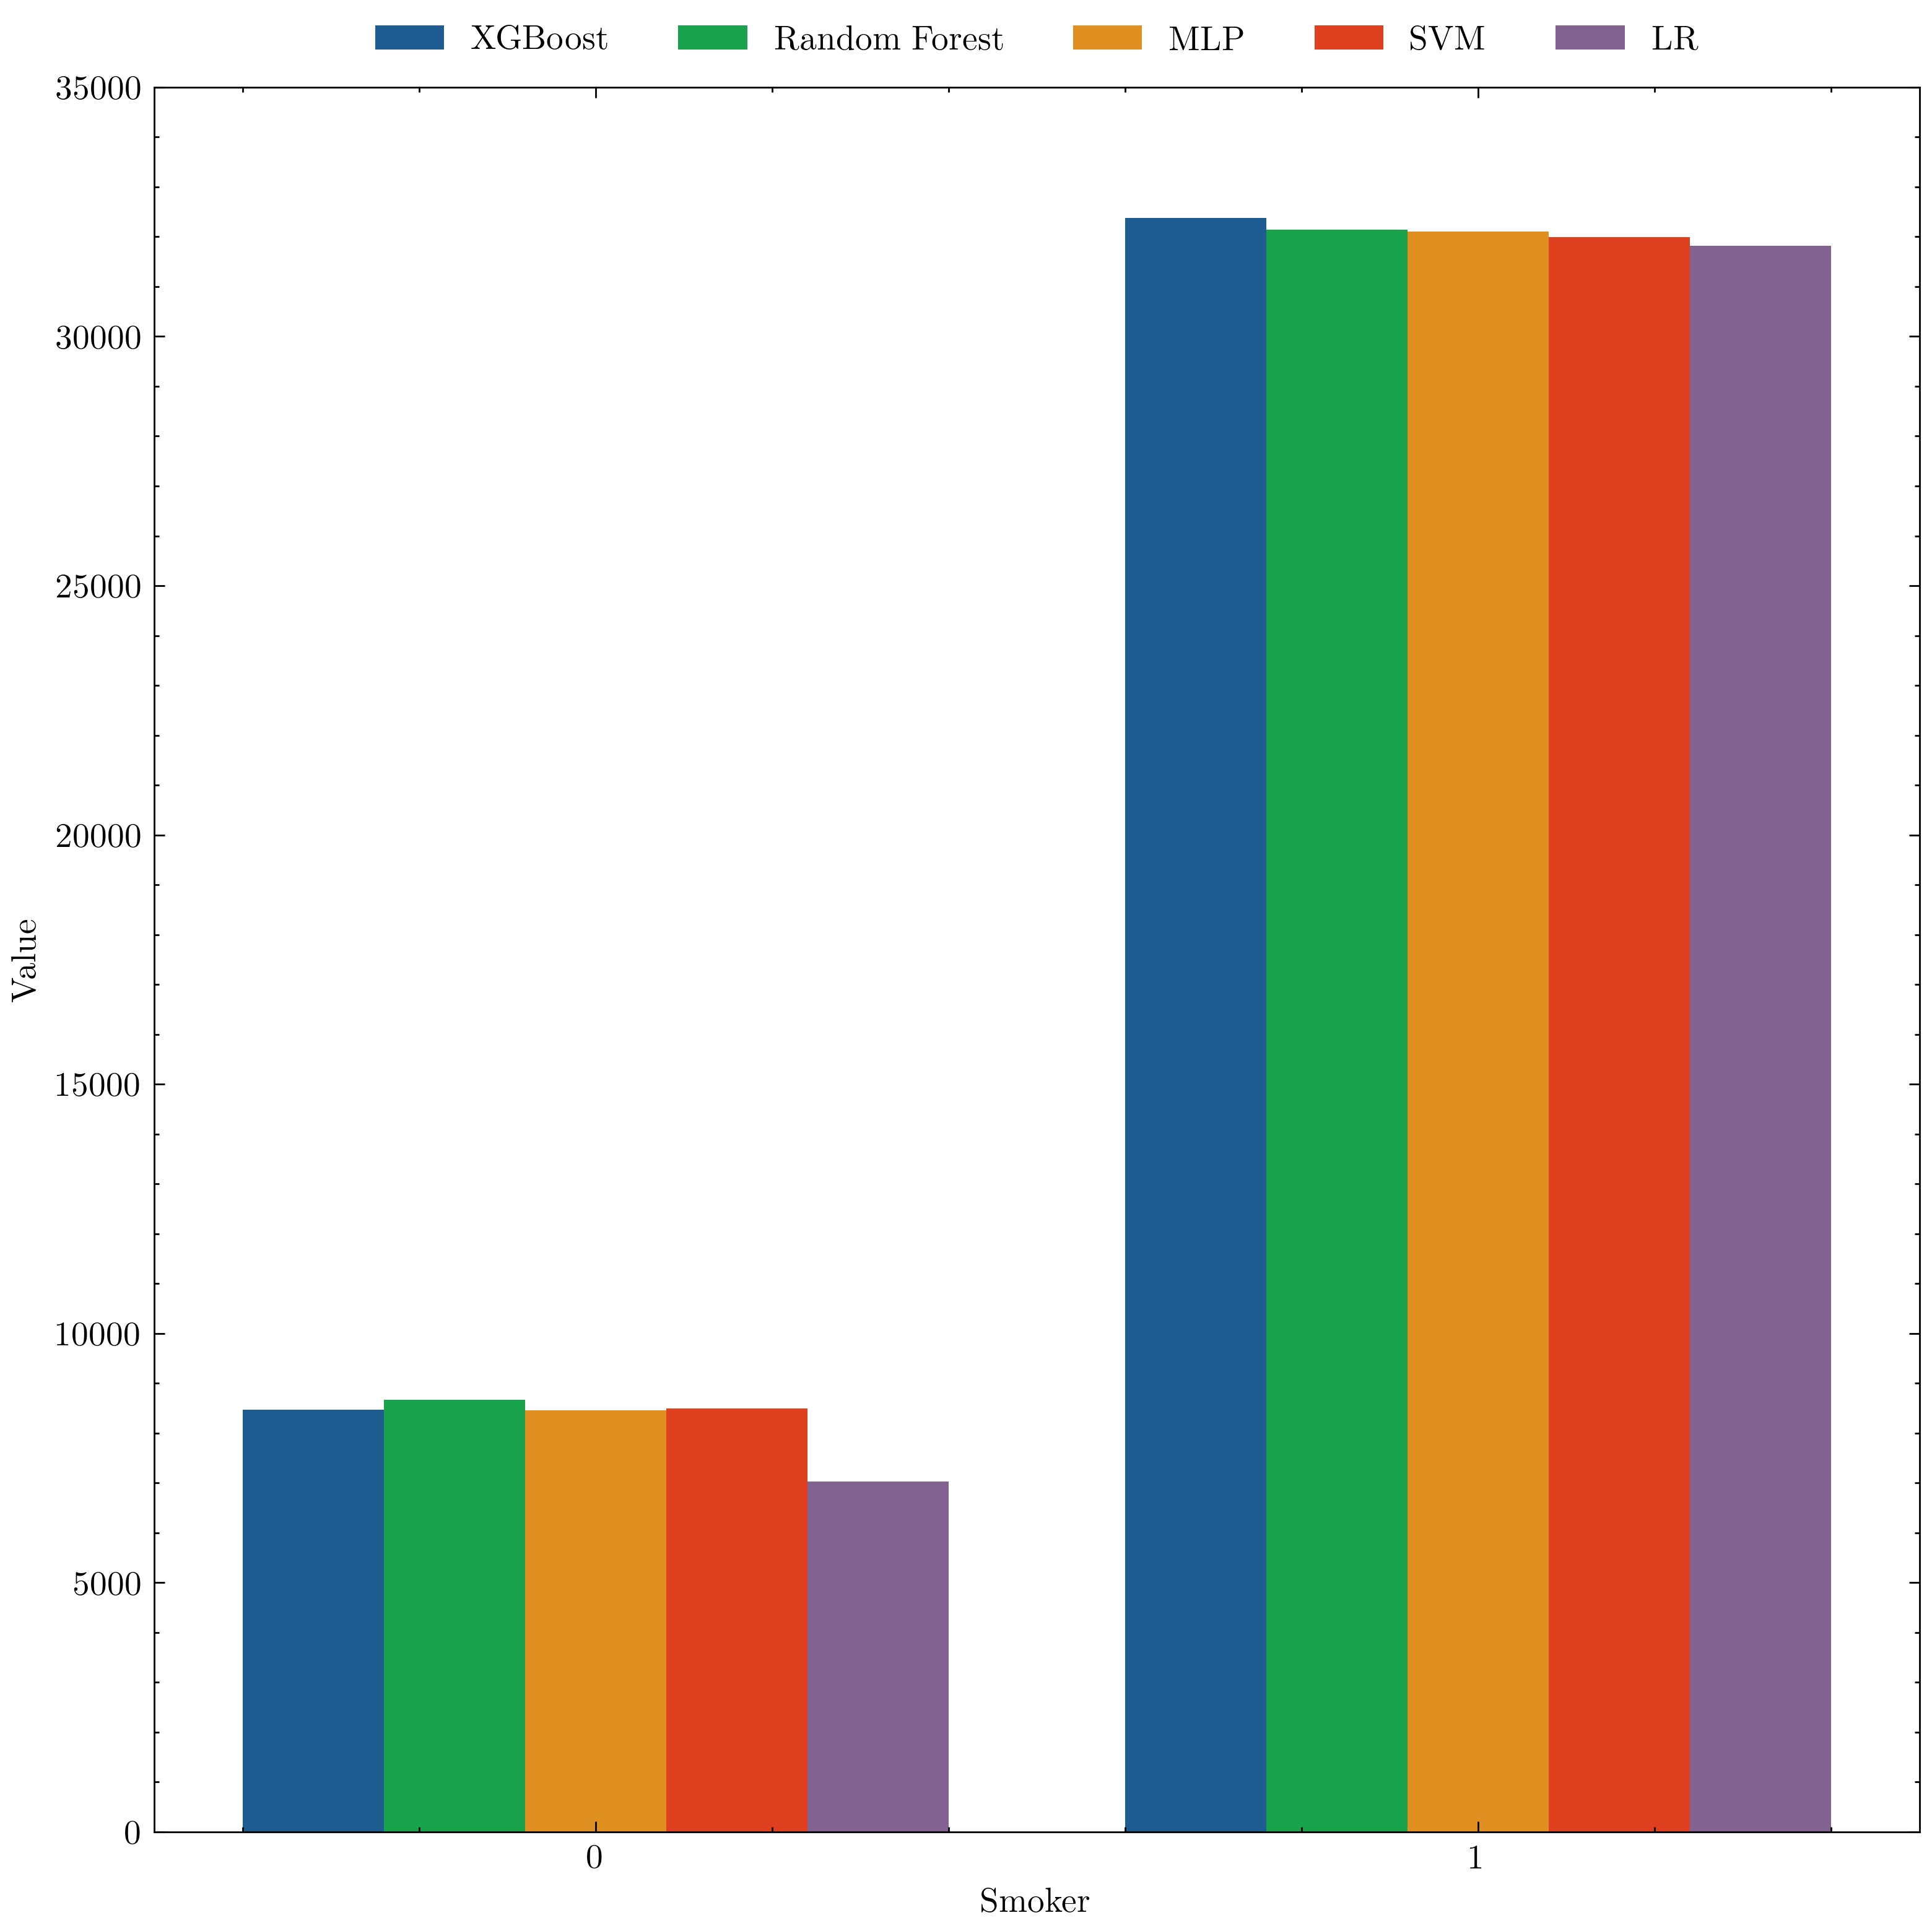

In [8]:
from sklearn.inspection import PartialDependenceDisplay


def plot():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # (rows, columns, index)
    rf_disp = PartialDependenceDisplay.from_estimator(random_forest_model, x_train, features=[
                                                      "region", "sex", "smoker"], categorical_features=["region", "sex", "smoker"], feature_names=features.columns)
    lr_disp = PartialDependenceDisplay.from_estimator(linear_regression_model, x_train, features=[
                                                      "region", "sex", "smoker"], categorical_features=["region", "sex", "smoker"], feature_names=features.columns)
    xgb_disp = PartialDependenceDisplay.from_estimator(xgb_model, x_train, features=[
                                                       "region", "sex", "smoker"], categorical_features=["region", "sex", "smoker"], feature_names=features.columns)

    mlrp_disp = PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[
                                                        "region", "sex", "smoker"], categorical_features=["region", "sex", "smoker"], feature_names=features.columns)

    svm_disp = PartialDependenceDisplay.from_estimator(svm_model, x_train, features=[
                                                       "region", "sex", "smoker"], categorical_features=["region", "sex", "smoker"], feature_names=features.columns)
    displays = [xgb_disp, rf_disp, mlrp_disp, lr_disp, svm_disp]
    models = ["XGBoost", "Random Forest", "MLP", "SVM", "LR"]

    plt.figure(figsize=(8, 8))
    df_data = {
        'Sex': displays[0].pd_results[1]["values"][0],
    }
    for i, disp in enumerate(displays):
        data = disp.pd_results[1]
        df_data[models[i]] = data["average"].flatten()

    df = pd.DataFrame(df_data)
    df_melted = df.melt(id_vars='Sex', var_name='Group', value_name='Value')
    # Create the grouped barplot
    ax = sns.barplot(data=df_melted, x='Sex', y='Value', hue='Group')
    ax.set_ylim(0,35000)
    ax.set_ylabel('')
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=5, title=None, frameon=False)
    plt.figure(figsize=(8, 8))
    df_data = {
        'Region': displays[0].pd_results[0]["values"][0],
    }
    for i, disp in enumerate(displays):
        data = disp.pd_results[0]
        df_data[models[i]] = data["average"].flatten()

    df = pd.DataFrame(df_data)
    df_melted = df.melt(id_vars='Region', var_name='Group', value_name='Value')
    # Create the grouped barplot
    ax = sns.barplot(data=df_melted, x='Region', y='Value', hue='Group')
    ax.set_ylim(0,35000)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=5, title=None, frameon=False)

    plt.figure(figsize=(8, 8))
    df_data = {
        'Smoker': displays[0].pd_results[2]["values"][0],
    }
    for i, disp in enumerate(displays):
        data = disp.pd_results[2]
        df_data[models[i]] = data["average"].flatten()

    df = pd.DataFrame(df_data)
    df_melted = df.melt(id_vars='Smoker', var_name='Group', value_name='Value')
    # Create the grouped barplot
    ax = sns.barplot(data=df_melted, x='Smoker', y='Value', hue='Group')
    ax.set_ylim(0,35000)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=5, title=None, frameon=False)

    plt.tight_layout()
    plt.show()


plot()

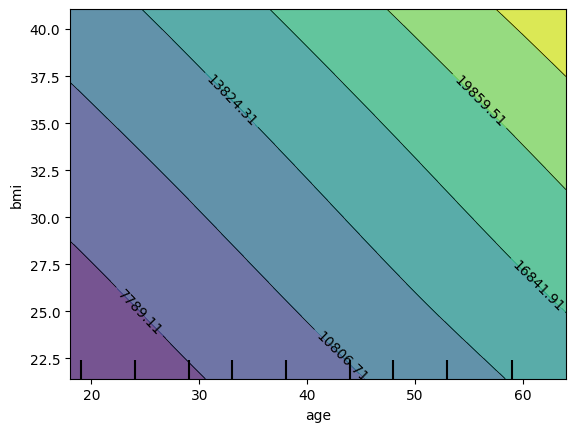

In [ ]:
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[(
    "age", "bmi")], feature_names=features2.columns, ax=ax, categorical_features=["region", "sex", "smoker"])

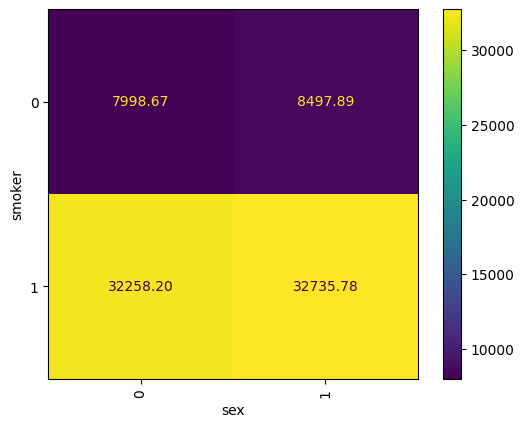

In [ ]:
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[(
    "smoker", "sex")], feature_names=features2.columns, ax=ax, categorical_features=["region", "sex", "smoker"])

In [ ]:
from sklearn.model_selection import KFold


def calculate_cv_scores(models, X, y):
    # Initialize lists to store results
    results = []

    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for model in models:
        model_name = type(model).__name__
        mse_scores = []
        rmse_scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate MSE and RMSE
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            mse_scores.append(mse)
            rmse_scores.append(rmse)

        # Calculate mean MSE and RMSE across folds
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)

        # Append results to the list
        results.append({
            'Model': model_name,
            'Mean_MSE': mean_mse,
            'Mean_RMSE': mean_rmse
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df


models = [dnn_model, xgb_model, random_forest_model, linear_regression_model]
df = calculate_cv_scores(models, features, targets)
display(df)

Model    Mean_MSE  Mean_RMSE
0  Pipeline 28983843.01    5375.60
1  Pipeline 27115166.78    5201.35
2  Pipeline 23795675.30    4873.68
3  Pipeline 36998683.92    6077.23

In [ ]:
with open("z.tex", "w") as f:
    f.write(df.to_latex())

In [3]:

import pandas as pd
import os
data = pd.read_csv(os.path.join(os.getcwd(),
                   "housing.csv"))
df = data.copy()
df.dropna(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = df.join(dummies.astype(int))
df = df.drop('ocean_proximity', axis=1)
x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]
df = data.copy()
df.dropna(inplace=True)
x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='error', drop='first'))])
categorical_cols = ["ocean_proximity"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["longitude", "latitude", "housing_median_age",
         "total_rooms", "total_bedrooms", "population", "households", "median_income"]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

linear_regression_model = make_pipeline(
    preprocessor,
    LinearRegression()
)
linear_regression_model.fit(x_train, y_train)
pred = linear_regression_model.predict(x_test)
print(r2_score(y_test, pred))
print('MSE lr:', metrics.mean_squared_error(y_test, pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='error'))])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["longitude", "latitude", "housing_median_age",
         "total_rooms", "total_bedrooms", "population", "households", "median_income"]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
random_forest_model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)
random_forest_model.fit(x_train, y_train)
pred = random_forest_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
xgb_model = make_pipeline(
    preprocessor,
    xgb.XGBRegressor()
)
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE xgb:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


0.646057998908627
MSE lr: 4755473269.672324
RMSE rf: 68959.93960026592
0.8279329305145423
RMSE rf: 48081.68761872076
0.8376828302223096
RMSE xgb: 46699.588339942515


In [4]:
svm_model = make_pipeline(
    preprocessor,
    StandardScaler(),
    SVR(kernel='linear', C=400)
)

svm_model.fit(x_train, y_train)
pred = svm_model.predict(x_test)
print(r2_score(y_test, pred))
print('MSE svm:', metrics.mean_squared_error(y_test, pred))
print('RMSE svm:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.6258805508797557
MSE svm: 5026572247.6281185
RMSE svm: 70898.32330618348


In [5]:
dnn_model = make_pipeline(
    preprocessor,
    MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
)
dnn_model.fit(x_train, y_train)
pred = dnn_model.predict(x_test)
print(r2_score(y_test, pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

0.7106529942986326
RMSE dnn: 62350.5541488049


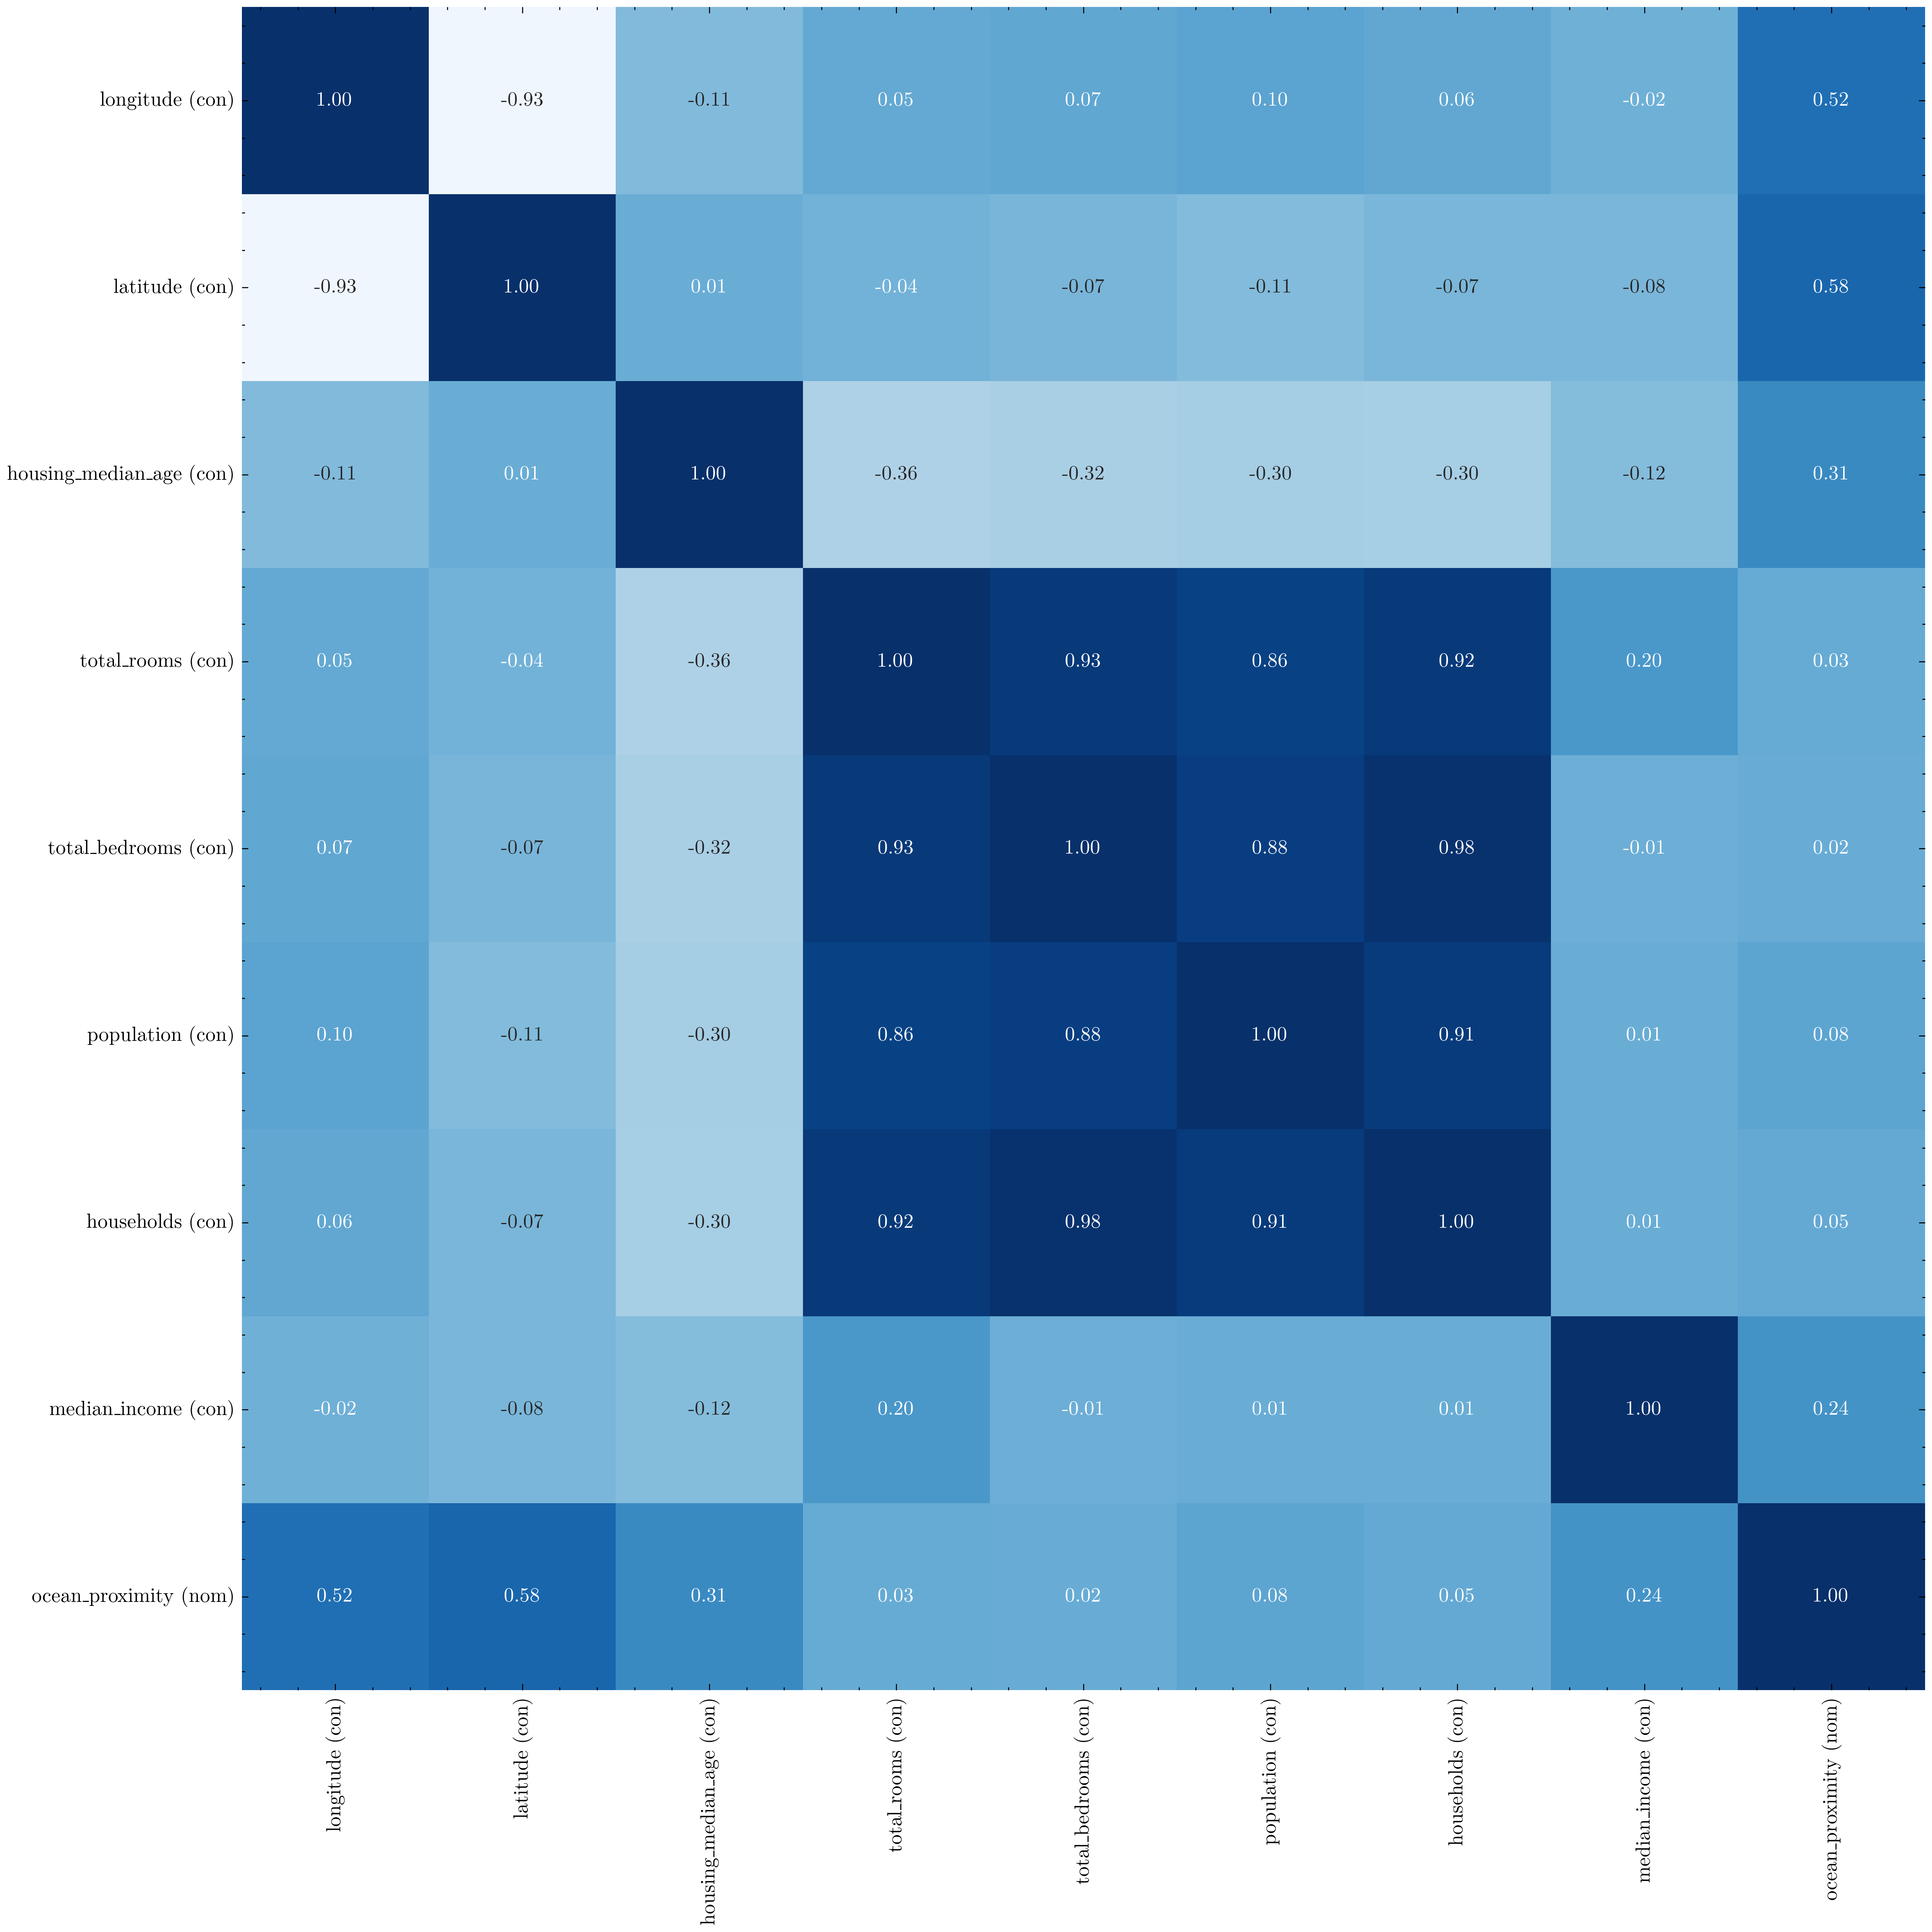

In [10]:
from dython.nominal import associations  # correlation calculation

correlation_matrix = associations(
    x_train, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True,cmap="Blues",cbar=False)

<Figure size 4000x2800 with 0 Axes>

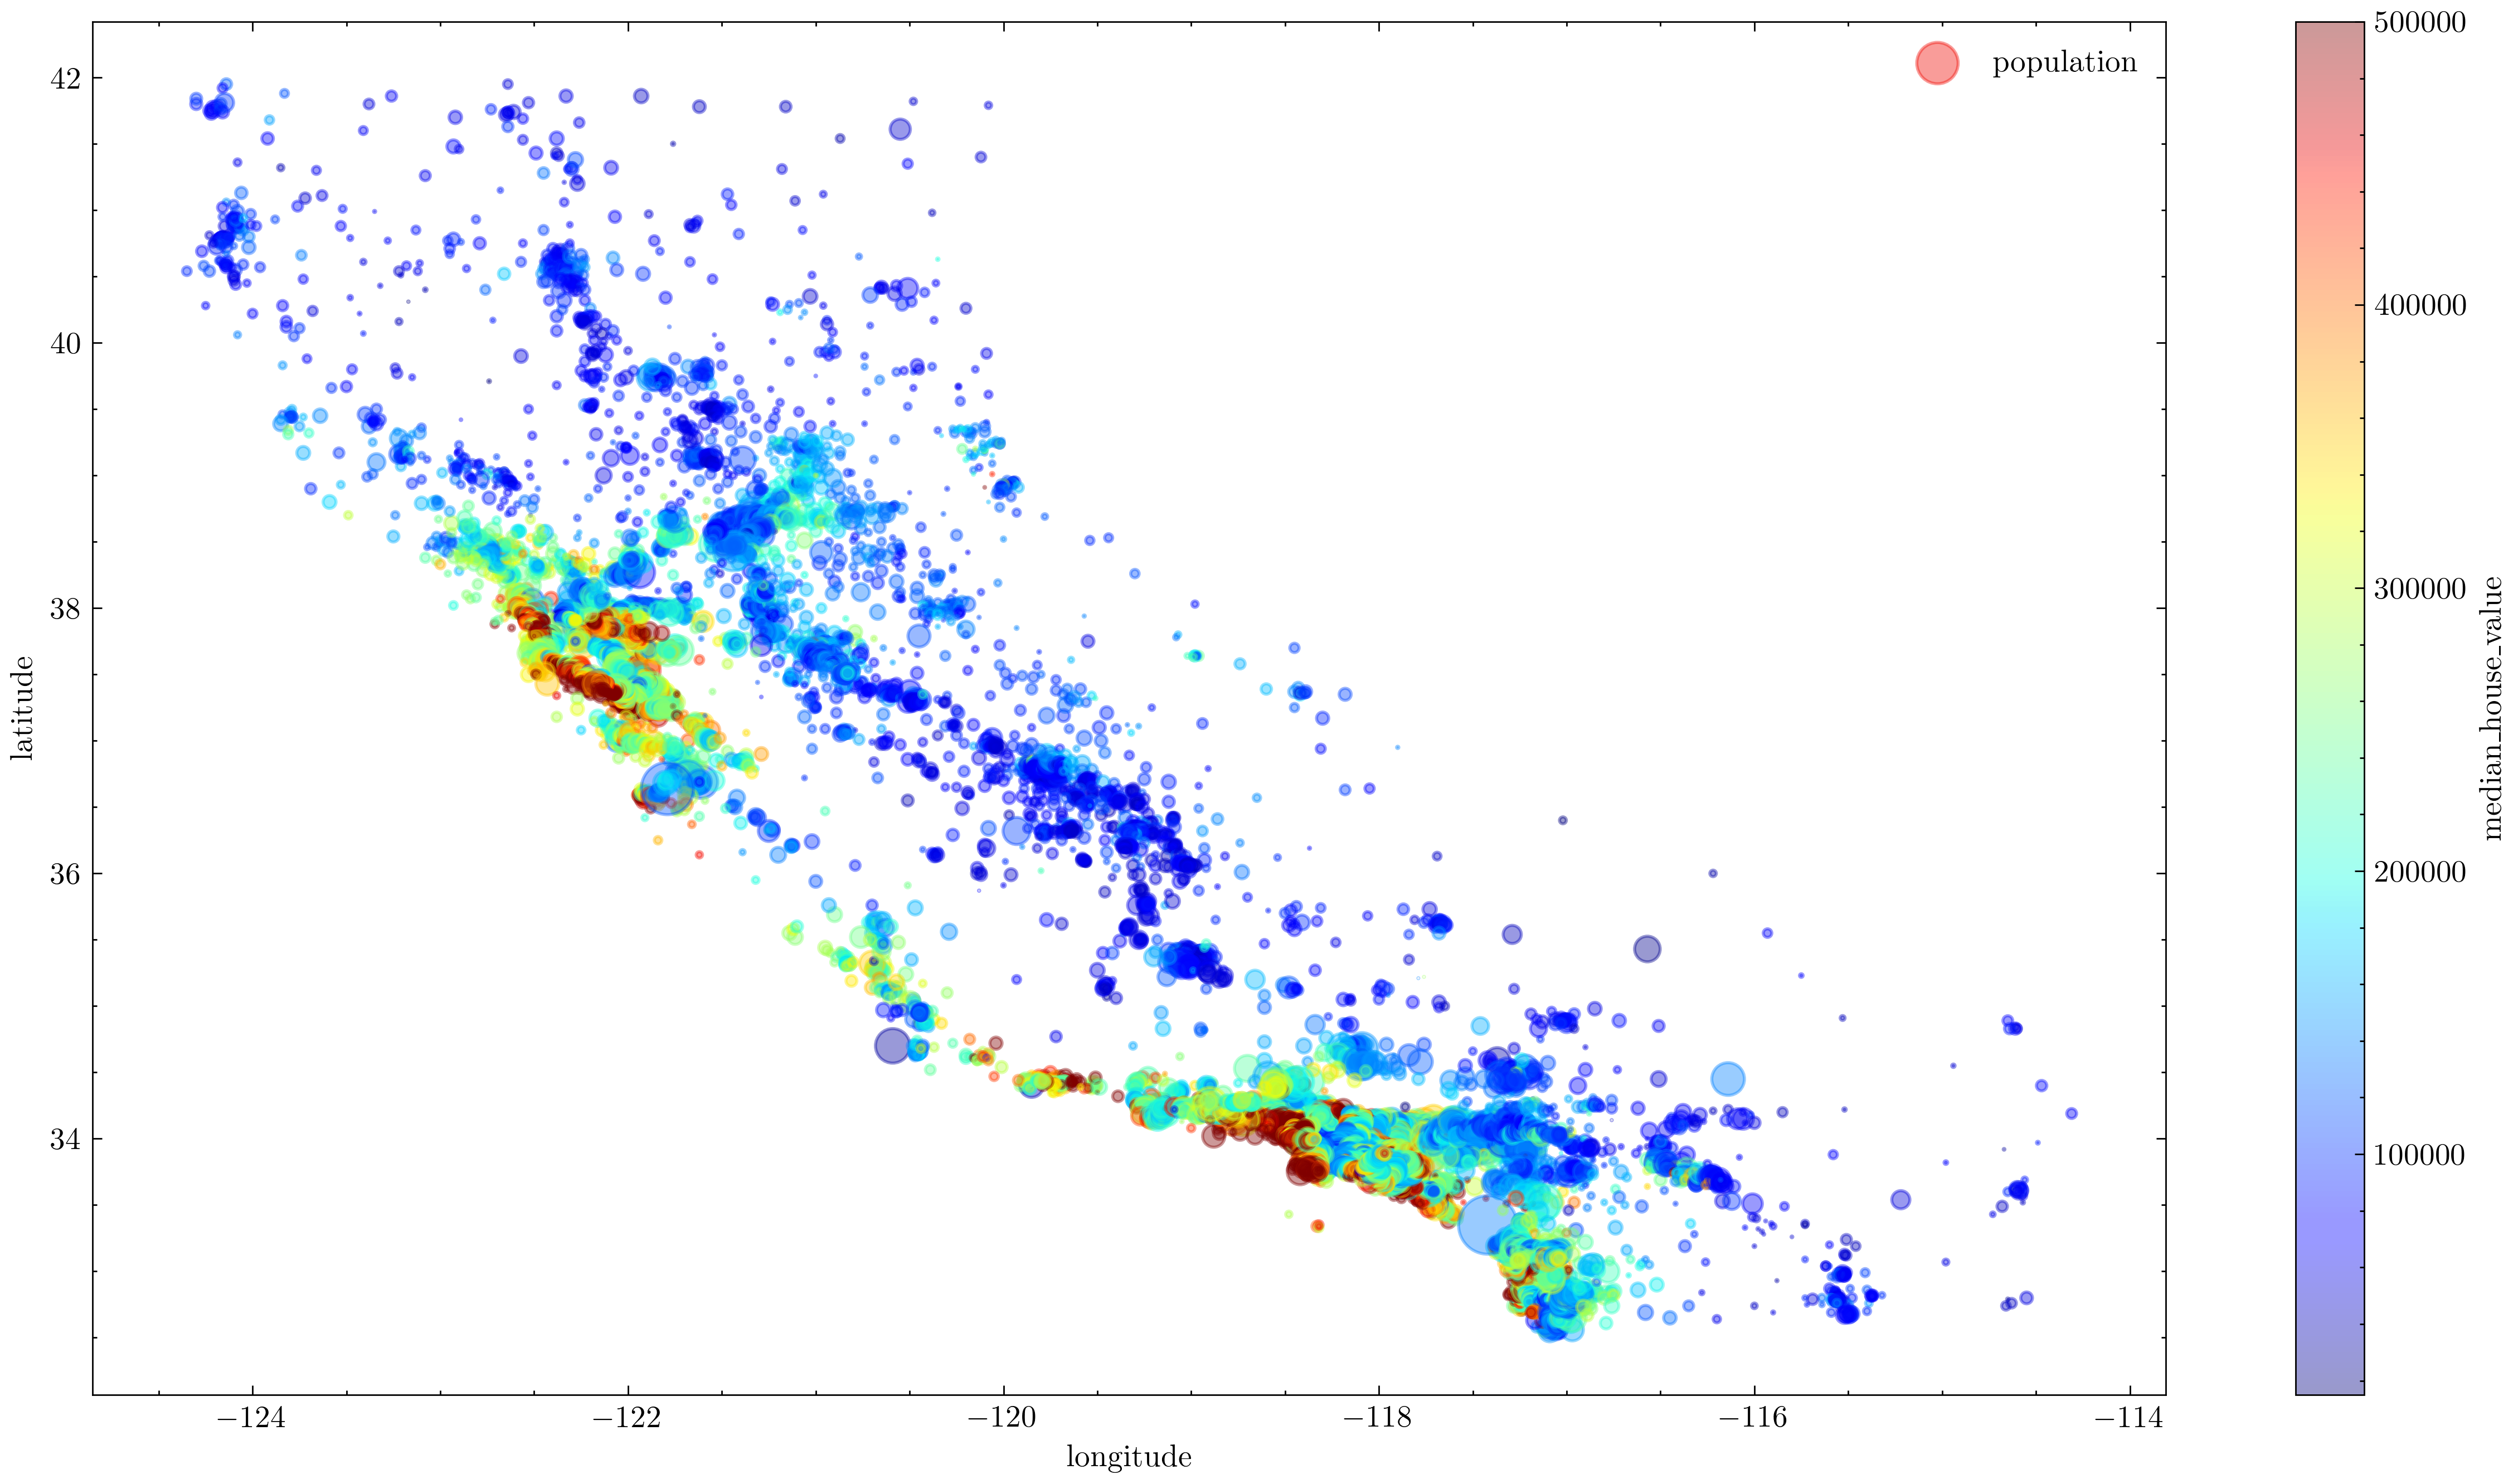

In [19]:
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

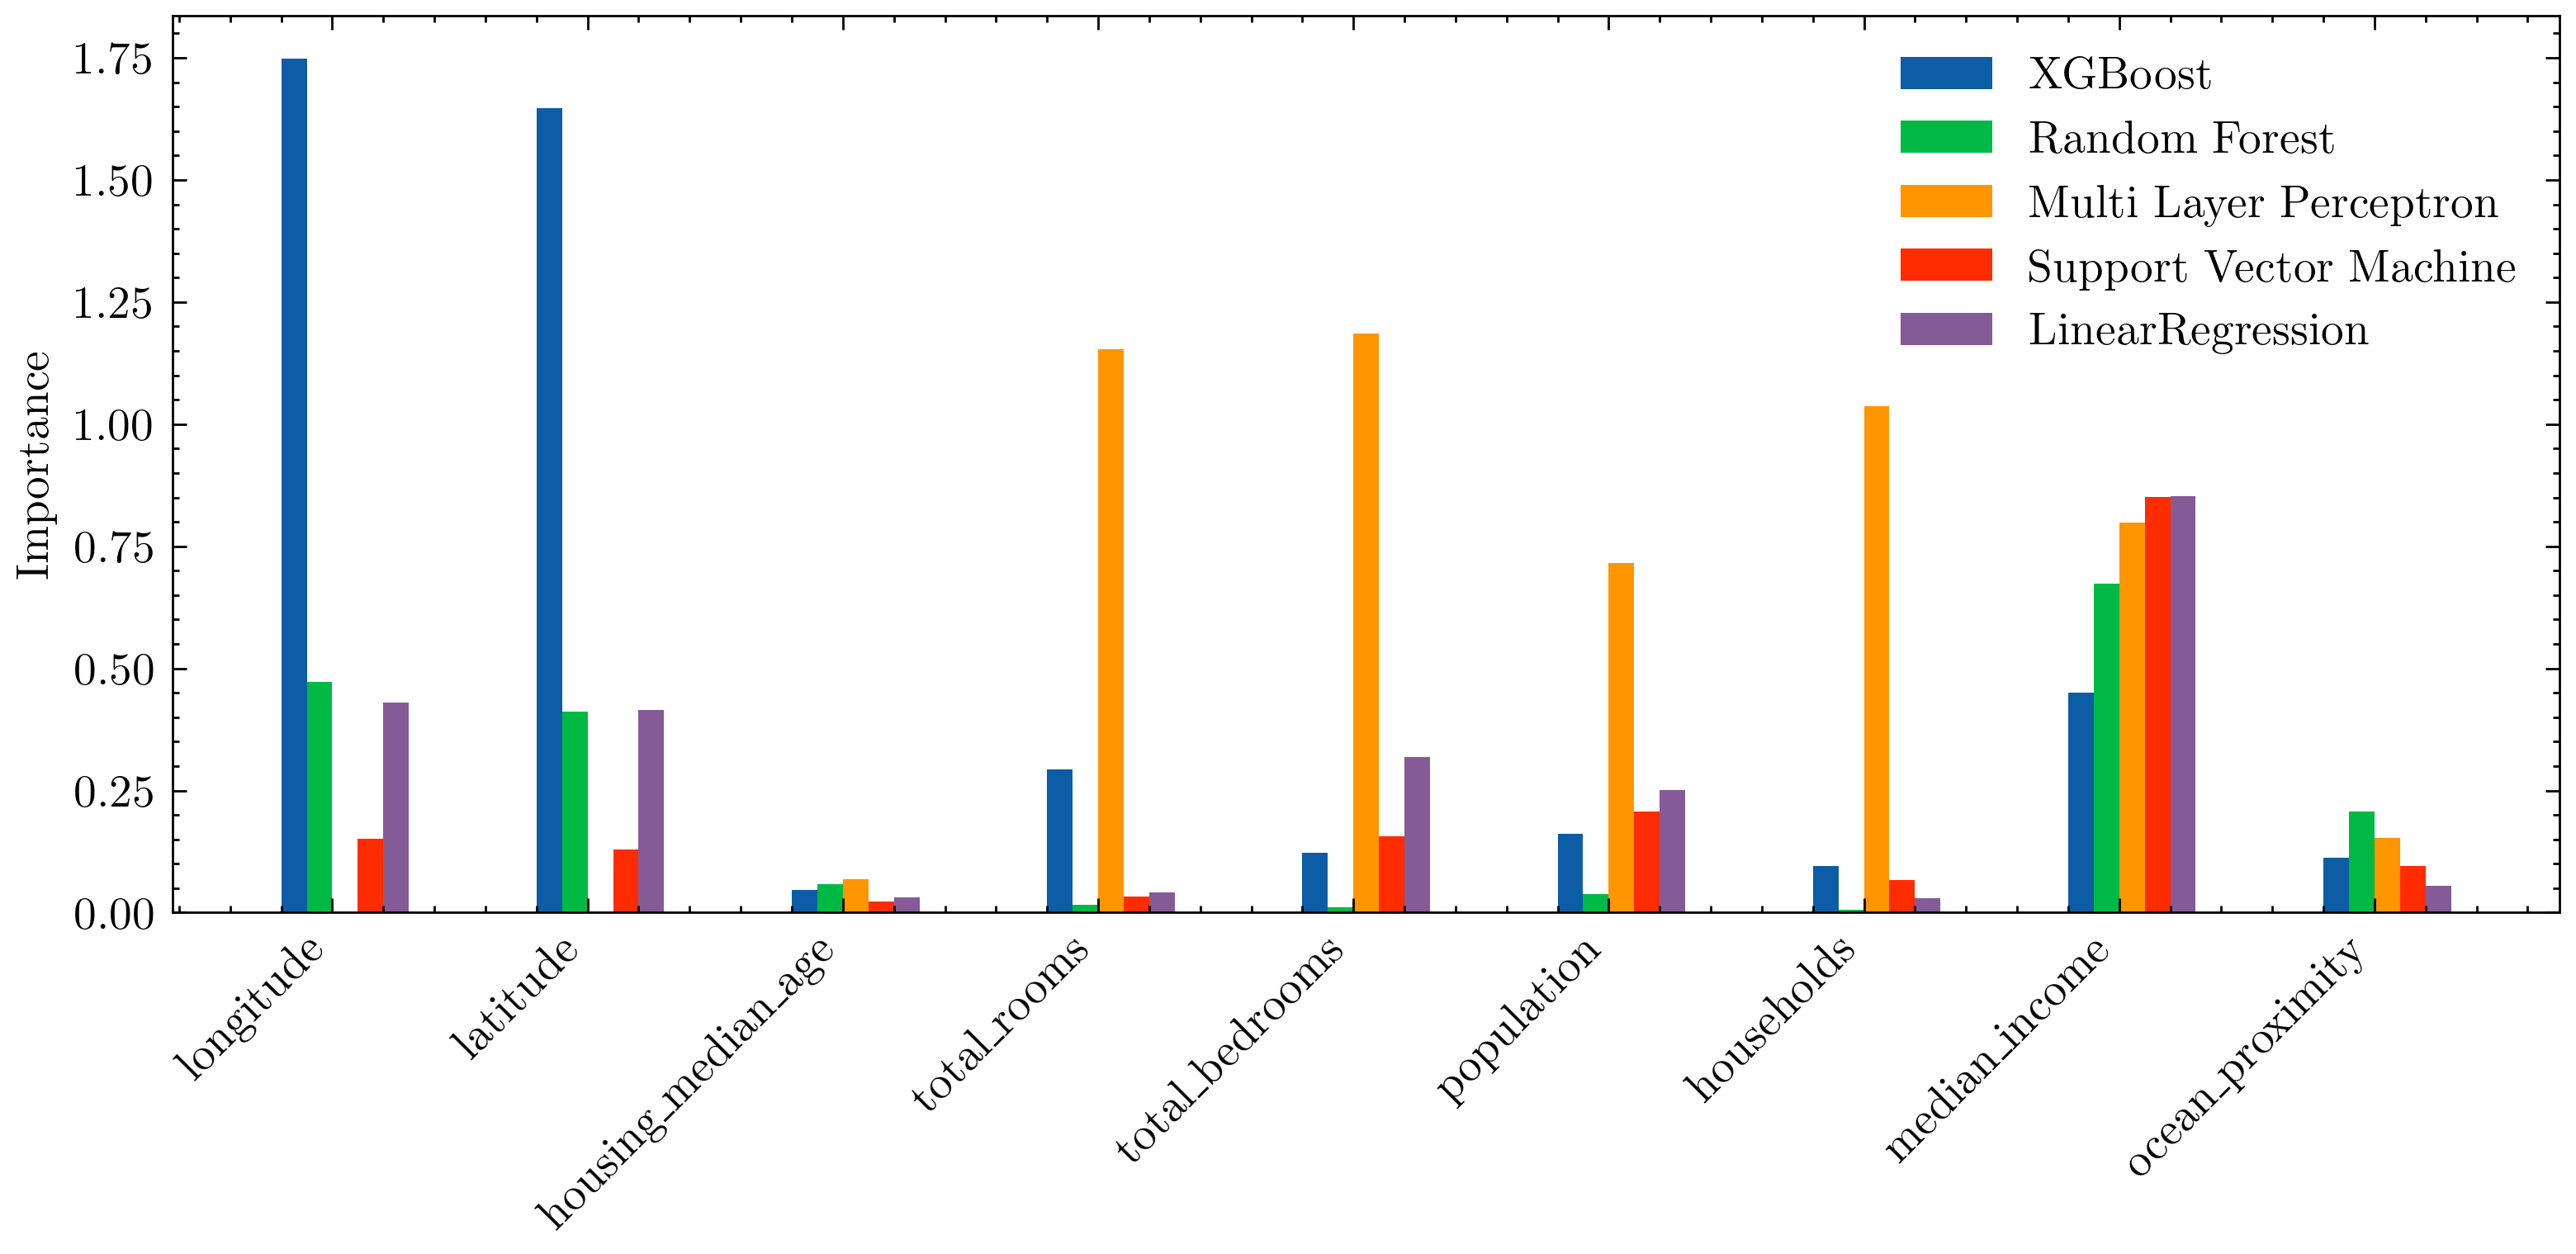

In [11]:
models = {
    'XGBoost': xgb_model,
    'Random Forest': random_forest_model,
    'Multi Layer Perceptron': dnn_model,
    'Support Vector Machine': svm_model,
    "LinearRegression": linear_regression_model,
}
num_colors = 10
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
custom_colors = color_cycle[:num_colors]
plot_feature_importance_comparison(
    models, x_test, y_test, colors=custom_colors)
# plot_feature_mean_squared_error(models, x_train, y_train, custom_colors)

feaure correlation

ValueError: all features must be in [0, 5] or [-6, 0]

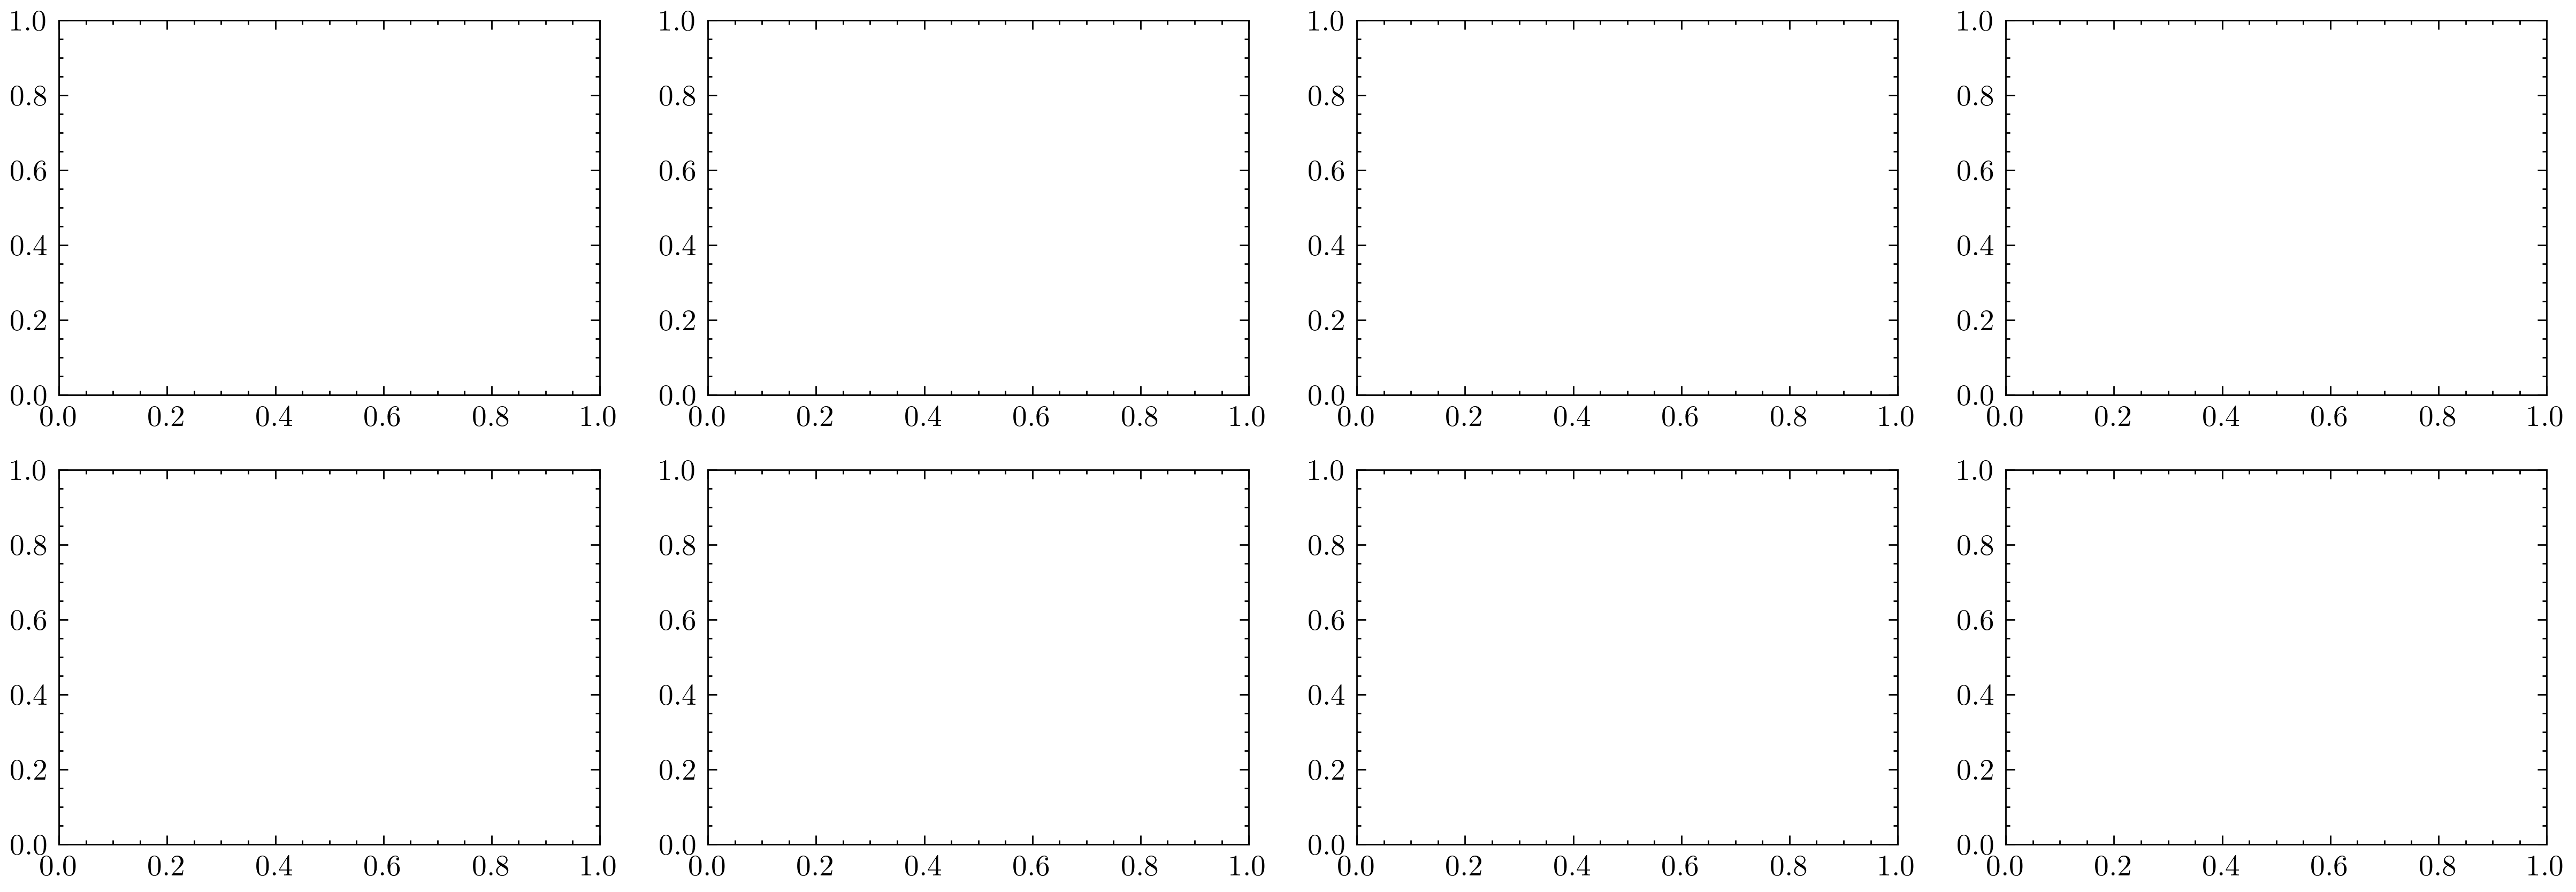

In [4]:
from sklearn.inspection import PartialDependenceDisplay

with plt.style.context('science'):
    features = ["longitude", "latitude", "total_rooms", "population",
                "total_bedrooms", "households", "housing_median_age", "median_income"]
    fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(
        2, 4, figsize=(15, 5))  # (rows, columns, index)
    rf_disp = PartialDependenceDisplay.from_estimator(
        random_forest_model, x_train, features=features, feature_names=x.columns)
    xgb_disp = PartialDependenceDisplay.from_estimator(
        xgb_model, x_train, features=features, feature_names=x.columns)
    svm_disp = PartialDependenceDisplay.from_estimator(
        svm_model, x_train, features=features, feature_names=x.columns)
    lr_disp = PartialDependenceDisplay.from_estimator(
        linear_regression_model, x_train, features=features, feature_names=x.columns)
    mlrp_disp = PartialDependenceDisplay.from_estimator(
        dnn_model, x_train, features=features, feature_names=x.columns)
    svm_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8],
                  line_kw={"label": "NN", "color": custom_colors[3]})
    xgb_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8], line_kw={
                  "label": "xgboost", "color": custom_colors[0]})
    rf_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8], line_kw={
                 "label": "random forest", "color": custom_colors[1]})
    mlrp_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8], line_kw={
                   "label": "NN", "color": custom_colors[2]})
    lr_disp.plot(ax=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8],
                 line_kw={"label": "NN", "color": custom_colors[4]})
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax5.get_legend().remove()
    ax6.get_legend().remove()
    ax7.get_legend().remove()
    ax8.get_legend().remove()
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
        ax.set_ylim(120000, 420000)
        ax.set_ylabel('')
    for ax in [ax2, ax3, ax4, ax6, ax7, ax8]:
        ax.set_yticks([])

    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(
            zip(handles, labels)) if l not in labels[:i]]
        return unique
    lines_labels = legend_without_duplicate_labels(ax1)
    lines, labels = zip(*lines_labels)
    lines = list(lines)
    labels = list(labels)
    # fig.legend(lines, labels, fontsize='small')
    plt.show()

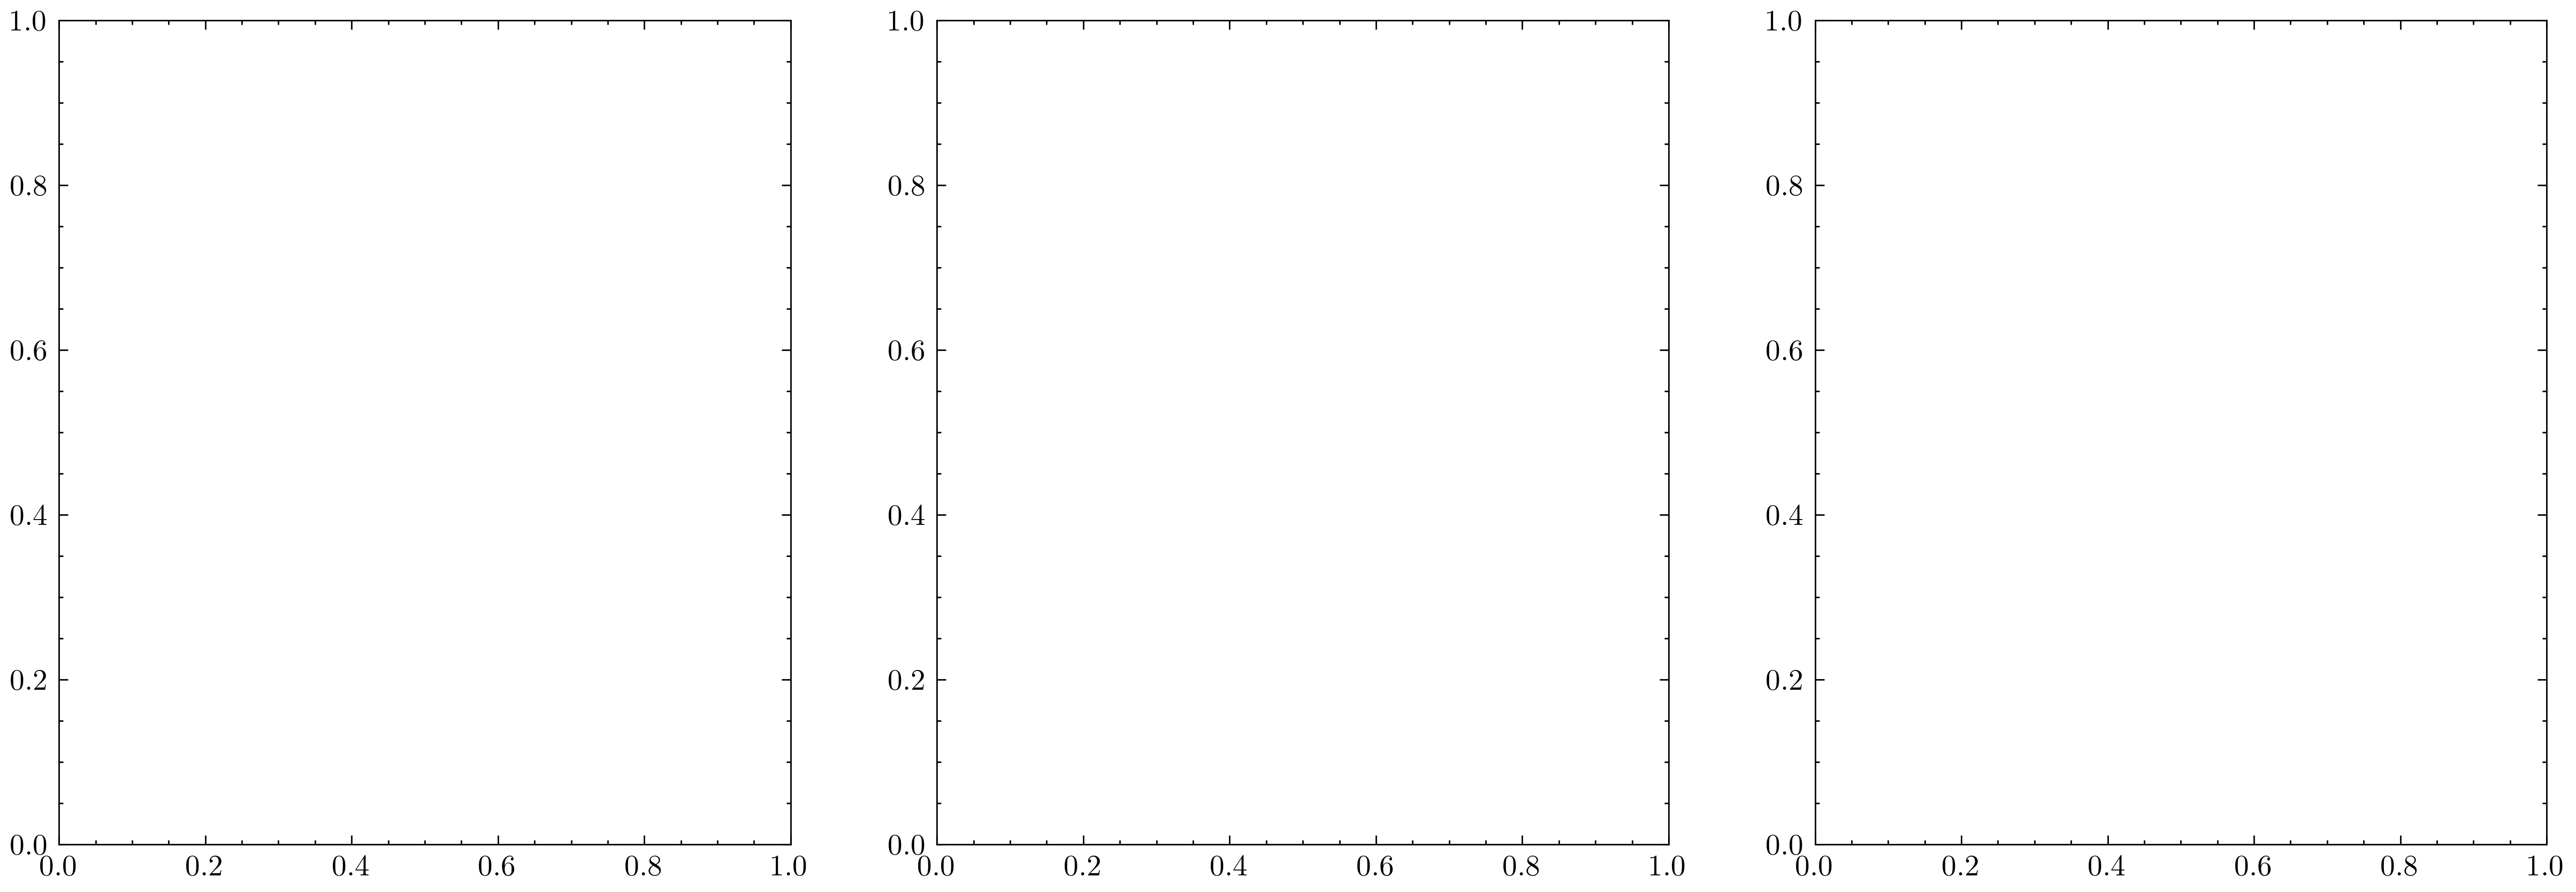

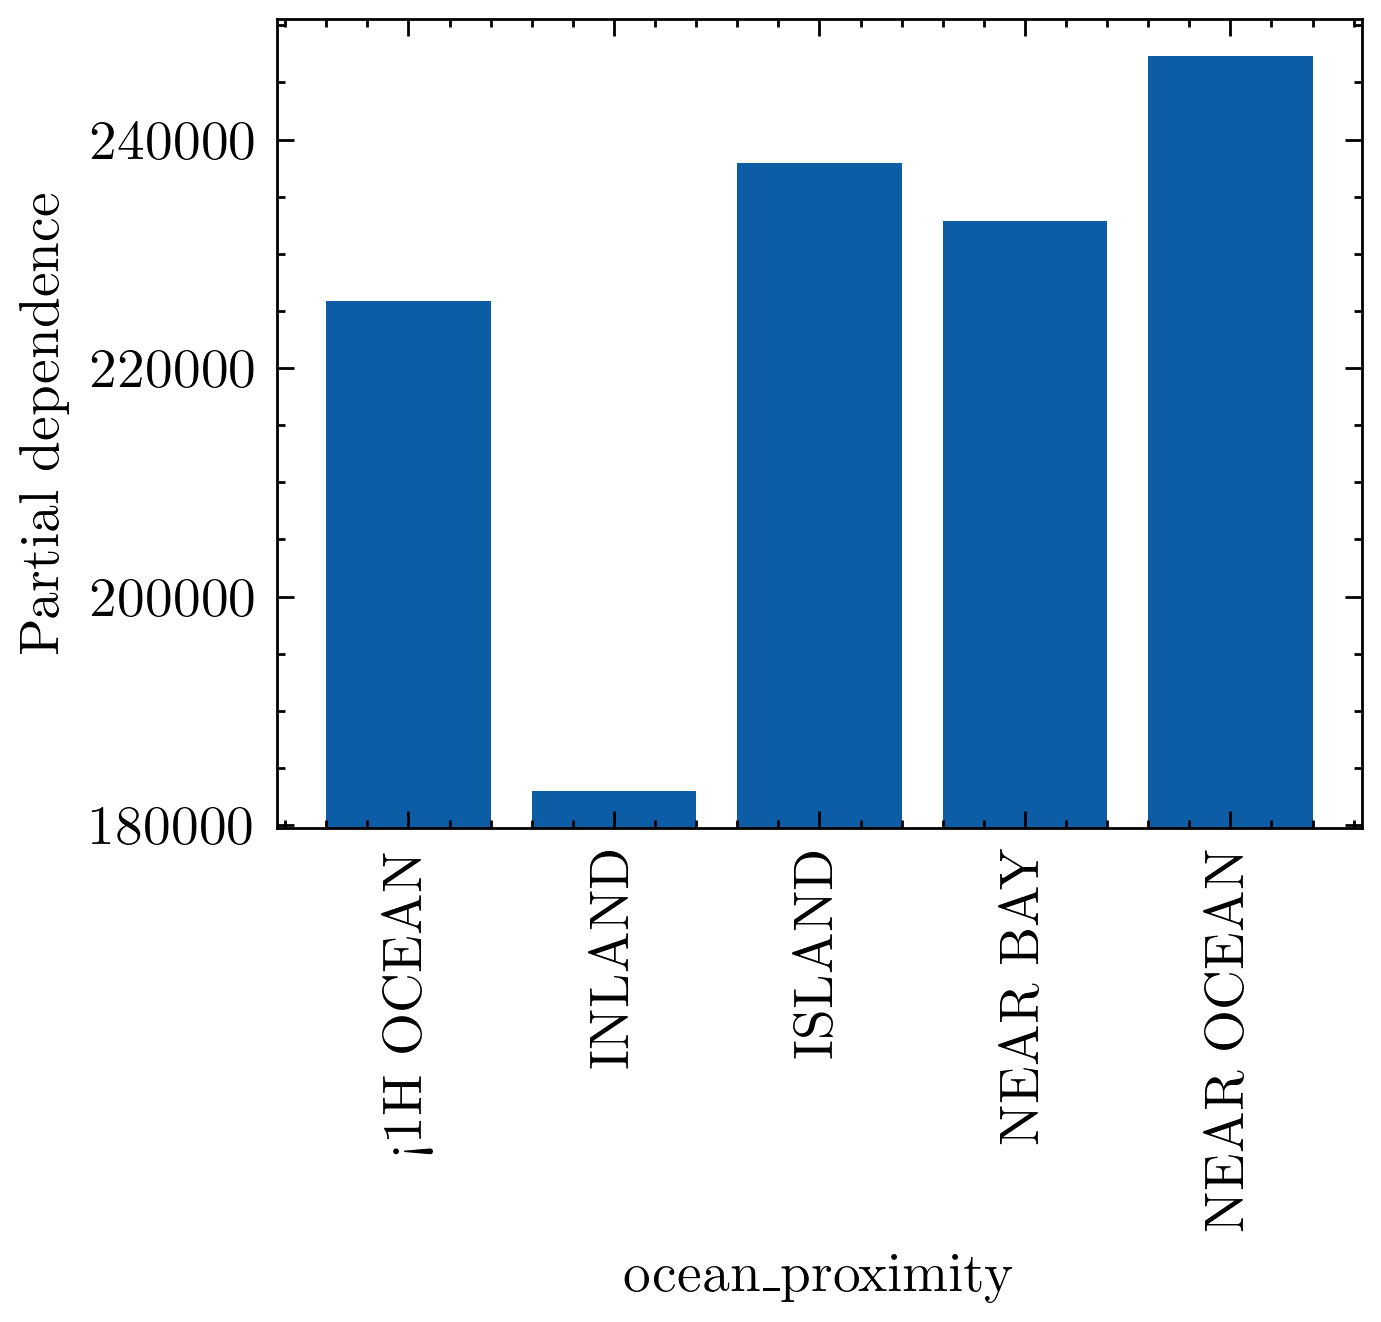

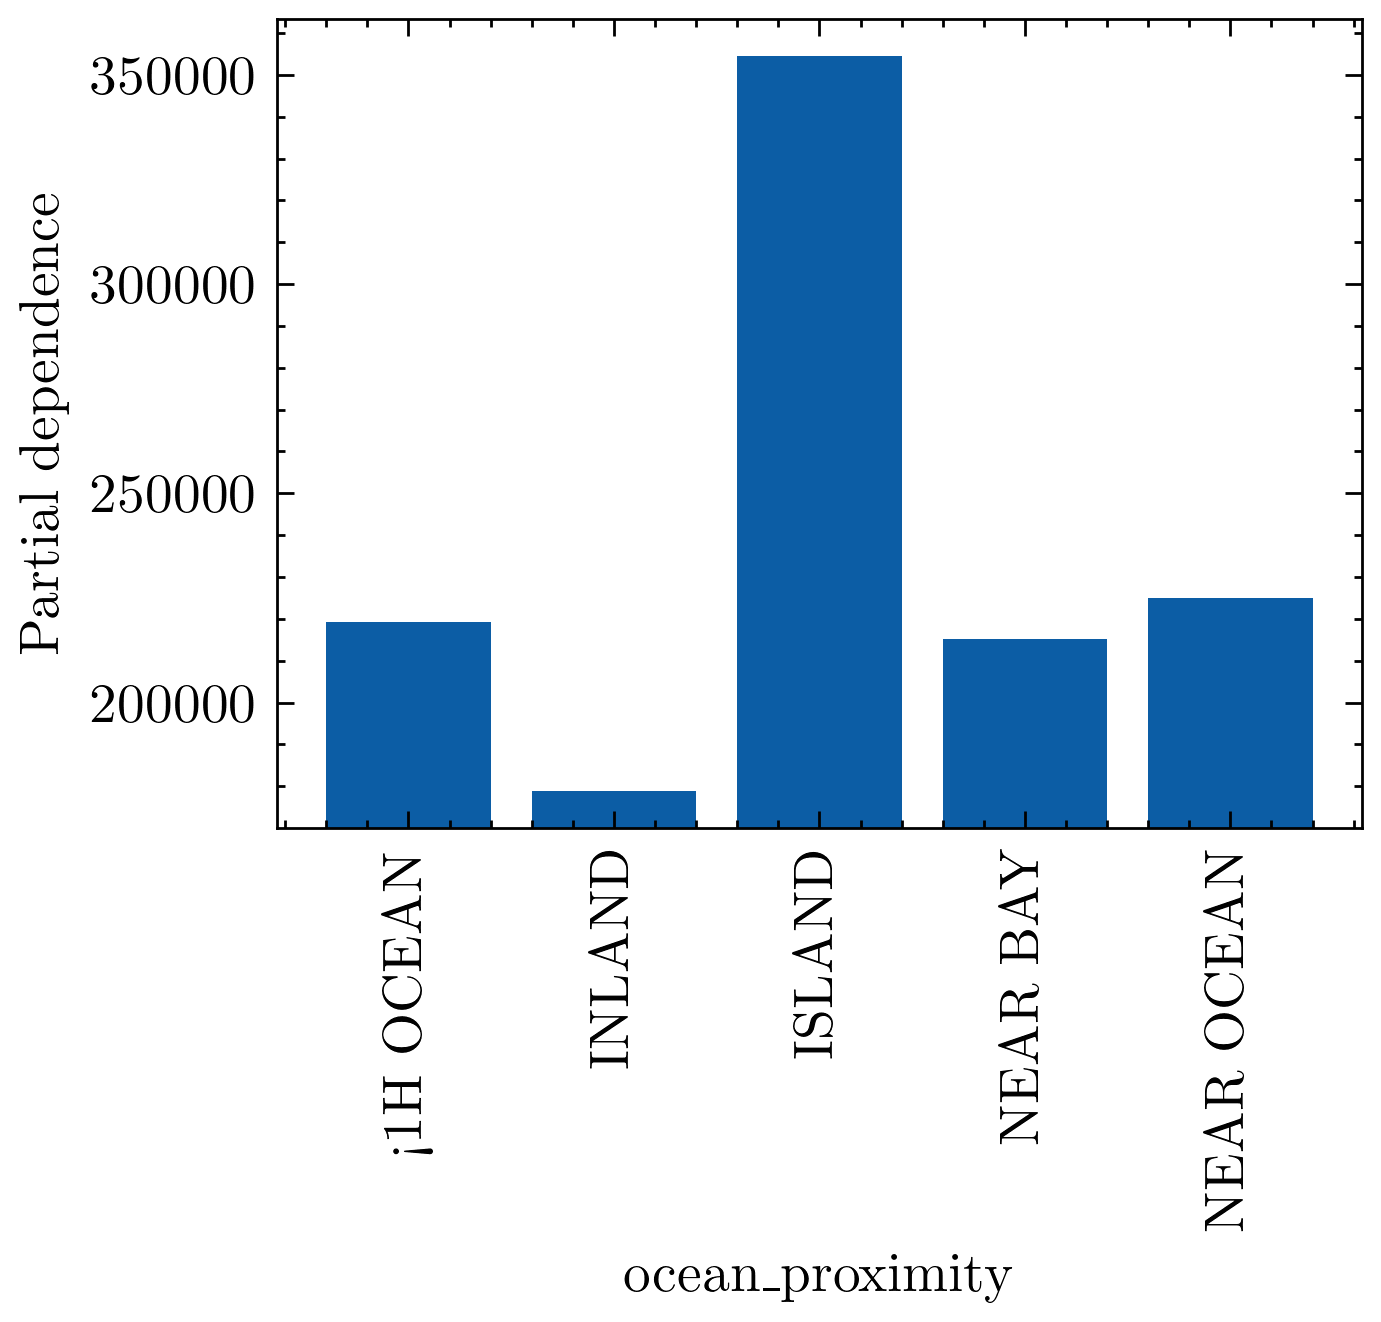

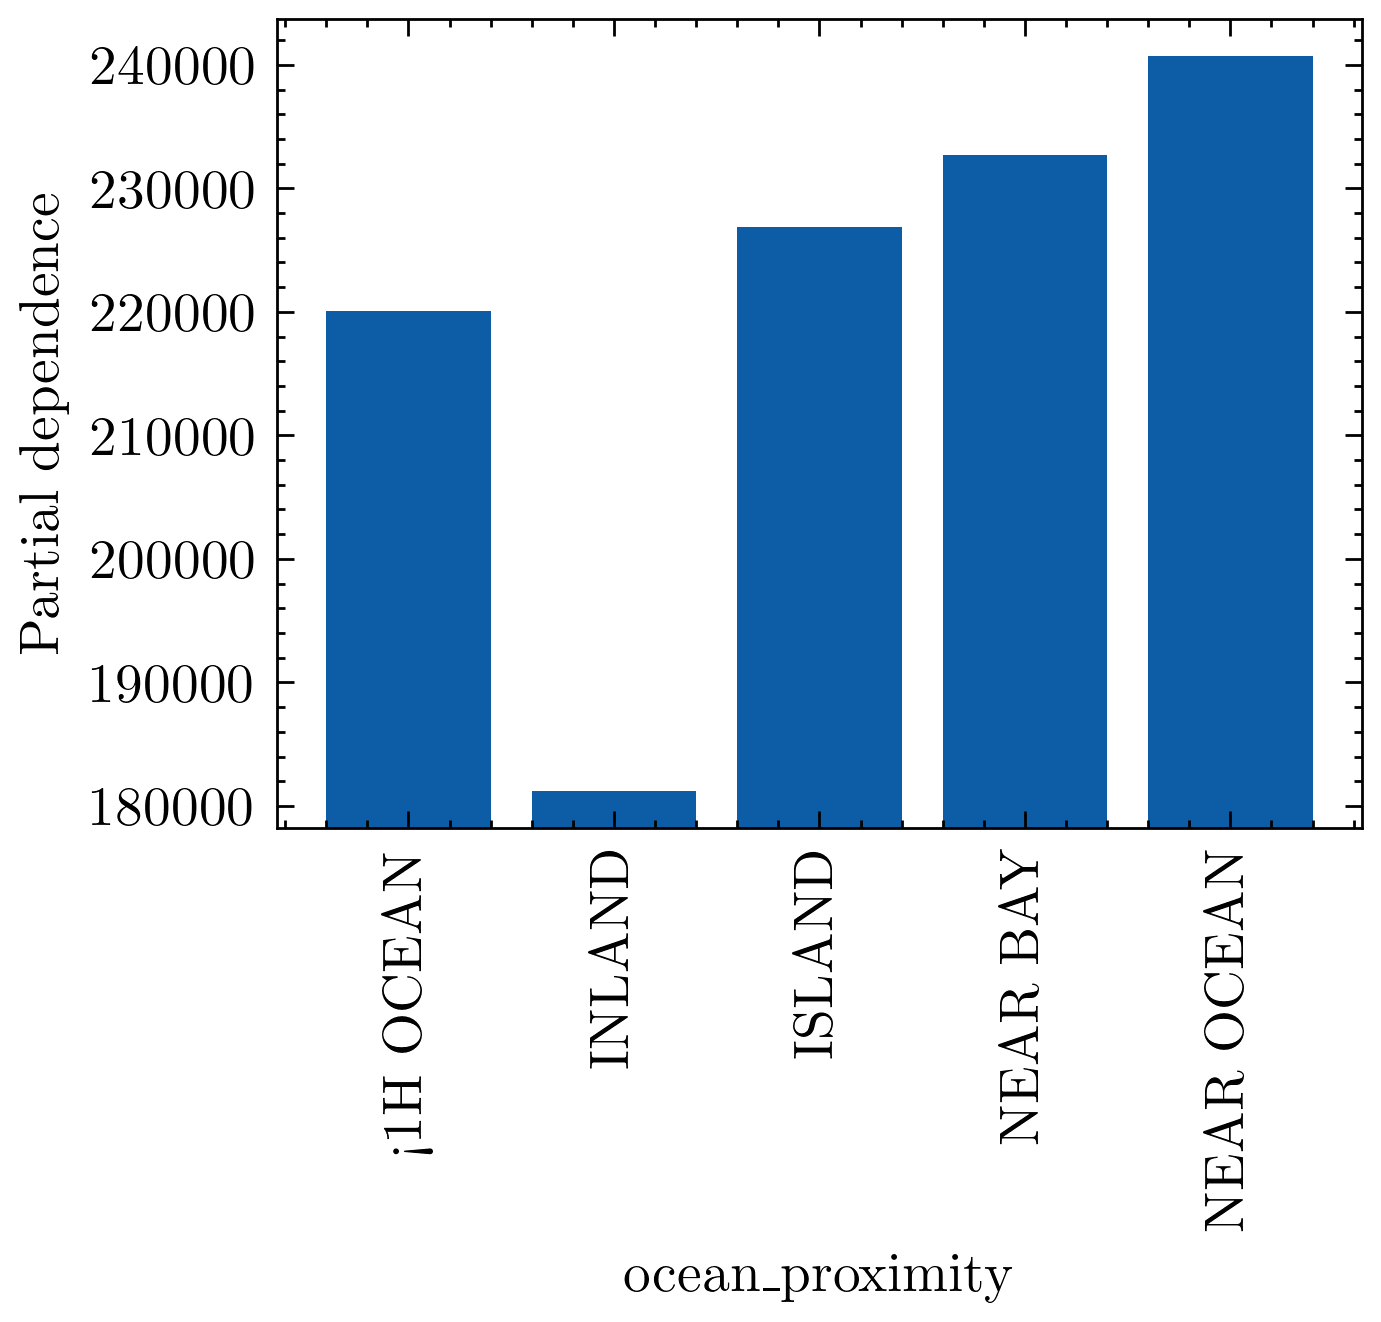

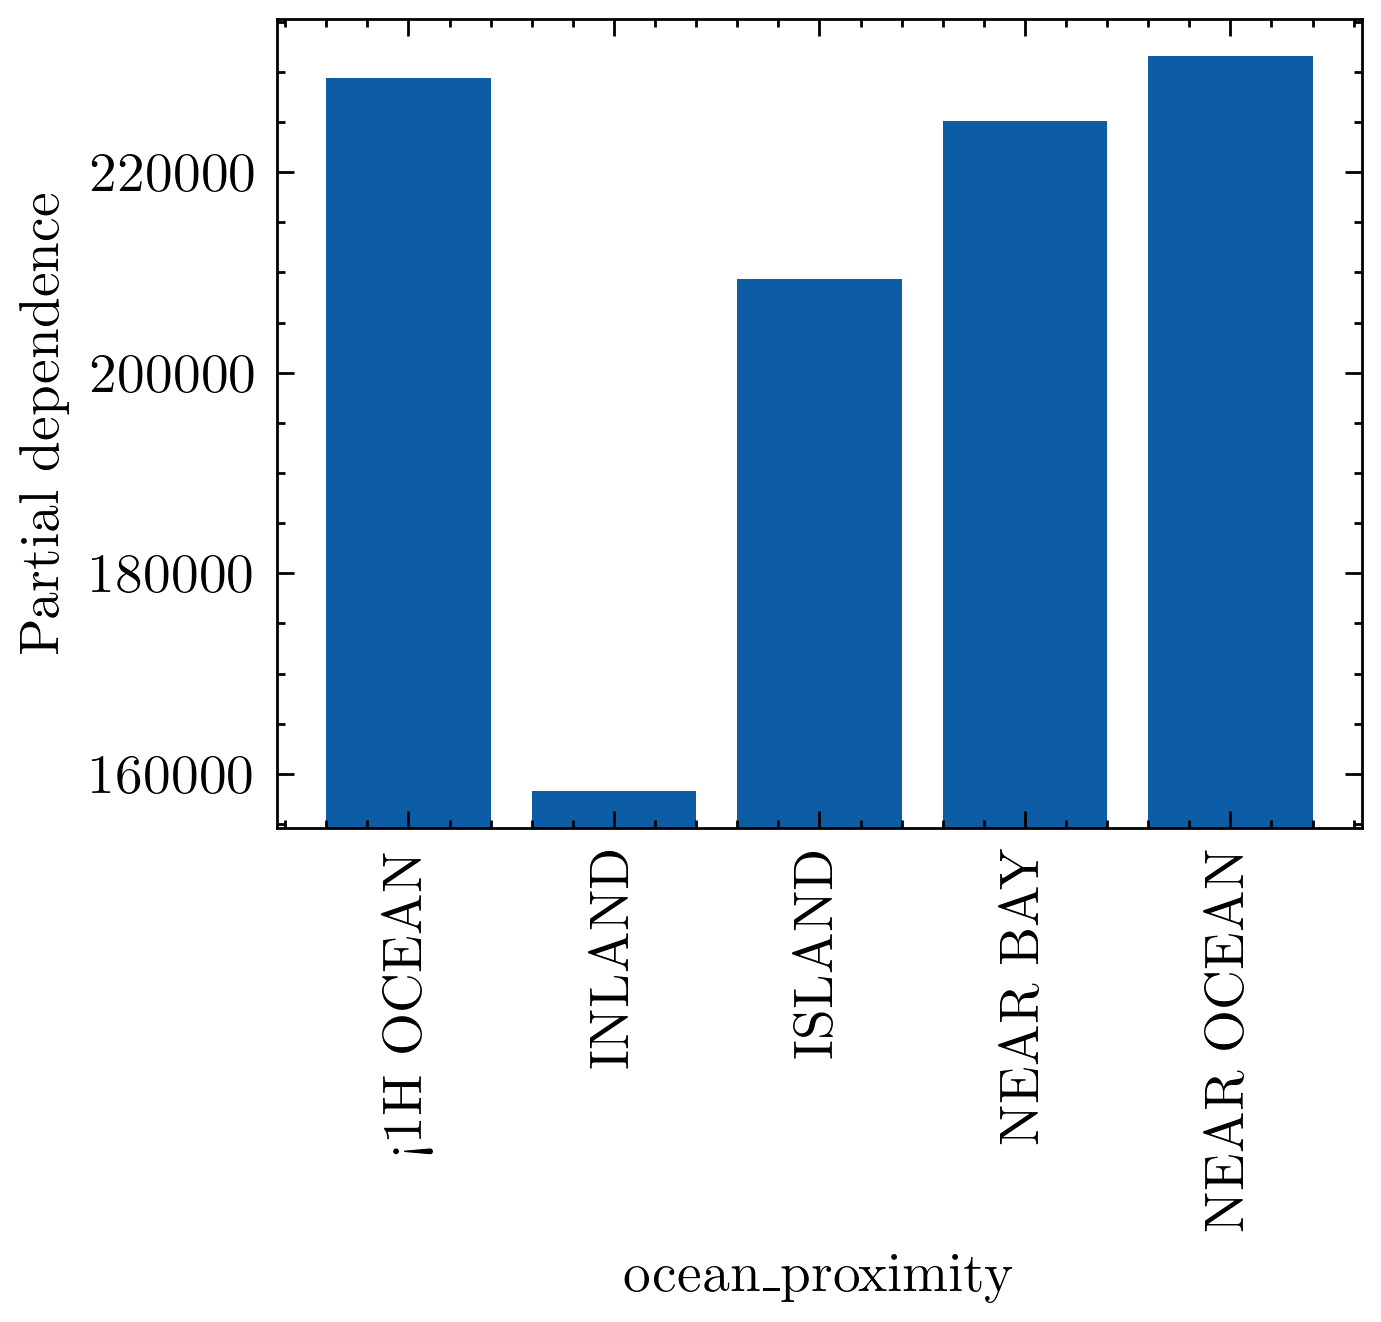

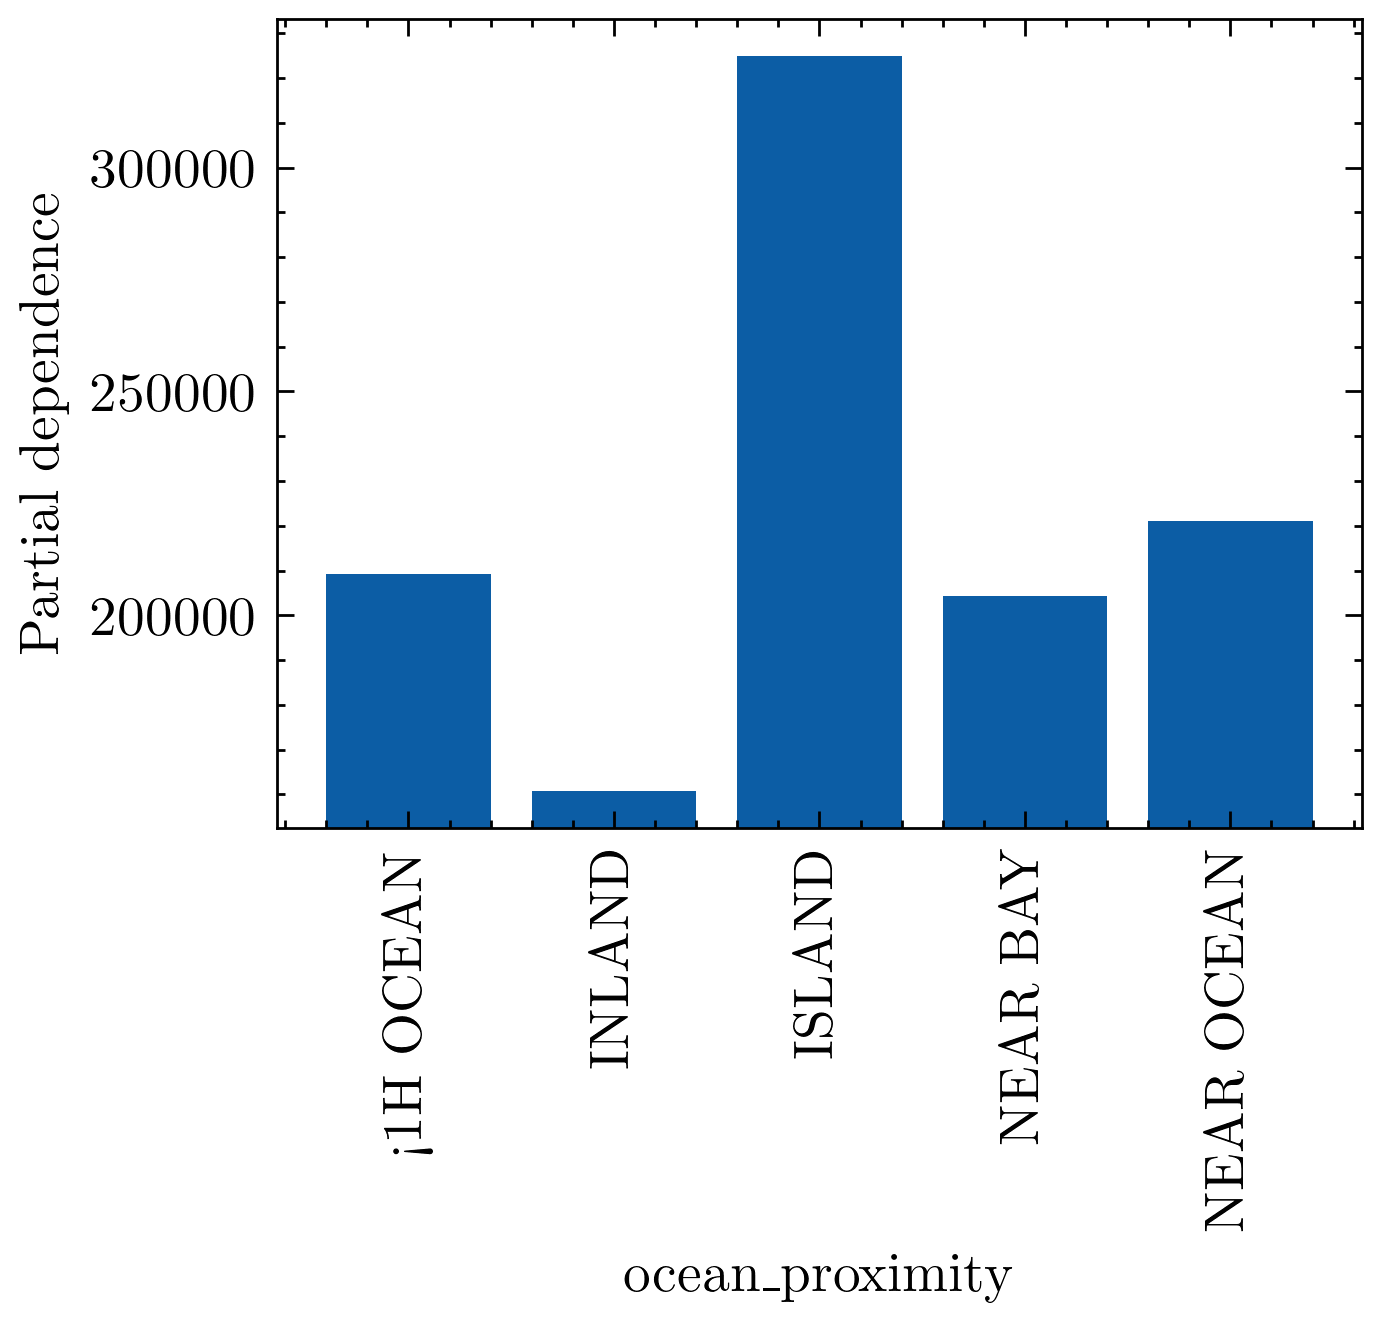

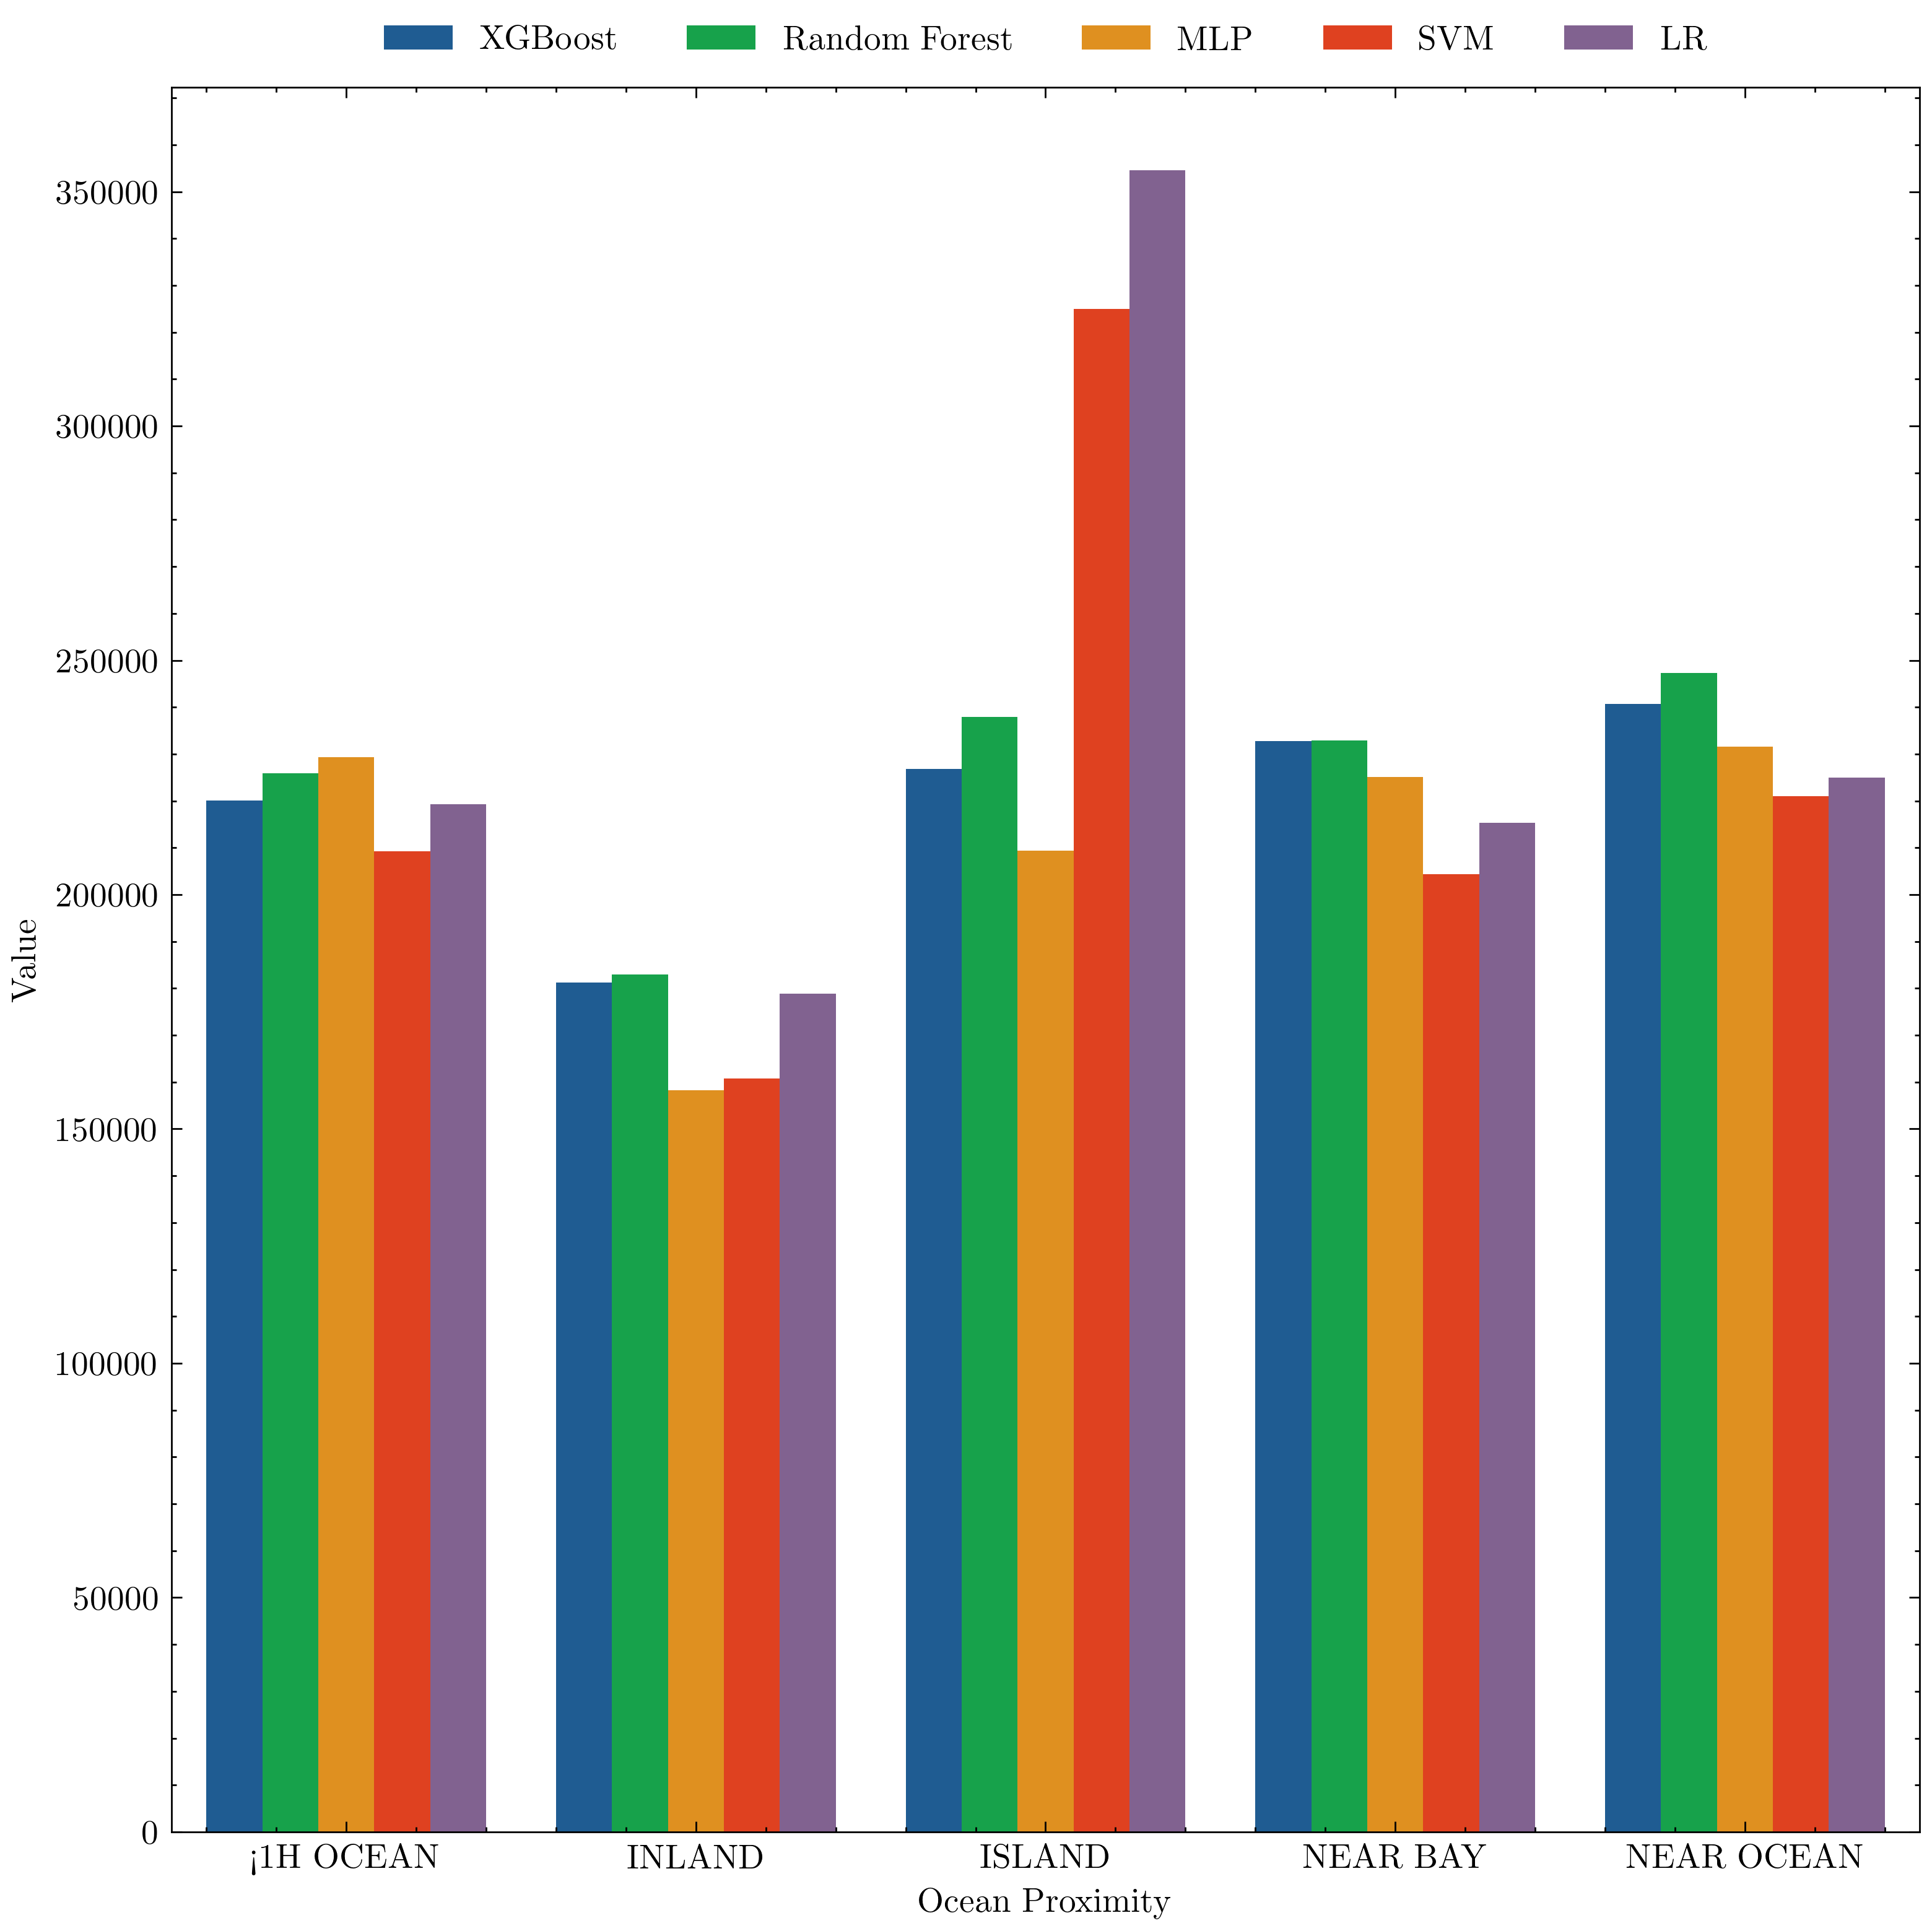

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig,axs = plt.subplots(1, 3, figsize=(15, 5))  # (rows, columns, index)
rf_disp =     PartialDependenceDisplay.from_estimator(random_forest_model, x_train, features=["ocean_proximity"],categorical_features=["ocean_proximity"]
                                                      ,feature_names=x.columns)
lr_disp =     PartialDependenceDisplay.from_estimator(linear_regression_model, x_train, features=["ocean_proximity"],categorical_features=["ocean_proximity"]
                                                      ,feature_names=x.columns)
xgb_disp =     PartialDependenceDisplay.from_estimator(xgb_model, x_train,features=["ocean_proximity"],categorical_features=["ocean_proximity"]
                                                      ,feature_names=x.columns)
mlrp_disp =     PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=["ocean_proximity"],categorical_features=["ocean_proximity"]
                                                      ,feature_names=x.columns)
svm_disp =     PartialDependenceDisplay.from_estimator(svm_model, x_train, features=["ocean_proximity"],categorical_features=["ocean_proximity"]
                                                      ,feature_names=x.columns)
displays = [xgb_disp,rf_disp,mlrp_disp,svm_disp,lr_disp]
models = ["XGBoost","Random Forest","MLP","SVM","LR"]

plt.figure(figsize=(8, 8))
df_data = {
    'Ocean Proximity':displays[0].pd_results[0]["values"][0],
}
for i, disp in enumerate(displays):
    data = disp.pd_results[0]
    df_data[models[i]] = data["average"].flatten()

df = pd.DataFrame(df_data)
df_melted = df.melt(id_vars='Ocean Proximity', var_name='Group', value_name='Value')
# Create the grouped barplot
ax = sns.barplot(data=df_melted, x='Ocean Proximity', y='Value', hue='Group')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

plt.tight_layout()
plt.show()

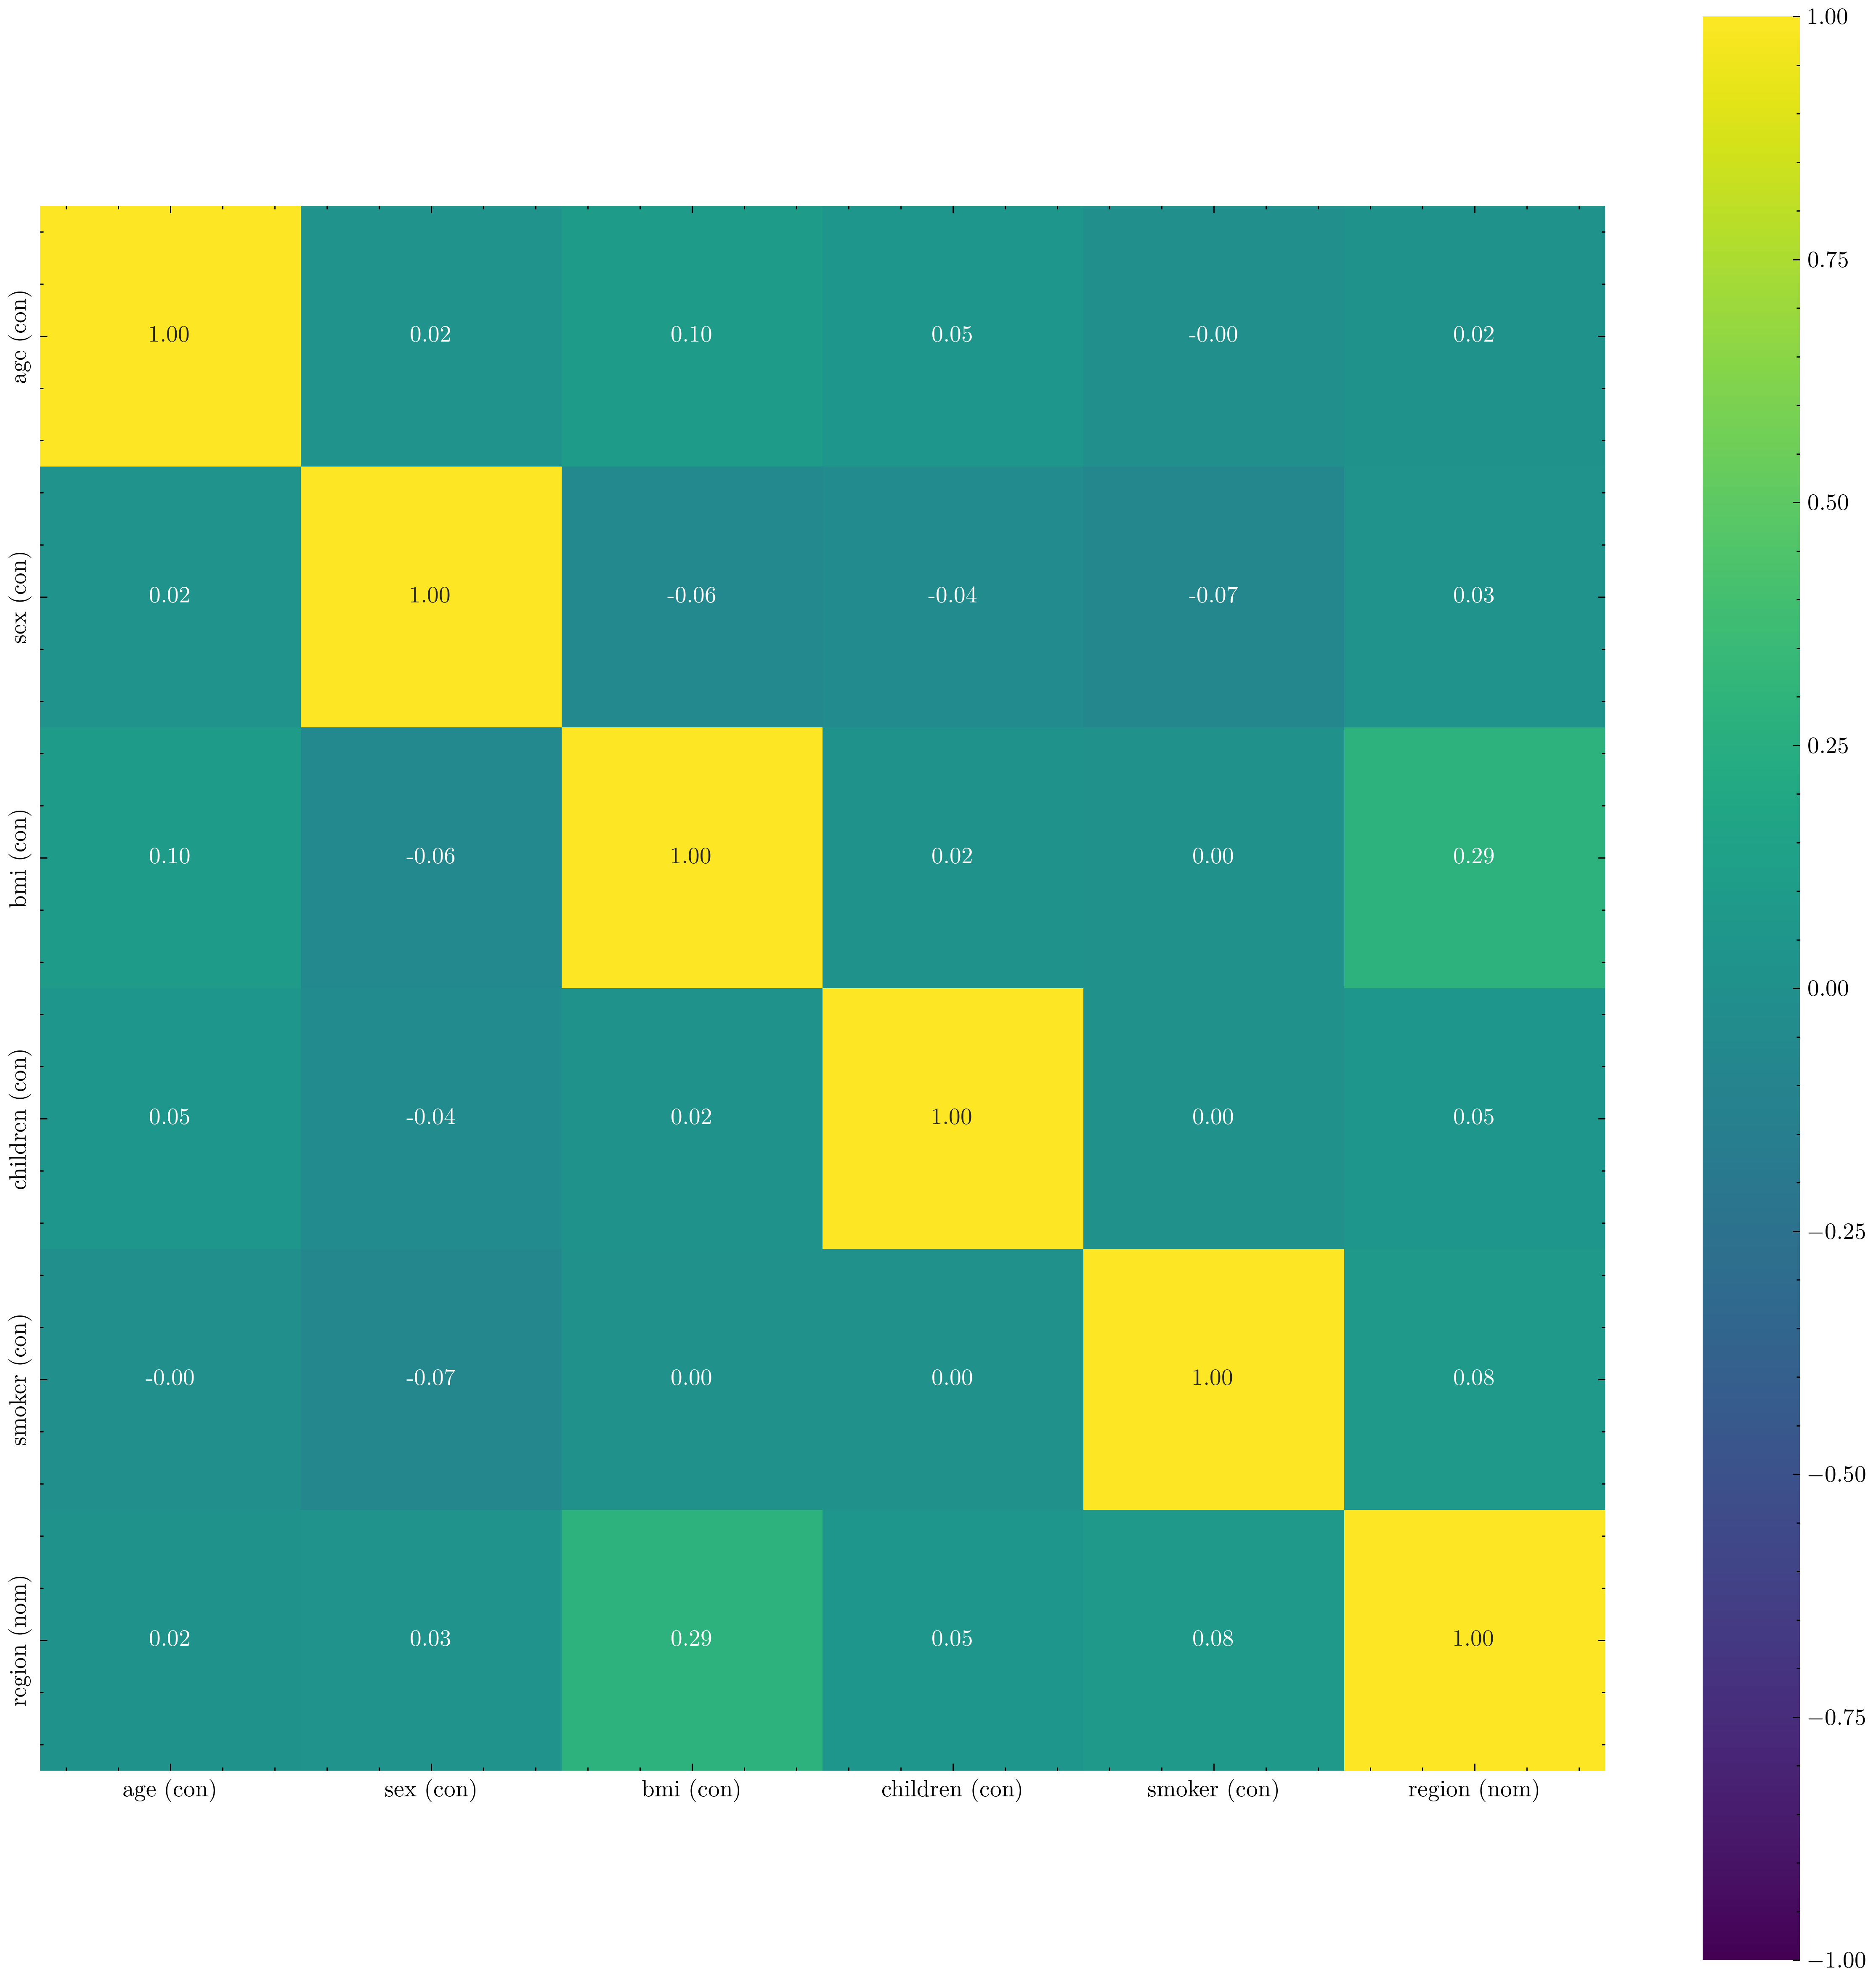

In [9]:
from dython.nominal import associations  # correlation calculation

correlation_matrix = associations(
    x_train, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True,cmap="viridis")